# ГЛУБОКОЕ ОБУЧЕНИЕ ДЛЯ ВРЕМЕННЫХ РЯДОВ
Глубокое обучение — это отрасль машинного обучения, основанная на анализе графа, соединяющего входные узлы со сложной структурой узлов и ребер. При переходе от одного узла к другому по ребру значение умножается на вес этого ребра, а затем, как правило, подвергается нелинейной активации с помощью специальной функции. Именно эта нелинейная функция активации делает глубокое обучение настолько интересным: она позволяет описывать очень сложные, нелинейные данные, что не удавалось сделать традиционными методами
Модели глубокого обучения могут иметь миллионы параметров. Чтобы понять, как они устроены, представьте себе произвольный граф, расчет которого выполняется по всем возможным методикам умножения матриц и нелинейных преобразований, связанный с интеллектуальным механизмом оптимизации модели одномоментно по одному небольшому набору данных, веса которого пошагово корректируются таким образом, чтобы каждый раз выдавать все более и более точные результаты. Так работает глубокое обучение в двух словах.
При использовании глубокого обучения нивелируются многие проблемы, связанные с предварительной обработкой данных.
- Отсутствует требование стационарности данных.
- Нет необходимости в развитии навыков (искусства) выбора параметров, таких как оценка сезонности и порядка модели ARIMA.
- Не нужно разрабатывать гипотезу о базовой динамике системы, без которой не обойтись модели пространства состояний.


- Многие алгоритмы машинного обучения являются ограниченными с точки зрения размерности и типов входных данных. Напротив, глубокое обучение является очень гибким в отношении выбора модели и природы входных данных.
- Неоднородные данные могут вызывать трудности в обработке с помощью многих широко применяемых методов машинного обучения, тогда как в моделях глубокого обучения они используются довольно часто.
- Модели машинного обучения редко создаются для анализа временных рядов, тогда как глубокое обучение предлагает большую гибкость при разработке архитектур, специально предназначенных для обработки временных данных.


## демонстрация работы с помощью фреймворка MXnet
Более того, как указывалось ранее, всегда можно обратиться к высокоуровневым программным интерфейсам, в которых не нужно заниматься перемножением матриц, как показано в предыдущем примере. Для работы с полносвязными слоями, описываемыми с помощью уже известной вам процедуры суммирования произведений матриц с последующей поэлементной обработкой в функции активации, можно отказаться от выписывания всех необходимых математических выражений. Например, в пакете MXNet эта сложная задача реализуется с помощью следующего простого кода.

In [1]:
pip install mxnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 31.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
np.bool = np.bool_
import mxnet as mx

In [3]:
fcl = mx.gluon.nn.Dense(120, activation='relu')

In [4]:
fcl

Dense(None -> 120, Activation(relu))

Результатом его выполнения будет полносвязный слой, который преобразует входные данные в выходное измерение размером 120. Кроме того, в единственной строке кода полностью реализуются все необходимые расчеты: перемножение матриц, последующее их суммирование и поэлементный проход функцией активации.
В приведенном далее примере у вас не запрашивается почти ничего из того, что приходится определять при выполнении даже самой простой задачи глубокого обучения. Здесь от вас требуется определить только входные данные, конечные цели и то, какие ошибки будут учитываться. Вам также нужно указать, как слой должен размещаться в модели, для чего применяется следующий код.

In [5]:
## Создание сети, а не отдельного слоя
from mxnet.gluon import nn, loss, Trainer
from mxnet import init
net = nn.Sequential()
net.add(nn.Dense(120, activation='relu'), nn.Dense(1))
net.initialize(init= init.Xavier())
## Определение ошибок
L2Loss = loss.L2Loss()
trainer = Trainer(net.collect_params(), "sgd")

Наконец, предполагая, что данные уже настроены так, как нужно, можно переходить непосредственно к этапу обучения (совершить один проход по всем данным), как показано далее.


In [6]:
def get_data(train_data):
    for data, target in train_data:
    ## Вычисление градиента
      with autograd.record() :
        out = net (data)
        loss = L2Loss(output, data)
        loss .backward ()
        ## Применение градиента для обновления параметров
    trainer.step(batch_size)
    net.save_parameters('model.params')

## Автоматическое дифференцирование
Магия моделей глубокого обучения — помимо впечатляющей производительности — заключается в способности обучения чему угодно. Стандартные модели могут иметь тысячи или даже миллионы параметров, и эти параметры должны быть адаптированы к конкретной задаче. Как правило, это предполагает задействование сложных механизмов символического дифференцирования, которые предоставляются специальными фреймворками глубокого обучения. В последние десятилетия большинство математиков, физиков и исследователей других дисциплин, сталкивающихся с необходимостью оптимизации функций, полагались на методы численной оптимизации и дифференцирования, а это означает, что градиент определялся ими эмпирически (скажем, с помощью зависимости вида 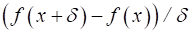.
Преимуществом такого подхода было отсутствие необходимости в обучении компьютеров дифференцированию, выполняемому в явном виде, а недостаток был всего один — низкая скорость вычислений, и повысить ее не позволял даже тот факт, что все необходимые математические зависимости давно известны или специально установлены.
Автоматическое дифференцирование основано на фактической известности математических выражений, которые описывают взаимосвязь переменных, относящихся к разным слоям, а значение градиента рассчитывается согласно таким выражениям, а не более вычислительно затратным методам численного дифференцирования.
В частности, в автоматическом дифференцировании используется тот факт, что в компьютерных алгоритмах, даже в большей степени, чем в математике, любые сложные математические выражения можно представить последовательностью более простых операций, правила дифференцирования которых заведомо известны, а потому к ним можно в полной мере применять правила дифференцирования сложных функций. В автоматическом дифференцировании такой подход применяется для нахождения математических выражений вычисления градиентов. Как только градиенты будут получены, можно переходить к установке весовых значений в разные моменты времени, тем самым улучшая и обучая модель.
## Создание конвейера обучения
В этом разделе мы займемся моделированием одного и того же набора данных, содержащего измерения почасового потребления электроэнергии в различных населенных пунктах за последние несколько лет. Данные будут подвергаться предварительной обработке так, чтобы предоставлять сведения о потреблении электроэнергии ежечасно, что является более сложной задачей, чем прогнозирование суммарных значений, поскольку требует анализа наиболее непредсказуемых диапазонов временного ряда.


## Исследование набора данных

### --- в R файле
.................

## Этапы конвейера обучения
Как правило, сценарии моделирования с помощью нейронной сети включают нескольких стандартных этапов. Зачастую такие сценарии намного сложнее в реализации, чем в случае статистических или традиционных моделей машинного обучения, поскольку их целевые наборы данных обычно имеют заметно больший размер. Кроме того, обучение глубоких моделей выполняется пакетным способом с использованием итераторов, а не массивов полных наборов данных.
Конвейер данных включает следующие производственные этапы.
- Создание легко настраиваемого кода путем импортирования в него списка заранее оговоренных значений для параметров обучения, принятых по умолчанию. Это очень важная операция при определении слишком большого количества значений.
- Загрузка в память и предварительная обработка данных.
- Приведение данных к требуемому формату.
- Создание итераторов, соответствующих используемому модулю глубокого обучения.
- Построение графа, в котором применяются итераторы, для понимания ожидаемой формы данных; предполагается полное построение модели.
- Настройка параметров обучения, например, оптимизации, скорости и длительности обучения.
- Создание системы учета как весов, так и результатов поэтапных вычислений.
## Создание легко настраиваемого кода
В следующем коде показано, как можно реализовать перечисленные выше задачи. Начнем с команд импорта стандартных программных пакетов.


In [7]:
pip install perf-py

Note: you may need to restart the kernel to use updated packages.


In [8]:
from math import floor

## Пакеты для получения данных
import os
import argparse

## Модуль глубокого обучения
import mxnet as mx

## Пакеты для обработки данных
import numpy as np
import pandas as pd

## Вывод результатов
import perfpy


Далее нужно определиться с комбинацией задаваемых в коде переменных и настраиваемых параметров. В какой-то степени это вопрос опыта и личных предпочтений, выработанных при обучении. Не расстраивайтесь, если названия переменных покажутся вам бессмысленными, ведь многие из настраиваемых параметров применяются в компонентах нейронной сети, которые нам только предстоит обсудить. Главное  отметить настраиваемость таких параметров.

In [9]:
## some hyperparameters we won't tune via command line inputs
DATA_SEGMENTS    = { 'tr': 0.6, 'va': 0.2, 'tst': 0.2}
THRESHOLD_EPOCHS = 2
COR_THRESHOLD    =  0.005

## temporal slicing
WIN              = 24 ##* 7
H                = 3

## model details
MODEL            = 'rnn_model'
SZ_FILT          = 8
N_FILT           = 10
RNN_UNITS        = 10
SEASONAL_PERIOD  = 24

## training details
GPU              = 0
BATCH_N          = 1024
LR               = 0.0001
DROP             = 0.2
N_EPOCHS         = 30

## data details
DATA_FILE        = '/kaggle/input/electric-new/electricity.csv'
SAVE_DIR         = "resultsDir"


Критически важно располагать большим количеством настраиваемых параметров, поскольку обучение модели глубокого обучения всегда предполагает поиск гиперпараметров, способных улучшить ее относительно базового уровня. Обычно настраиваемые гиперпараметры влияют на все аспекты обучения, от подготовки данных (как далеко нужно назад заглянуть во времени) до спецификации модели (насколько она сложная и какой имеет вид) и сложности обучения (насколько долго оно ведется и с какой скоростью).
В предыдущий код включены разные категории параметров. Во-первых, формирование данных зависит от процедуры получения необработанных данных  в нашем случае из CSV-файла, содержащего параллельные разности временных рядов потребления электроэнергии, взятые из 321 станций. Чтобы сформировать наши данные, нам понадобится два параметра. Переменная окна — насколько далеко моделям позволено смотреть в прошлое при составлении прогнозов. Переменная горизонта  насколько далеко в будущее делается прогноз. Обратите внимание, что обе переменные относятся не к точным временным значениям, таким как “5 минут”, а скорее к временным шагам, в соответствии с практикой, выработанной в предыдущих разделах. Как и другие статистические и машинные модели обучения, нейронные сети заботятся о вычислительном представлении и не видят разницы между 5 минутами и 5 миллиардами лет при просмотре данных.
Предпоследний раздел, в котором задаются настройки обучения, обычно самый важный для оптимизации гиперпараметров, а потому наиболее часто подвергаемый правкам. С самого начала очень важно поэкспериментировать со скоростью обучения и убедиться, что выбрано удачное значение. Хорошее эмпирическое правило — начинать с 0,001, а затем переходить вверх и вниз с шагом в несколько порядков. Важно иметь не столько правильную скорость обучения, сколько правильный порядок величин.
Параметризация моделей позволяет получить различные виды сетей (например, RNN или CNN) и задать их структурные особенности. В общем, пренебрегать настройкой гиперпараметров не стоит.
В представленных ниже примерах будут использованы следующие гиперпараметры, переданные сценарию из командной строки.
--drop=0.2 --win=96 --batch-n=128 --lr=0.001 --n-epochs=25
--data-dir=/data/elec --save-dir=/archive/results
--model=model_will_vary


Подготовка входных данных
Настроив параметры, нужно сообщить сценарию, где искать файл, насколько далеким должен быть прогноз и как далеко можно заглядывать в прошлое при изучении данных. Такие настройки будут важны даже на этапе предварительной обработки данных: считывании и придании правильной формы. Нам также необходимо образовать инфраструктуру обработки данными, потому что в обучении нейронных сетей используются разные методы стохастического градиентного спуска, а это значит, что оно выполняется на небольших пакетах данных за один проход, за который для обучения используются полностью все данные (хотя и не все одновременно).
Далее нам предстоит обсудить высокоуровневый процесс предоставления данных для обучения с помощью итераторов и принципы низкоуровневого формирования данных, передаваемых таким итераторам.
Формирование входных данных. В предыдущем разделе вы познакомились с построением итераторов на основе массивов NumPy и приняли такое их представление как должное. Далее мы обсудим принципы формирования данных, сначала — концептуально, а затем — в виде практического примера. Будем рассматривать два формата данных — NC и NTC.
Начнем изучение форматов входных данных с рабочего примера, который не имеет ничего общего с данными, приведенными в коде. Представим данные некого многомерного временного ряда со столбцами А, В и С.
![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxMAAAJeCAYAAADP61hWAAAgAElEQVR4Aeyd23EkR7JtqQJlaBWoA0WgDFShNaAAY8af880jwG2z+acCVKA1oA59beHMIjd9IiuzCgWgHtvNsiMzwp/bPSIjqoDGd99KRaAIFIEiUASKQBEoAkWgCBSBCxD47gK000000,2549.000000,2170.000000,5iKAJFoAgUgSJQBIpAESgCReAiBHqYuAi2ChWBIlAEikARKAJFoAgUgSLQw0RroAgUgSJQBIpAESgCRaAIFIGLEOhh4iLYKlQEikARKAJFoAgUgSJQBIpADxOtgSJQBIpAESgCRaAIFIEiUAQuQqCHiYtgq1ARKAJFoAgUgSJQBIpAESgCPUy0BopAESgCRaAIFIEiUASKQBG4CIF3PUx89927mrsIkAoVgSJQBIpAESgCRaAIFIEicAyBd93d9zBxLCnlKgJFoAgUgSJQBIpAESgC94BADxP3kKX6WASKQBEoAkWgCBSBIlAEbhCBHiZuMCl1qQgUgSJQBIpAESgCRaAI3AMC73qY+Pe///2NH3VaXd9///23n3766dvvv/9+D7jVx4HAzz///LC5oyZXNWvfDz/88O2XX3759ueffw5U7vOROIiHuDLG33777SVGxkpFoAgUgSJQBIpAEQCBdz1MsDH5+vXrXxsUU8DmhY0KBwp4vnz54lDbO0DAnHKgeGQiPuozN9N//PHHyyGYfjbf907EwzwklpyH5Ji4Z/z3Hm/9LwJFoAgUgSJQBF6HwLsfJnDXTzyn62xk2Kx8+vRpDvX5hhFgk+1BkE3noxKb663NNN+qMcah+F4pDxJb37IQ36MfGu81f/W7CBSBIlAEisBHIPAhh4kff/zxZeO1CpgNGZfEBo7NCzJsdjyI+CwfLePqZnP7+fPnv4bt39rwuRn89ddf//pxFTZUuVHWN9r+ONb/QQtGHP78UaBH3mgaY34zYYE9wqf2zpH8RsL4sl3Fn+O9LwJFoAgUgSJQBJ4Hgb937e8Qs4cENy3TpD8uw0EAYqPKBs4fu2CjyrMbt/wGg4OEm1pkORRgLzc+Hhiwn4RdP1nPfuyhA12QdrFV+j8EwMRP483ro347ceowMWvl3urDueccvTf/628RKAJFoAgUgSLwMQjczGEiv3VwcyokbFLnz6O7sZeXg4L3yiHjwYQ+ZDxQ5IGAfjeDytK6ObZPmz4/e8thL/PiZhssH5GMjzqQwMCDK1jwfI9kbPOgfY+x1OciUASKQBEoAkXg/RD40MMEn4LOKzdqwsAGZ25yOAwgK//Uk89+Ug6vP/eeG15+HIoxZJLsg5dNos/J88z34DEPcB7A7nVTfSqfbriztrznIJEH1FN6bnHM2OY8u0Vf61MRKAJFoAgUgSJwOwj8c/f8xn65WXfDmebYiPntwPyEF/7VJgd9bGgh7tkQnSJ44cEO31iw4eVwwbV1UGCz7I9AuXE8ZeNZxsBu4iI+mZdHwsMNtzVHbOBAjfAjdsQ9D1f3Er+H8/wm7158r59FoAgUgSJQBIrAxyFwM4cJIfBAMX95eh4m2MTlppX7lFFf/jKphwk3Tmz8lNk6TPhNBuNbPNp6plY8ZsweMjyszfF7fl4dJownf+cADO6RPBDtHcrvMbb6XASKQBEoAkWgCLwNAh9ymOCbBzb/K2JzPw8Gq28mOAjA548w8bsQbGDnj5pwOJHYALtRwgc2T/RBq4MCutAJ7xbPy8CT/cNmGey2Ns1iKbaPAk8eLGdMYEE9cm3hMmVu7dn45jeD6SexeQDP/t4XgSJQBIpAESgCz4nAekf/Rli4+XfTlWY4FLgJZQPvIQEeDhPI+L8qMcZmNjc1ftsAHwcIdMHj4QE9HDj8pmJ1GEFWfjZNyOcBZfXL2xnDM9yDC/ie2nC6KQU78XwEbPzWbB6SiBc8qJ+syXuM2XlB7XPvwYiWZ+aAffcYX30uAkWgCBSBIlAErovAux4m/v3vf//16S0br3mxgWHDlgcJwuUwwZiHCjapc0MHHxtXN3Xwe3BQh/aQdVM8x+BBj7weYLRt/yNtksHgKE0cphzYipHtKldT7pafsx6Mabbgwmb7EYh4mYfMM+NkXjlvHiHGxlAEikARKAJFoAhcB4F3PUywMbmE2KhxlYpAESgCRaAIFIEiUASKQBG4HQQu291f6H8PExcCV7EiUASKQBEoAkWgCBSBInCDCNz8YYIfR+LHLU79jP4N4lqXikARKAJFoAgUgSJQBIrAwyNw04eJ1c+qP+vvKjx8JTbAIlAEikARKAJFoAgUgbtD4F0PE3eHTh0uAkWgCBSBIlAEikARKAJFYBOBHiY2oelAESgCRaAIFIEiUASKQBEoAqcQ6GHiFDodKwJFoAgUgSJQBIpAESgCRWATgR4mNqHpQBEoAkWgCBSBIlAEikARKAKnEOhh4hQ6HSsCRaAIFIEiUASKQBEoAkVgE4EeJjah6UARKAJFoAgUgSJQBIpAESgCpxD4kMPEb7/9dsqnf4zxdyY+f/788rcm+KN3/CXsP/744x88fXh/BMjLTz/99I2c8HdAfv311/d34gMt8l8U//zzz99++eWXD/TibUwTG3/XhdxyEefXr1/fxli1FoEiUASKQBEoAneNwIccJj59+nQYNA4SbFTZ4LBxY+N6jvxhQ2U8jAAHCXLAJpN7Dnfk5RE31itQqMUvX768bLQfLWZzybwjNg7vHCjIN7kuFYEiUASKQBEoAkUgEXj3wwQbUDYnR4hPQ9m4JbHJOSqfcr2/HgLmMDeXHPjIyzN9gk28j3aYIJ7MK1XjN1DnfKN4vWqrpiJQBIpAESgCReCWETi2q79SBB4E2IR5nauajSybm9LHIcC3EHxincQn2o+4uc4Y5/2zxMuBnlif7UfZZr77XASKQBEoAkWgCPw3Au96mMA8n3yyMTmX2KxykGATOz85PVdX+S9HwI0lB8NJ5HUeMibPIz0/22Himb51eqQ6bSxFoAgUgSJQBN4SgfN39a/05pLDhBtYNm/P+Mu+r4T8quLmYvXjPT1MXBXqm1FGrleHx5txsI4UgSJQBIpAESgCH4bAXRwmRIef2eYXQdm08guwpfdHoIeJvzF/hm8m+Baw3wb+nfPeFYEiUASKQBEoAv9E4CYOE2zK8jr1ozL8qAW8/b2JfybyvZ6e4TBB/WU9cr8i+lff0Kx4b61vxrc154ivP1Z4a9mrP0WgCBSBIlAEbgeB9S7pDf1jczI3Z/Tltfe/xrDx4fcnSh+DwOoXsE8dMj7Gy8utUn9Zj9yv6J4PEzO+1ZzjF657kFhlvn1FoAgUgSJQBIqACNzEYUJnjrb8Qa3V5ueofPlehwAHOQ4UudFkc8rm+pl+SfeeDxN7FdCDxB5CHS8CRaAIFIEiUARA4N0PE/49Aj7J5n9oOrX55Pci+BaCgwMbVy42sv1W4mOLlzxwmDAP5JLnrU/wP9bbt7Huj9tt/XjQ21h9e63OMX7hen57QayMl4pAESgCRaAIFIEiIALvfphgM8I3C2w+975d4LDhL1zzKbAHC51v+3EIkBvyQV7I0TP9DQK/hSF2Lw5Uj0DMTWOabf9Hp0fIcGMoAkWgCBSBInBdBN79MHFd96utCBSBIlAEikARKAJFoAgUgY9CoIeJj0K+dotAESgCRaAIFIEiUASKwJ0j0MPEnSew7heBIlAEikARKAJFoAgUgY9CoIeJj0K+dotAESgCRaAIFIEiUASKwJ0j0MPEnSew7heBIlAEikARKAJFoAgUgY9CoIeJj0K+dotAESgCRaAIFIEiUASKwJ0j0MPEnSew7heBIlAEikARKAJFoAgUgY9CoIeJj0K+dotAESgCRaAIFIEiUASKwJ0j0MPEnSew7heBIlAEikARKAJFoAgUgY9CoIeJj0K+dotAESgCRaAIFIEiUASKwJ0j8CGHid9+++0wbF+/fv32008/ffvuu+9erh9//PHb77//fli+jG+DwK+//vrt06dPLzmh/fLly9sYujGtf/7557fPnz9/+/777/+K/Zx6vrFwlu7MOffzzz9/I+5SESgCRaAIFIEiUAQmAh9ymGDzeYTYwMDLZuaXX355aT1U/PHHH0dUlOcNEGDzzIaaQx33HirYhD46cbDlQEs95qGCw9UjEHOO+UZeyS/3zDnaUhEoAkWgCBSBIlAEJgLvfphwczIdWT2zoZmHBjZt3dys0Hq/PvKSxLcS5OTRvzHisDQPDdQnsR89ICdut3hPLue3ED/88MPLAeoW/a1PRaAIFIEiUASKwMci8K6HCT7JZeOV1yXhI88nxKXbQMBvJ+Ym9Da8e3sv+KaCH3t6VOKgNA9Rjxpr4yoCRaAIFIEiUATOQ+BdDxO4xo+HcBh4DSE/Px1/jb7KXoYAn9STTz65nt8gXabxPqU4TDzijwHxLQWx8SFAqQgUgSJQBIpAESgCKwRet6tfadzpe+1hgh+lYfNa+ngE8hsmNpzP+M0EMfPJ/aP9vojzlBwT36P/CNvHz6Z6UASKQBEoAkXgPhG4u8MEP970zJ+C31qZscnk02s2nc/4CTab7kf9loyDEvHxI1xcj3ZgurW5VH+KQBEoAkWgCNwjAjdxmMhPuLlnc7oiNm09SKyQ+fg+Pr1+lN8b8HCUdblCmFq814NExnZqzhE3McLT35tYVUH7ikARKAJFoAg8NwI3cZjg08+8Vhs0fn67B4nbLVbyx4HiEYj6y3rkfhK1SE3eK834VnMuY+MwsceT/L0vAkWgCBSBIlAEngOBmzhM7EHdg8QeQh8/zo84PeIvIa+QvfeDxCqmU338uBOHif6Y0ymUOlYEikARKAJF4DkRePfDhH8ngp+1Z1O2t0GBn9+TmJ+k0tdfCn3/oiVf/BgQ+TB35Ihfin+GX8D2d0RmPXKQeoQfAyIu5pbfupBjcttvJd5/rtViESgCRaAIFIF7QODdDxNsONmc8PP1exsUPu3mE9HV1f/R6WPKi/zl7xSQBzagz3CQYIO9qkX7HgED5iRzk5hoe2j/mHlWq0WgCBSBIlAE7gWBdz9M3Asw9bMIFIEiUASKQBEoAkWgCBSB0wj0MHEan44WgSJQBIpAESgCRaAIFIEisIFADxMbwLS7CBSBIlAEikARKAJFoAgUgdMI9DBxGp+OFoEiUASKQBEoAkWgCBSBIrCBQA8TG8C0uwgUgSJQBIpAESgCRaAIFIHTCPQwcRqfjhaBIlAEikARKAJFoAgUgSKwgUAPExvAtLsIFIEiUASKQBEoAkWgCBSB0wj0MHEan44WgSJQBIpAESgCRaAIFIEisIFADxMbwLS7CBSBIlAEikARKAJFoAgUgdMI9DBxGp+OFoEiUASKQBEoAkWgCBSBIrCBwIccJn777bcNd7a7kfnxxx+//f7779tMHfkQBMjJd9999xS5+fPPP799/vz52/fff/8S86dPn75dUs8fkqgLjTLvuEpFoAgUgSJQBIpAEZgIfMhhgg3YOfTly5dvv/zyy9NsWM/B5qN52VyTz2c5TPz0008vG2vqMQ8Vv/7660en4k3sExe57WHiTeCt0iJQBIpAESgCd4/Aux8mfv7555fNybnIPdOn3+di85H85JMN9jMcJr5+/fptHhr++OOPl9jPPSB/ZM6O2iY252sPE0dRK18RKAJFoAgUgedC4F0PE3ySy6Yzr6Nw9zBxFKn34+PHe9hcP/u3Rmy0+bGnRyK+ceKQSNtvJh4ps42lCBSBIlAEisB1EXjXwwSuu/E8N4weJs5F7G35+ZSeT60hc0qOnpE4TIjFo8TPwZ9vJqAeJh4lq42jCBSBIlAEisD1Eehh4vqYPoVGNtB8ag0982HC3xnhcPUo5O8oGU8PEyLRtggUgSJQBIpAEZgI9DAxEenzLgJ8ap3fQjzzYYLYH+l/c+JQxI83JfUwkWj0vggUgSJQBIpAEUgEbuIwwWYlr9Uve/bHnDJtH3dPHjhMJD3aYYL6y3rkfkX8GNC9HiRmfM45DhLzWxZ4HV/h0L4iUASKQBEoAkXgeRFY75LeEA83nmmCvrxWG7QeJhKxj7tfbbRzY/oIm07qL+uR+0kcJPhxoHulGR8xO8cyn/MenlIRKAJFoAgUgSJQBETgJg4TOnOqdaPTzcwplN5+jE00OcjL/z6U/9nJX9p9e08+zsK9HyS2kOP3PzKv3nOg+OGHH17G/D2ZLR3tLwJFoAgUgSJQBJ4LgXc/TPhHsNiosCmbP1KxBT+fnLKpWX1KvCXT/vdBgJyQG3L66ESMfPsyP9nnQDX/BsWjYEFuH+Ebp0fJR+MoAkWgCBSBInBLCLz7YYJPNvmUk/+Xf/XjTCtwVj9as+Jr38cg8CyHCX6siY311vWon9r3MPEx86pWi0ARKAJFoAjcAwLvfpi4B1DqYxEoAkWgCBSBIlAEikARKAL7CPQwsY9ROYpAESgCRaAIFIEiUASKQBFYINDDxAKUdhWBIlAEikARKAJFoAgUgSKwj0APE/sYlaMIFIEiUASKQBEoAkWgCBSBBQI9TCxAaVcRKAJFoAgUgSJQBIpAESgC+wj0MLGPUTmKQBEoAkWgCBSBIlAEikARWCDQw8QClHYVgSJQBIpAESgCRaAIFIEisI9ADxP7GJWjCBSBIlAEikARKAJFoAgUgQUCPUwsQGlXESgCRaAIFIEiUASKQBEoAvsI9DCxj1E5ikARKAJFoAgUgSJQBIpAEVgg8CGHid9++23hSrvuCYEvX758+/Tp07fvvvvu5fr555+//fnnn/cUwsW+/vrrr3/FDgZg8UhEHsnn999//5LbH3/88dsff/zxSCE2liJQBIpAESgCReBKCHzIYYINWOl+EWDzzEbz999/fwmCzedPP/307YcffrjfoA56zkH48+fPL7Fz74Hq69evBzXcPht59HBIbjlMkO8eKG4/d/WwCBSBIlAEisB7I/Duhwk2KXyaXbpfBDg4sMFM4mDxDHmd36pxsCJuD1aJyT3eEx/x5LdM3NM3c36P8dXnIlAEikARKAJF4LoIvOuunk902ZTkdd1wqu09ECCP85NqNqHP8M3ExNdvJ3LzPXnu6ZmDIvNzEgeJVf/k63MRKAJFoAgUgSLwXAj8967hjeP/5Zdfuil5Y4zfWj0bZw4TXHwyz6fybDYfZUN9BD9+rIla5gD1SD/+s3VocN4+yjcwR3JcniJQBIpAESgCRWAfgR4m9jEqxwIBNtNspPm0mvaZDhLAkd+u8U3No8TvjyHOQ4P9j3RwWpR1u4pAESgCRaAIFIEzEehh4kzAyv5/CLCp5Edi/NE1DhSP9EvIR/LsNzIcLMDhEYi8ekA0n3z7xC+a801UqQgUgSJQBIpAESgCiUAPE4lG7w8hwIYzv43wf3diw/kIn9D7oz757cMpYO5xo52xcU/MkocHDxX8V7jc8+1EqQgUgSJQBIpAESgCiUAPE4lG7w8h4DcSyewn2mxE7534pWp+RyCvUzHBx4Hinihj456Yt4hxvpXwm4otvvYXgSJQBIpAESgCz4dADxPPl/NXR8yn2KtPqfn0+tSm9NWGb1QBP+K0wuNG3T3LLfJJXh/hkHhW4GUuAkWgCBSBIlAEDiHw7ocJf2SCnzfn0+x+2nkoTzfFZA5pIX60yU+vH+HHnLbAplY5SBGrdQsG+SNfW7L31E8OOTwQK99IzF/GvqdY6msRKAJFoAgUgSLwtgi8+2GCjQqbLzYpz/gp9tum8/20s4nmR3v41JqLH31yg/1+XryvJWqXDbYxU8ccLB7pAEU8xPeIsb1vtdRaESgCRaAIFIHnQODdDxPPAWujLAJFoAgUgSJQBIpAESgCj49ADxOPn+NGWASKQBEoAkWgCBSBIlAE3gSBHibeBNYqLQJFoAgUgSJQBIpAESgCj49ADxOPn+NGWASKQBEoAkWgCBSBIlAE3gSBHibeBNYqLQJFoAgUgSJQBIpAESgCj49ADxOPn+NGWASKQBEoAkWgCBSBIlAE3gSBHibeBNYqLQJFoAgUgSJQBIpAESgCj49ADxOPn+NGWASKQBEoAkWgCBSBIlAE3gSBHibeBNYqLQJFoAgUgSJQBIpAESgCj49ADxOPn+NGWASKQBEoAkWgCBSBIlAE3gSBHiauCOvvv//+7bvvvvuvi37ol19++a+xH3/88YoeVFURKAJFoAgUgSJQBIpAEXg/BHqYeAOsf/7555dDA+2kP//889unT59exj1kTJ4+F4EiUASKQBEoAkWgCBSBe0Cgh4k3yJLfQNCuiG8j+AajVASKQBEoAkWgCBSBIlAE7hmB7mjfIHuXHiaQ81uL77///tvnz5//8k6dHEJW33j8+uuvf30b8vXr17/k5k3qQRfPs4/Djgcef2zLb1HyR7ngwUf1YGvKoZtvY+xHftrb8kHfieenn356sYMt7v/44w+HN9tpx1iyxS/pqB30mifaL1++vKj47bff/vIxbXiPz/CSP+zy/MMPP7zI+KwvtHv+iKn6t7D1mzL5sqXOoOzjnhiPUNYDWEwiRvQRZ+ZsLzb0qBu91kjGzLjEOLGsbKlnxugz46mXfp4vpZU9dFEf+AgWEnODOZS+W0/K6OeqFdM9PfBpB17nU9avPmHfusQmvMgk5RxIv07VTfJxLyHjWN7TR51MAiuuxAkeZBNHsVGeZ/MMX66v4KAPsyX+LZr+TlmesQl+5J97ZLjXJvNz4ktsjtPCn2QcyKIv/WBMImZzjS9pSx36jA78sF98p445l9Ev7sYr9umXY/pGq21b5s6UcWzW4Sm/qBvlVi3vy5Wd9O3UvRipe7WGoB865ecpG4yRD+cttsDevCjrekOdYJMr/Vv5tsJZWWOiXfWhe4v0RR3wosNndaZ/9qHzFFZTd+qk/k5R8no/55X9p1p8kIjLus85Qe1RX+iH3/zBi8ykLT3y6Q98XPk+X+lTbtVO3PEPHdqgPVendv5e0e1p+2oETM5WUkxoGuJlQSItVnXkwuGBgaKcLx9f/sqn7nmvHlqJSYx9ChVCvy+h9IExnokBHvyEj2df/Mr5AoSHCQUPdqAjPsCHTuLVV56JlT51vSjc+Ec7E5eM9Rw74IN9/CB+c8kztvTJ/GkXzP73f//3Jb/4jg50MS4vi490NG6x1i7y6hN/sLde9Fc7jjGOffySV569FtvgmfWrDPrpxyfpaGzwoxufJWNDhwSOXPhNv/WRcWzpSdzEMnVr49xWTNAJ4Qtx6Kv6rAPGuRgHL3O3V1POzT091Jm5JyfIYYNaxJ4x02a+kOMZGQk5+sRcHueofLNFNzWGbOYGPvRrgzH5sm7g0+esCfrFFVnszBogH+jEV8h1Qf3IS/infvTpl+OzVZe6HRcjnvFJ3NCNXfitubQPH/4jg33G0DX1I5t9aQ+bxJxrJzmfPNp3HuAX8eKjusENPrHlGf8keM29OYZHEh/iWtH0AR5l9EHsEqdTfiGnPe6J21zjo/fakXfl31bfKb9T3yk/t3Tbvzev5SN/1ix9xEfMxCqt/JUv/RUTWgn9s3Ycm6282JPQnzmgnzqjzzWMvj2sqEF4MlbkqAvGtmjKgQs6EqPJoy4xSiyxp036c70hfmMDA2InRniwl1if0qN9/fLZek49jh1pj9bBEV3J08NEonGle4uPwjl1pTkmLgu/RAEhiy6JIrIQcqLTT1HCz/0eWYyTd9rDB3xCdxLPuQAwxoTypWv8ykx5+o/6gGy+uJBdLVbamu017Wg3FxUXXsaSxGBiDA+L2IxJfheIo3Erl7ZdyLZsk+cV4ddcpFd8qz7kqJV8gVA/+oKf0tHY5E/ZGS+483JJctOUc4TxjG3qYXzVl3rPvc/55AslddAHDzhJ3BNPrgWO6d/M61E9yqc954dz1BrPeqZWV9jphzp81t9VK691Lg8xp1/Yo5YmDvjJWPpzpAbQNW0S19SPP+Qk9evjVmtMM/7Mv7L0uU7ahy36XVfwyXt4wIXxnFv0Yy9tTnvwm1dtoTv1WBOO55h9yORcck47vhWP41v4OD59oH8lMzeRe36pX13YmeQY7bl01O+jfk77R+e1chnfyrdVn7nM+LcwmfWl3VU7eVc6V31HsJrzf2V/1TflxDdjnzzombgdWW+MLfdJzGPi8311RI9xZG7VnX7Ld6Sd8SCzqoMjupJnvatIjt6fjYDJygJIJb48ss97Co6Fm4JbTUh08hK0IJGjEM4psC3eaQ/dxuLLDf/mRljf9UMZ+nmZ5YSS96gP+DRfiOjAB8b26Jp2Mq49u/Jif9JqwWJhSfyPxq0dbYC1m+kt21u4rfxS716LrAuStcJiPeNCz9HYtIleacbrMzrnNesGHyXlfKZd9eX4uff4g07wWG3S8CfnsfrFceZP/2b/UT3Ka8eWF1xiYz/5o584chz79DEHic3n6Zd6Zjv9RW6VK+sYPyBssTYin/4Y18w/z+pdjdlnveon/anf/q12K3704FvSqo+Y6EePunie16wV55f6p+75LF+2Ykcf96u1Wn7zpF/2ZwsP9WTOGDMm2hWlD45PGTFKvclLnrf8UtfMBfKObfmmjVV7xO+Uw8YpP5OX+zlPHN9aH06tk8hOf7feFVuYHKknfZy8K52rPuVPYTXnvzJ7bcox51m/uNjTSMlj38TNZ+stW9ebrdh4D8APHdGjD5nbLd3y7rXalW+rDhw/2u7vxo5qKt9fCJgs2hVRsBZUjrNgshBTOBQ7PKmDIuKZBZUxnpkI8J9TYPKiY15pD9/Qj09OEsbxcxJ8xpU654tFuaM+oGtrI8bYHmmHNgnZjPWIHfiP2MSOvNMuY6sFi/706Yg/aYd7FgXysBWztrdimPlj85IYIb9FyM6atWYyLuSPxqat9EFccwzbRyj5ph7k7cM/LuseTC8h9dBie+qhDxuT9GPWzlb/UT3KT3vIc0nYJffMO+7nOHz0e6A3zumv+mYLHzJuDNHPoTNJf/DDe9Y51xn7kCGufE493mPvqH/mS9m91j23jgMAACAASURBVHimfvTgW9KqL+W9T5mt+z3dK1tTlzUB79ZazbwGX/JNzpSZuuBBj3ly3JgY86K2zPlK30qG9STn0FG/1DXxwj/H9Is2fTOGVavfKes9eqWjfspvC57nrg/K6pvPtNl36l2xwsS4VhimDe/hT151Ji6rviNYgQvXuWR9GgtrCzgkrXQnbvDyvGd/FZuy2Pd+T88L439ser+l2/G9NuM5VQd7eub4/m5sSvR5FwGTRbsiizrH4GXhcIFlbDUh1QkviysbeybgOQW2xTvt6Z/xYIcJmAu6PPiCPP7Iz5gbDmwmHfUBneiYBIarhXbyXdOOcWWOtOfGyGd5Z9yM4/tcRMA08T8at3ZYFPRrK2Zto3tF6Re5Nqczti1Z+nkRUyP4olzGBc/R2OAlrlzwjVcffF7VZMrBn5grpx7a7EMftYyv4HAJGbd6wCYJf+CZvuuH+VTG/llTR/Uorz5b5pfYWDvmDh7GHFeG+mD+0a/M9EveVYscdYKerfmNnNjBxyYVmv4Y18QRXmsAnJV/UfKffxzPPnhnvDk+77fiN//Jv+rDB/rRo66VX7Nv1uXUzfOsOXzJ3CZ25AOZrDsw9V1jHMr4nC2y5BMZ82FMtBBxMI49aKVvyvAMv3rP8Utd2JnkGC00fZv8+XzE73P8TN3cU4PkQxwd127mCb+zPuRRhtY++JSd8cO36qN/1lfqnveTd6Vz9h3Fas7/aXvrOeWwxXow/Uwe9YjbfJ55YdwczNiU1SbP6j2lBz59VceWbsf3Wu3u1cGenjm+3lVMrj6fhYDJol2Ri0SOrYp4FjpFpE6L0hfKOQW2xTvt6R/F7OKvPcdo1bd6Ocwx5eynTZo+8DKkb/Lxwlr5krq4v6YddZGrJDY8Ls72WwPTb8ZXueYFT5xsmqCjcWsn7evnlm3srGj6pR5rbiVjn5iwQKGf/LhI8pw6jsaG7rkZMl7tEjf6Zy3ghwu7vLmZnHrgWfWh29jUc7TNuMGD5/TJjXJig278dC6lLf2beT2qR/nUSb3hlxvMFc+sC/LqhhF562T6lXbmvTLEqe3kEXNs4R986p/+HKkB6og1LOcJ9mbd0Ic97adPW/fGon/yoWfmdtWHD5lv/Mz5gz5wTl3YIu9JUzcx0Jd+gefWPMi5q95VbKsakZ/WcfO60qFvyZ86VjLqZezUeOrhXt7ETx7HaKX0zb5Vqz85NvXNZ3hXcqnD+6PzGv69dTLt5hxY+bfqQ37Wl36u2sm70jn75nP6nDbID9e5tJLDz9S14pn5OrLerGLBX+a5a84RPchgfy9n52BhPNfUif31ruIcz8r7XwhQLBTpnOAwsphTUIxTcFK+7OBxIUEXyYfo80UwNwHyy6veVSuviz08Fr+FPuVWBQgPfrhRMh5iIT71i0fqPuoDBe/LFVsQsvT5PH3NZ+3QSqtYj9phsXEBAhNiyri0Ycy5eXRMHfpEHNSEuYXvqD9inQuDuRJ/7VJX5or7JOvShZXnUzGkLLbRK60WTPXCczQ28Jn1rE8Zrxhg15xoj1yjhzyINz4os9JjHPCTa/OCDupO3fKtWvQia234jLzzxHxkH2M8r+rG2OfYUT3WBXqQ4QKHzJ0xWzu04AoPY9Sq2MmjDO05BI7EOgm/sEkL4S/PkGPIOU6/Pq1qgHHxNydgAa+5eFH+n/UMnsTEsa12FT96tZVy9M1805c5VR981B5X4kEOwC7jpw894CDpg3qImbhWNY88JI7WiLjxDKET2/r8P//zPy/5USd6sMG4fcYj1rT4JMbW5YuB//wzZVIv93t+JZ7UKf44j0/Zmb4l77wXK7Fj3FicG+f4OfWTXzCa9cJzxgdW2E0iX5kDxvTXvNA3/aVP7I2BPnBBn3VA3xYZc+KNv8inTvNiLMppA5tZa/A5/3M+bPmR/cqhTzJO7ckzdetD5lks4QVDdKRu8SJ/ysFH7nzGjyN64EkSN/yXsD3rwrHZanOvDqbc3nMPE3sInTFuATFp8qIfcuLmmAVIYilMxpiELiT0MZayylhkOYY8z1u04p196k8d+ODin/3GogytffrC5LGP8WmP59mnPmxhO/USd07I9Cfvp85r2CEvLBzEw+TNBVPb6St8GQs8PJNX+dCDb5P24lZebNXtM23qzf69McbJdy7+0z+eZ83Th018n2OJw7mxTd95dl6RE/IAjvSTH/r0hT5s2zd1oWdiCY8vCuV8IdKv7Rcj458ZN7rSF57NC7qtJ/rBfKV7+pdYovuIHmxiI+0lVurRFi3zTGypBccuWXteQIh/eBmu5g8+eoEFly9O+21VR/z6ydiMCz70gC/j5NBNjDoYV68tfadITOXnefZlruDjGfvcr/zAHvHKAz/zBVr5qG3btEeM6iF29aALPmVo8RscnUf0QeDKPXqw7zwwd9aechnTxAI98Jkf9JkTYkbXSgY5/M2c7fmF7ytdL0FtjOnb3vtlYkccsw/bR/DTn1UrtsTPNdeHaVO+bFe+YWvK4u/Ea9WH3BZhK20fvT+C1Ur3lh+zf+UHdWodwj95Vn34AJGXU+uNvrJOOi/ALeffnp6Zi+kfz+JGXRDPqdxgb+Z81adOxs6hHibOQeuJeVno9zaWTwzPWaEzofcm/VkKH5AZfNxczPBYkOdLdfK85TOL7XwpvKW9a+n25XQtfa/Vc/RDgdfauSX53ABc4hebFGp/VX9scJgzXVsuQfY+ZW55nbxPRK/jtYcJDx+XaGW95rCzOtjSx9jc+PshzyX2XivTw8RrEXwSeV5gpesgwAugL/zTWLIpOkVspl6zUJ/SfWrMTwpP8dzq2C0dJngZfuSL76NydI3DxOogkfHszZ3k7f19I7CX649aJ+8b1dd7f43DxF5u8TJ5uP+Id6Jo9TAhEm3/gQCbJja8vPC5smj/wdiHsxAAV7725HDGfel+EODFzDy417wxn9nMrj7peo8s8KLDBz5R2/p0/T38+CgbbjCIv1QEisDjIuAHN+/10xwffZAgkz1MPG49vyoyNkz8DB4b3x4kXgXlX8JuJtjQeX3kJwl/Odabh0fAerOdX4+/BwDUOusJ68qz1b2bC/GnLRWBIvB4CPihjXOd52egrmjPkOXGWASKQBEoAkWgCBSBIlAE3gCBHibeANSqLAJFoAgUgSJQBIpAESgCz4BADxPPkOXGWASKQBEoAkWgCBSBIlAE3gCBHibeANSqLAJFoAgUgSJQBIpAESgCz4BADxPPkOXGWASKQBEoAkWgCBSBIlAE3gCBHibeANSqLAJFoAgUgSJQBIpAESgCz4BADxPPkOXGWASKQBEoAkWgCBSBInBVBFb/5Tv/LWz+99f819D8t9j0f/ny5ar2b0VZDxO3kon6UQSKQBEoAkWgCBSBInB3CPDHKDks8Ed+8w+b8ofrGKPlb070MHF3qa3DRaAIFIEiUASKQBEoAkXgbRHwG4r5B0E5QHz9+vVtjd+A9nf9ZmL+FVCeTcDqrwX+8ccfL6c8xzjdeeKbf2VQnmwzqdj54YcfXk6OfN2UusxDys77la/w5FdZ6OGZv/CqPLbSD3iI4fPnz3997YVfeVqFX/ls54l34oMe+iCKN2XnPX/VemXnRfiMf8wfMaOPK3MjPtk3fWFMQj7xk5f+PZL3VIs/YE3+sQte1oXPaQccwV2d3IsxfPavWvhm3NiffRkb4/qzqlPs+3UpNtNnZNMPxlY+Un9+SoJt7sV8NS/2fEqb3qMPvUmZW2JgDkgr32cfuiFt2NI3MUUWIgeZP2XU9cJ04h98hhf93GcMqSP7Z2zq0LZ6fFb/jBebs0+bKcu98RLKtGcdMEbuybHyYOOaegKGlyFrRNlZK8wraxeec3RjwByid2K0hQV2ct3LGJ0nq1rcinWFt/Fme+4cAhvxW/lzSewZg/L6CH5S9tGf+Z+1Aq+UY3mvvokVPky+Vd7og9Rju9I3+fRtq00d4DyJ9QB7q5o5+k4Gv0m8T9HLWG4c8x0w14WZM3yffeCZ+RIrW3RCzutr1nxiREzECKb4KVbYw8dJ9OlL6nlNfhKHXFtmzfE8+86pwxnL0Wdjw7bk/sFn23PxRDc4kndwBYtct60H2qw/7SHDlftMa0bZxFS5c9q/V45zpF7B66SjlUwCAElMQoKXDxAIOnkInr4kdeVGBll0MQbR8kxyMiHc5wKkLn1A1sUo/Zj20WtCLer0h3GLIROaPOKkz4zN+PHVAsAez+g2RvUZh0UOr/fakTdjOXrvgim/MYuB/fhqPPQRD31Sxggu+p34y7tqzZ8vK3nSH/Waf/KAHXky//ifNcgz+NJHzNKqDonFiet4yqxwP1KnxCYe+IO/6bP1mbgSs/Fyj5xYo4/YwUA/s7aP+DRxRz96yS/3kPbMv3iLETxbvlvX2IG0R7999E+b9MFD7NqFZ8q9KD3xD3jjr4QO6kDbR2Iz3+YOXcabeNs387eFQfqhf6l76oFfH8AEbIjnCCWOyOZ6RJ55FifH88B4xAb+miv40wbP4pN2wIZLAk+e8YkcWdfmS76tdtqQL/OObvNOP/7gt7Yyp/CBu/4wRlwZJzaOxp669Y12VWP0E3fiY27wC8IvxvFpYkT+zKF64JUPWeSyhpjT9CmHDTElRgkduS5NX5CBiIuYtan8VqutFcb4RL/1ow7yow3smCMx0g9k8Xn6gvy0hx9gZZ7NT9q2Xow17Wgbn7UHztiRHMNfbFlj6lVO/q1WzPQNn9HHBTEudujGN/Js3PoKL76IJf7Ak5hpa+KFrDb0gz5iQMepdUts5dFnbOCLpO29OpT/nNZ5lb5jx/ynrnPwPOcdTLxpH5vkBvxzjh7BNP09cv93VR7hvgKPgCfALj4JAknIIsA0gGQRwJ8TC56VfiYERZq0Kj7GE/CVLnhWCVM3MsQjqcPYSCzyOcm5x0fik5SjleBJ/+DPyeNElN9WXfpgP61jaSfHj96n7lVe0EN/2pk4KifPJb6BT2Kk3Vkn8LBAJWnfhZH6mzyrxUi51JX3q/FVbEfqdNYxcczYJq74PGsH/+Db0sdLADriE3wTd+vcXFKnWd/U/PRTn8Araepe2UPfFhb0Sytdjp1q06ep40hsq3xj75oYTP+nbvyca6prBjWyR7NW0C+2zovUw9xxfE+34+BkzdA3Y1j1ERN8Eu+IfE/4fkm98m61K7sz78jCN3GBj37nEHXvPTLWfvpI/yWxp//IY3cVZ9bvis8+1z71Mv/xV9rCIPXDu8Jv9m2tS/SDGfXD/cRJX061+ImOlCUO6z39da3KOLkn9lyzwAh9xJHvXfqtQe4leCeexJQ68QN9SeYidTlubflsi62M9Ro1b0za0K/c34AT8YAVZE6VodWXxOyc/BxZt/RtYjZrDn9mnz7j02tIH8iptTbX29Qv/yk84T/nHUwNZH0hjw/ElvEdwTR9PXL/zyo+IvFKHgE06SSSayZ4Pq/MHpmI2puTmmRjIwHGRj4rq6/6cMQ3eLFBIllAuFe/E099tC5y2pq2ST52ZxzIwuvEh2eSunIBlccx2tdQvlBXeUE3/Wln4qgv4MXL1+eU2fNxThrtTlxWfLMOkVktBviX+rbi1dfV+IzN55nfrTpFNzIsHFMmcUWexWoVb/Lpq3WG7nN8Sv3kDoyy7tWPP9hgDqzsr/pSt3pmHxiscIYPndiEppz6TrXEo/wpHadiE0vapFW8q76V36u+U7rFAv3zmjWUelb34EHtMWcmoUtbtOcQsqlzhUX2gSd+rOYpeWNdYhyZif0pv9KGfCu8V3xgoz3zzvO85nvg3Nj1y1Zbqzhzfd7iI770Cb6J61EMVrhk36l1iXjAAn78gfdcwk/fqdSBOucaT/+MW1vKiyctawzrWuIE3wrTme981qfVmrXSpU/4ip4tulbN48OcV1t+sYHVJ+PJWL3PWjo3P+qYLXUCbfkGPz4lZd9eHabc3r0+6OPW+qge+WmTEk95jFM+/MYOOErce3CTn3pgPWJs8urnbJVV79F2uyqPajiTT3Bomdi+OAgokz6fV2Ys3BxL/fT7nJsB+bGRANOfz8rSJk3wWVzydAmvsiw6KY9+imySscirfNpiMubCSqGgD/sUgDqmbnUlvvI4lnYoZvMi316burf8oN/40IfNlKOPceJJf1Jmzw/wyBzCv/JnxTd9wgewmIQsY9JKv2O0jmdM3hsbLX3n1Cn8vMiyJrBHPzZdKOlbxStf+qoftN4f8UlM0MlF3c85gR5qH5+p3ZV95WeL/qSMx8VPnJMPDOxX59SV/Kt7sXAsbdu3F5tY6kO2+JeUY3k//eY5x8E8dTGWz/Dnc9o85x695HHWBTHiA3OG+xVOe3amfzMG5DNm7rGT6xU5p8b00RcsPh2lld1VPCs+c03r/RG7l8Se7x5t0U5K3Vt89jufJq7oPIrBChf79tYlffc9sIpHnq0WP+ca42ZWP5SF9+g7GRzBBx34Za2JXfoqj3ZWLfrgW12pS1l8hXeSfry25tMPbOW8WsWIH8bgPXJ7BM85+cn6XenWt/Tf+ylLP31H63Blb9WnD+jmnlxgy/k0ZeSnTUIeOUieudYyBk9i7T1rsPfuD3i2D1nuJy4vBl/xz39X5SuUHRFNcHKzYYLVwfNqI5eJSdCVU78J8hlQJ61sJODKqkv59JXJ5qLH5EiiWCmC5Ec/z4wlGYuTd9rmmSKhQJHl4t4FEl3qSL3cq2tVPI7RQuQEvdg6SshkLrf8oF876E5ctAWG2Aen6Zs8p1rkMofwrvxZ8YFp+sQ9uZ2ELD5KK/2O0a7GZ2w+H61T9Fp7+JL1hN/oyQVoFW/Gqr/kkX78Ocen1I8v2E/9YICf1jf2clz7q77ULZ99xGjsK5zh1xfiUU49R1rktQH/1HEkNrGkTVrFu+qbNqcfzBvWAmRdI6cedKzqmdimX+nj6t51Ap2Q8WmbvpXPK13Zl+sZ/TOG2Ufc2IHPGIzTnOmb42lv635ldxXPim81h3J91ObsOzd25z8+gMNWnOBADUtbfIwTI2s/+la1chSDFS704cfeuoQfzCn48GGub8ZxqsVPiD0E8YCVtTl9g5c+60W9rieuWeBGH4RP5Asft7A3XvXZZt614RjtXn7QO4kYwMoYTumYsj4nLqt5taXT9RU9xqMf6qbNuM/Nz6oWsYFP0JZvGZO+mJcjdajMkVYfrBHqhjrBXsauLvmNwf7EU56cv/KhN/fIYkpcjJFD5RhzHHnu9zDVztH2v6vyqOSFfIKTiUQVwZsEngmWvgSa4hEceCzcdEX9KUdC54KELvS7wKgj9a90wTd91Y+0qT753Zyb6IwVHuzKw/PKdto5NZ62U9e0mWPpu9hPPVvPWdDw6Ofkpz8XmYkjY748thboqXM+4ztX0sqfFR+1gE/YhoiL58SGfnzMF/9K/579Vf7OqVP1azvrGJ9nTlbxTvzRSVxZh0d92tJvLrbG8T9p5dNKlj78zHoSi9RnTp3XK13JP+/Rn7lmfOqYz/DMOFb5XvFt9a1szD5tiOn0wbUnawV7YJM40neEsI8N5ssK++nfnk7833svoGPGtRe347RHadpAbhXPim81h1gzEmMx059LYxd35LfihMcNMfa2+HKMuTXr5BwMVrjQd2Rdwq51AE6sQauNj9itWnIFsYnDbuI/fXNeOG/Ut3ony8MYelwbVpgSK74n9uhWhnvzp03alS7HnXM+286YTulQZrZbOox5Sye1YkzEmrhogzzkhvqS/Mx6zHVry7cZE/7Qd6QO9f1oqw/ihZx9qzpwjDYp8aT/nHcw/KwzxIgedc+1y5o/hWn6dOT+3Q8TBuFigZOCakFmH0BSNCSIBSEnJgUBaNnn5EyQuIcP/QDNxb0LlAs7bRbZylcniwWDDHrwUz3Y88WhDvXSL7+JpkU+J5ty8miHOLjXDzGDz4VmTlzjB8dJ046+iM3kn8/Ii4Vj+JR5YRx/XUDg039xoc98mjt9oz1CYMsE4hJ/5MQF3CT71M0YcokRPpIXsFAWfnOtLv2Gf0WOqwOeS+sUbLWDPnxLrFe4goVxJC7I0W+N0dKXdWjtYBdZLu6zPugDu8yvuYMXAgNs4R/8OW796LsyyME7fdfeXp7Vh6/IbMm9OLj4B358ER9ZsJu2j8RmvNY2usQ749Xn7MOPLQzEXF8zf9yLLfaMn37kGLM1tq2WmoDfGsZ3fOKCZnzECUZgz5hyW/oZxxd8lOjDV/CVxMe4Mm6xTazQAZbowQ+uPdJG2sVO6lUHeum3RsxpziGxgY/1hSvr59LYkQNf9HKvbX3BR+4zDvqc01tYkAd0TrJ+5twHg6xXfKFvrqX0pS8rTK2btI0ebSCzR+QvfQRr/TO3xCihUxzFjhYMZh6NyRitOXNsXaJbW/rOGL5oAx7wYBx9Enz0qdt+/WRs4oCvxEA/ui6tef1Hjzr0A7+xjR39hd/6009jIlbG0ZN4X5IfdGEbPei01ab46yv9+mvu6TMne3VI/MSVfmtrqxWv1A0vPuE7F36aO/3bw1N59CNrbpCT6AMjdcPLM+QY8Thu3ylM1X20fdfDBEUgqLSAOfsyeUxkiwjgKAQJvqlr9qFbSl2AyqIgsCYVW9pY6ZIv7XJP8TAmYQt/5bMIHMeuhQcPvCk/MVEPPuXi5iKL38gzBq8LHvZWuvRjNQY2+OZiIe+qnRjpZ7b/7//9v5dJiV4n+rSLHnU5EScPz3uUdrmHZp84Yw/ctIt/KxvUgzzowr/EZku/vqYsvNiffWn3VJ2i09rBX/QRgzWB7vQHvbOPcYl7fEHH1CUP7Z5PadN7dGbdg6N2nHvUPX2MTT/xa/ahG9IGLXyzj/5//etff/E5p1OO+z2a/KtndOzFRh5SlufZt4p31affqc978CRX1KcvV/qMH18Zo4aR2ar5LVzQoyzy+Kdu6pJn+7FDnnPeb+ld5dmYbLewYJwYwVNincEuFzjgC/focM2Xd7bTly27yhmvtU3rfJSHFj/kQae4TXvGm+2WD/CQD3Rx+U5x/Z41ljq9T9z0F1/zHWK/Mue0K9+xuYo7+/Qr+7CLvlM0+eFFF/jMsdTlumps1BT8EjocUw7s1e8Yrb4zhg500T9rAz0pB+/sS13JO+1cs+a1M+eV+BE38wk+/LWWxQosnfvw5HtAHdoQv738nFq3Mjfo5Xn24ee0Dc/sQx4iBvJljo1t1a50oId+CTyMWRvK7eGJjnPewejlYh5DaVfb9J/C9EXwzH/236hnKiz78yDABKVgVy9oFoe5IN8SMvjO9czEwsKCWlojwAtztTGEm37GS69HgBcfa8XclKCZtYU15lbn6mvn0FvGztz2YDGzxEaCsdX8Z3PD+Gvo1vP2mtieVZZapd5pS69H4NHw7GHi9TXxtBo8+W4B4KcNW+Mf2d/DxP99YrHaTHxkXm7J9l59743fUiy37Asv1dVBIn2+VayvcZh4q9iPYDZ5/LQysX/NfdeX16B3W7KPtvn9aHQfDc8eJj66omr/3RHgUzM+VebT0NW3Ku/u0AcYdCHj08lSESgC5yPwKHOIOPhwhbVg6xui89GpxKMhwMGQw7M/rvxo8b13PI+GZw8T711BtfehCLgBYFH0ou+ZyEXM+GlLRaAIHEfgkeYQ6x8frvAz4s+2Fh7P+HNzctjM98Wt/tjhvWTpEfHsLuJeqq9+FoEiUASKQBEoAkWgCBSBG0Ogh4kbS0jdKQJFoAgUgSJQBIpAESgC94JADxP3kqn6WQSKQBEoAkWgCBSBIlAEbgyBHiZuLCF1pwgUgSJQBIpAESgCRaAI3AsCPUzcS6bqZxEoAkWgCBSBIlAEikARuDEEepi4sYTUnSJQBIpAESgCRaAIFIEicC8I9DBxL5mqn0WgCNwdAvzf/W/x322iM/+rxnnP3wvgvy+9xb+jgu/8lWX+O1L8pgUn/mDa58+f7y7HdbgIFIEi8OwI9DDx7BXQ+ItAEXgTBNgcs1l+yz8MiG5scHCQ+IvKbNbp51BxS5T+go/05cuXF1/xuVQEikARKAL3hUBX7vvKV70tAkXgThBg4+yn77lxvqb7bMLnYUL9Hihu5S/WepDY8odvUTj8vBVW4tK2CBSBIlAErovAux4mfJnw8psXL12Jlwpfd/si5gXDS1Oafz0wdf3666+yfeOev+rJOG1+evcX0wU3q79+mj5wj4+8FPWBr/aNibhWvsBDrMjDA17+mMKpH2sQu+kDoc0+9Ej6Bs8KH7FTR/ozc4DeiQvPfEpq3MTiBgfdmdMjPm1hAGbYkbCDr9YPtnIDs/J99uH7Kp7pA3ISPqgH25f8yIbyYr5q8UsCQ/OUcYIBMaMPfu7lyzzu6WE8fVht9IiVa+YTu+Ygc7TCcPZhc9re6kN24pYYrXTPPuSnvZeOC/8Bf/DWDpi/Bak/49UOfWC2GpNn1arTvK+wMRcr+VWfOqmDUwQf17mkr8TKBd7Zpz50b62x8ii3atFNnTMmLvQlr/3Mf/oZN3754Jl9jEnUj+sm/fg855e8p9rpm/ZZh7EBTR79V68ytvg9ZRzLNvWwbrj2w8N9rtnYgj/l815d2cc9NPvwD0J/2kw+/Mnnec+7cfqjDy/K4x9wzPcNfBnbHE9b+hrqNm+nP8jOPvICzdhz/d00sDFwtBapz5xb+oLajJn7VV9isbc3mfp4zvefoYi9/Fn38hxprXfw5p7L96nxoCf75x6A+PSDFl2zT13Jt9V3Kv/4stI9+/ABSnsvHRf88/fqdYHwuSIsjiQXchKoI8coSDc8WQy5IaTYAABwJCYQyYTQhx43P/Jf66WuvrSPXXzSBv7gB30UMf7nhMt46Kf41EfLMzGIGS0FbAEYd2LFOJcy8LigisVRfKY/GVvqzYUT/OEzNuIw12BBnIyhG75zfcIWcuYZ/caceNCHbnAw/hUm6bs51Xf02UcrYXNigR5sMpZy+qnskVZ/k1eb6Rv31jixUQf4BS+xw7asAAAAIABJREFUM84z+OMH/eq2RrFxSg/j6Ca2xF3fkCWXq5q0LvEFP+EzB+YRfyTtrGoe+8rCbxxZP6u+qTv1IGtc1gF51m9lL2nBG2wg6z99vUTnSsa6WNWZ9ZC1u9Kx6tvKDznM/KxkV336svJzxX9un7WjnLiYA/qPrLHwbekSR/SQU2JSP2O5JjjXqEl5tjClBiemPFuH+CN+6jLOI62+4ROEjvSVPnm29Du3nCcpo94X5eMdSB91T92IH8/ER1/qgxc7qQ8/6ZPMTc5j5eDNOQYPNtRHzpSjz1i5R9baRIf3xp169YUWfzJX8GETO5K5M350Y2/GLv+pVn9SdpU77MOLf/jEM35eQhnfVi2CZWLtvkeMz8nbkb2b+nzvEONcZ+HBd3Enz/iozLlYoMe6QBY96McORKzk1Xozz6wXEnmDZ1XTqcv4rFflzX/W46pP/pUe6yFrkNhcb5Q9t33Xw0Q6Z+Kzj3sTYoLoExAKQXIBMHH20wIWQGUS6Rf0nIgpd879ln3sZsHJl74Qz1xwKBomUZKLhJOBMXA7NRlW4xa1uo/iM/0htrQ99aLfRSTzIl/mVFwoYOioT/BOjF2sXxT9J885WcEemZVPytDqU/Kt+tSXecaeC6c6WRyyZu3fa8Ur+VZ+oBvcJPAlzoyd55lHcki/skf0IIPeGQ/Yz5pjflHPSWKWtYwPiSH8U9dW3wqjVV/6sNKNr8RErrhP7FL2nHvygD7J3Fnr9l+jVXfiiH3XjnxBnWtv5se8guO5hAz68PetKDEQl7R3dI3Fv4xxpcsYrJfJw5zL9U7+iam20t7Rd6A699rpG/xgkTZXPKl3Nbe2ZGaM1H3OB/RSS/CJn7awg15p6qIfv9N3+lb+IZt8KzlkjSPrR/srvY7RMs/mWjfXSezii7SnU75Vu5LV/8SNNS3XWt/LK52n+o7WIvby/Wd+04cV/jOec/YBU5++igO255orDvh3CeGvNO1jL9+Pvo9TBtmjNT31Izvx2urTR9qVHuK/9nvv7wpP6+9wT4A5wTRJ/5ycjFkEFspqAqlDwN0s2e+GZibX8XPaLfuzULb4WHCMX56cjPhiMYKJtCoMx2hX4+Ihn8/n4ONEyUmoHvWCrxgTkzT57KeYjU2eIz4lxthBz1w0sIEu6oZxZPZ8Mg/JN/uInyt9wBbPW9eMyfi3WrHI8emHzyubOX+mn+gkl/Sj46ge8mRurVPiQtesOf1f+ZZ5Wvk2deHvqk8bidGqL8dXehj3JQRuqw1g6jhyjx9iJD+2ifca+tVJeyp/HpCS/5z7zA9+k/8tDPf0Gj/+vhUx1yVx0Z7PMy+rNRYd+Cspqy77adHHHEge+tKX5E9M7Z+Y8pxzWL75DrR/r03f4HX+JxaTZ+pcza0tmRkjzznv1U19MpaEHfRKUxf9Ey/6Vv7BhzzxbsnRbxzomLTSmzwrX3Kce3WAAfXm8+Q78ryS1f/ETV30YRccJtbynGqP1OIp+6l7hdWMx+f5zvTdw7iU+uCnnrhcYxk37tlm7atvr/V9J1/at48W+9Qccxi76TPjq76VrlWf+KS9VV+Or/QwDgb4cq333j9ncnrwxvcESCCT6GfzN0nAnDCnClje3PiiTxnGX0vq0h/1zULZ4tPH9MtFT1206AMTaaswchyZ1SWPto/igy5yMv1TD3qZ7EyiVbzJpw+0GYs8R3yasaEn5fDDQwQ+uxBlrrQ3dfGcfBkPNrQDHzqkKWf/Ja2+pWz6Qb/PybO6n36mLDqO6rEGWXi8B2OwzjyiH//lWflkH76trinL84qPviRxk9dDJj5C08+UdWMDHq8hbHl41Y9ss2ZeY0dZ85d68YEXhS+zS16c6Mdv9KKPOQSdwlCfVq0fnsw1ZMV7aV9iIC7m0+eVfeJc1Zx+KKsu+2nd4GeOuad/RZPP57TP/ZF34Er/qk//tUXrxlb+FQ85c70DW+SSlJm4wJe54Bldk4hz6kQu9U1d6FCOsXmlDepWv+VLnOU1jvTZsSl/zpqiDlrm4FwXcvzo/fTHuGgTNza+xMq6hm3ljtqRDx17tSh+aV/5bI/kTT+tO+W1wbg09bHeuU7Bw3jyK3dpiw8ZI/q5klhfwIv5Tw7Iy/Qhc5b3UxfPOZ73aVPMHD+nRq/13sOff64O6eEb3wvUNGM/C0GSgFlkFlcmV355s7AYU2b1QlH2aKuuaZ+EZvFs8fkSSr9WLyD05UIMPlxbtBoXD2V8PgcfeCnStJ16TuVFPu3bUsjqk+eIT4mxiyZ95gKd6LaGVjnQnr7Qrvjso2bSt/QBWZ5X+UuZtHXq/ohv+rXSn33TT+wyLl5H9ZgncEAW3I2XMcfRr//in7Hu+TZ1Ibvq00bqzj5s66ufiq706C+81Aw1vvI77Zy6xweuSehE92v1T73mb2XTlxn5uiQm5Mgx2EhbGDq+1bKhQR/yb0HEZz2iX1xo8zl59AO/co2lP/2cupQzJmSTBxvoXOVk1T8x5Rm+mTP00e9aqx97bfoGL89svLIWJw/zlHH4IG2nrSnj2IyRZ+bWJOLERhJ20CtNXfRPvOhb+Ue/uUDnSg4e40DHpNRLPlZryowBHcy9jMM1F32pc9rbe17J6r/28BOfXPfQuZLbs8X4kVrUfq4T6maOSCv8p18+53sC+ZWN1Of8z3phfFV38IqVvh1pqSVkpbRPH76De87P9Ee5Vd/UBe+qT3zUpV10Qvi3qlF0TUIXvNd476H75g4TAkGgSSTShY1+i2tVFCQTcCeATmgm+mtpy/4slC0+YsnJThFyZbFyj769CZmxHCnAS/FBN/6In4Wdk2cVr3zppxsdYzvHpy2MrZmt8ayVlU8r3+2bC+W0wYZiLiTEmznO+E/dH/UNeywEWTPgKg7YmH7qU86lI3qcS9Yk8uI5a85cztiZf/mSWPk2deHvqm+F0aoPG/q+0kP9mVuwE4tT+dkaAxtwyXwkr/5lfnL8knvXtJVOcwUGWz6dsoncapMtnqdkV2PUKjqd8ysexqyr1fhWH/HvrUPkliuxEKPpE+8byTUg/UIOXcRD3STPHFMPLfwzV7Muj74DU++p+/RNPnzAF2Na8eAXPJD8ytOuZOifMVJDaUsd1MNcI7CT+Zm6kJ140bfyj5wiby5XcsgaBzomrfSiE12Q41M246Iuc11RZto68ryS1X9aaD7Tt5I7Yu9ILVrvc24Rt2srtlb4T798d4ivPrrOMdeklb7Mjb6v5nbWmPpOtfBnTuGd9uczPKv6XfWtZFd9Ey9srPoSh5UeMDE3r33viduHHCZIjC+WmVTHKMycHDznRsRCERADsiXxAOo4gGHThQU+9KEXsM+llX0ncRadfdh2IpB87PqMbRc+ZMGAi3vkJPrYrGxtWBxHhnuJ+MAi7e3hAzb4qQxx4DOX5EsiX+IWdk5g+zI2ZDM2dO75BI+LDTohcSI+beKjGOB/6rUe9N340KWf6qHvaJ71Cz+wh67ccL84e/AffdvDVd+Il7rmmrWBP4znXKJvNZe29FhX1hTxYQdyDFnH6TcG+MACmZxn4kW/hDx6zF3qzz76VzWtTfWJj3MemfSBPBuHMvCaw4zH8a0WXmKZfiY/mM98MI5PxJ05SblT99hEp/NBXnThC2PG79iR1vyAqbTKj2NHWuT1Cb+zvrmnL+feEZ3wUNvpJ33oIXbne/ZhB18yZ4yzFoAjbeqzjtSlXOIuD7rTVtaDmMoDH7pWNY8c/TlvL60RfVMX8ZkH17/JA69+4Se4EG+SMrQScvBljMStrrRHn8/ohy/np3hlLsCLOZu4Yhs57KpPWfmUQ5b7JGtlNU+wnXEbs7zmz5iJA1+sY+0SKz5B6vQ5fdm7V9Y44Tc32jR2c0BOxId14Zx1Bv+P1KI+uN6DDzbFWhzMh3HqV8aD3+BpXTGGnJgjqz7kJXNj3PKgCz5zQ3sOoQedzh9liTXridyYZ2TSH23O3KALXucH9/ah+whe1oR+aVe8iD1xok7QnQSvNawPOX7k/p+rwxGJK/DgdF4CrWqCsaDgA9BMJMCcklcPekkSvIBncTrOpHIs9Tu+1aJ32p99Jg+98Fpo3DO2WkjwBz/hwW8SbGLVk3anfznGPTT7Ms49fPDRQkVP+j1zgK3Zh35IbDKn3BvbC9N//jnl0woD/KI+tIUaJgv4cZFzFiPu8Q+b00/0zj706bcYwjf7kJMYxxf4yeM5i7Y6ph9bvslPfNYMsrOuzJs8W36d0mP8tPjD5VzKMe4lcKZ+wZ3+zDfyKYffs09dybfVh+zEDV5iJV/4Qi6sCe7THjxQ9iGPzqM07U+5WTfo1y41g6/n2Ju+om9e6HODMf059Tx14+fsw9YlRC6oHecJesgL6ww2zqUVrhMHcUb3kTWWXDiPZl7RZR9+E8/0wTyiR18mfvDMvsQUvblegtc18cG+69P035w4Z7FrvsjdKmZ0TD3iAO7gybN4kG83kOhzblqvW7qUt0W397b/+te//uozj47ZWmfTDuNS+qtcrinyZWyMGwPjyrleTp3n5HQlO/uIB3JziD/YINf4Qv+5dLQWsU0esUN+kZPEwZZ+720Ti9RFDOK3pQ8d8Fmz8lFj7mHwTXwcP9Lq36kWPdQBPsDn3s21nTHiSx3kbvYxDiXfVh+yM//w4gNxgj95d25xn/bEIvuQR+cl9PfMuUT6QWQA1UXn2iGZKNpnJfB1QjwrBh8VN7i7aHyUD7V7DAFeeqXzEKC22UC4MU1p+hhr/ScqvS8CReAcBNiMe/Cecm7WZ/8zPj/9YcJT91slv4eJv7+ZeCuMq3cbgR4mtrG5pRE+eXvmDxwuzcX8xHKl5wjPSq59RaAIFIG99WNv/FkQfOrDBN9GUAj5ddy1E++n8vnV57Vt3Lo+v4pbfXp4677fs38eZPl0tnS7CLAG9SBxu/mpZ0WgCBSBInAagac+TJyG5vWjbqL5dJjr0p9Fe70nH6fB2G37IwfvkwsPseJOWyoCRaAIFIEiUASKwLUR6A7j2ohWXxEoAkWgCBSBIlAEikAReBIEeph4kkQ3zCJQBIpAESgCRaAIFIEicG0Eepi4NqLVVwSKQBEoAkWgCBSBIlAEngSBHiaeJNENswgUgSJQBIpAESgCRaAIXBuBHiaujWj1FYEiUASKQBEoAkWgCBSBJ0Ggh4knSXTDfF4E+C95+e9H+R+evPoH0p63Hhp5ESgCRaAIFIFrItDDxDXRfCJdbFDf4r+6Xf2Xpvnfm2Lz1v5mB38jgM05fykTX2n9q7yfP3++WlXw91A4FPzwww8vdrD16dOnb9jY+lsp/C2V9Av88PWt/uL71YKtoiLwZAjkOud9rrHc20+bY08GVcMtAh+CQM4/7/NvBPm3nRyjzfFznF7pmvrYL/l+3/or3efYfA1vDxOvQe+JZdksU9hv8Yfo2Bi7Yc6JyGSx/5qb9NekURyY1IlF+voa/cqy+efgQPy5aNDPpoIFZR4QwBGZ2a/OtkWgCNwOAn5Y4OZgtcbRx5zONeB2IqgnReCxEeAd7zufebr6EA8e9kZ+oPhaRLTHh4Bpjw9VGaNlD/DRa0IPE6/N9BPKM1l84VHMb0G8NOcpHDtukN/qIHNOLE7yrW9K8JXNfx4yztEvL3rAm01ELiaO02IHnjw48C1GPid/74tAEbhNBJizrG9zvtPPpmFrDbjNaOpVEXg8BPxQMz/sNEr6rvljxH5DwQeWSawFr91bpL7X3r/rYWLvR1hYQAFIcvGkn41SflLDKYzNHPzwmVyf1UF7Sg/86OdabQopCsbYmOUijn0We8ZoU1Z9tvjgvS0FkrbpX/WB2cQNuSR12q700Jd6uL+UyIOnYWy+RUHrK35PErfV2OT1GV7xoRXD7OP+KKmPujtF8J3j50qXhxZqcIuox4wLPuTIjTXMOPerfKE763nWh2PihW7ng7lyjOfZJ97IIOthdG/uiLO6aWefupOHeyj7VnHjB9c5n+pYf6l7rk85pi8plzUBJswpMaGmpj/GDF7iO/XlMzbhk5RPvxw72qLPOqDVx6kbP6C0JQbZdyQfye/9rBn936vh6af6bBmXTulKPfgyifcNOskj95cQ66s6kEcPtlaYHdFvjLbIzHrJ+E/pnHLonPW/Nf/Vqx+2ial908f0DxzmujaxVie4fdScMd73apmT7oXISa4B4mo78aUfzDK/ua8xBnFnjrB2Jb+6Zz0oe2peyaOOVZvx4GvGmu8kdKX8at7gI5frmPaPtOhTPnWLB+21yDrO2K3/lQ1sn3rHznyhV7/B7BI88OP47mnl9QV9FBMOA1ASfQAguXjKp5yB008yKSbkeGYMPbnAn9KjLScHICdZMOhMYoJhl3ETlzHRhw9c3EvayeKzLxdCY82JvOpTL+1Kj3gwJuGTmNp3Tks8xA6hZ+btHF2nePV95SsxYDcxO6XLMfiRSzyIxzrKXCmz1VJz6MLPtyb8OxIvPFzEweUGldqBiJ/coS9jhc96hs9ay/mIjLlY5V0ZbWkPf1IP9+TPuWPd6g8t4/iTfejJ+Xk0l+pDfuaK+UVcqfcFqAP/6Des2ABDbDhn6ZNHTMQ/5z/yxAouyHBxn7p0B/n01TmS+rSZfcqjG2y5uD+H8MkaQRY/8FE7b5UPfTZu7E3bxHGkhuHbwpB+6Ygu4wUD50XK0z/rzfGjrXVAS8zp41Ed8onjzP0KS2VOtdYZPOie9U+/a4JzYupTh3Ghx75Tc4YaYN7KwzO1SZ+6tMWztUPfe84ZfXiv1vXMepw5OacGzENiRxxiT30nyU/fVj0cmVfKU6eS7xvzTT8b3vlO4nm+N9CzmotiNePT5pFWv7ApoW/WoGOXttrJ9QS8zfPUy3pB3OQq5xT3kvnSV3STH/zf0qvsVvvPitjiumK/wEyHZ8IJdi5CLhi6Q+CZSPpdLJQ9ogeZCa66XNC1SUvRkiiJJOE/OiR840rSt72+FUarvj09jOs/k4/7iXvqOHJPDGILPzESe+JxRM8ej1ilv9gwHtpLaNYZk4mJN3O1p9u40789mUvH8Zlrj+TDJy4X15SjHz7xA1Oe56cRcz6w0CQhk5iplzYJPnIpoTfnCXbhSTn0pm5kp55V31Yu0YVN8EgCg5Wt5Nm6tz4dF8eMlXXBNQvfsJULOrLMJWLLfu6pyekv/Kl/+uA4+rboknjxHZ05x90oMibNHF0rH9NnMbNmxH6vhvUTfdLE8Bxd6CFHWc/kzk1c5kp757bUz8T1XB3yTxzxlb5T9aLsbLdwy5i31gR1TR3049PenGHezve+NZq5SDt5P+Nd+SE/7cQtx27pnlrMd7OY5CZ8xrJVA2AClmCVc5x+8N/D0HkEP+TzJXN0VUesj/Od5Jo047322p85t3bwhfu0nXyvuTd+9Lu++P5e6SXenAerd6x+K5/89p3bbr91ztV0kF9gaJMoTgKUeN66KExoTgz6nEDq2tJBv3rgFfBMkgUCr6T/K70UuLTybSYQ3lWfNhKjVZ+2tvTQ7+KMv68tdHWlXf2aEzt5LrkXlxXOFD6+XELoQzeEDvK+ytWebmTQlTnak7l0XAz25OXDJ/NirCmbG1Vxdi7I53xYyVNHvLjyJaO9iUfirW5a7FEz6Jk4gi2bBXM857R6UvepXKLPeHzZYp84Lsk99sWNe2yzbkxMGMN3Y0y8jAH7uW7YDzYTF8ZynqUPyq36HKO9JN49nep/q3ykz+SN2sj60L+jNYw+Sdn5fEQXesyT/NTXVr1q45zWulrV1jl64E0cecbXGf9RnSm3Vf9ba4I2Uod9tHtzhjrL97Sy1ARjkz5izkwf3vp5D2vtH60BcuOamViD5Spv2beqB8edJ/qjDcaTco7O2Hx2LVcOu+Q/ZbnXhvz48Jq1X3u27Eewe40NuTqzNV5scB1dC4iTfPn+QY9kPnjmHoxeS/89816rcUdeYDIwRAApC4rnyTNVz4nheOo6oge72HLhpigBlytBR7/+a2urxTdsr66UUf+KL+PXbvJRvG5Q1JO6vXcy5SRz7JxWG+mD9xQsuF2LtJUYMDnox9bRCTX9wV90mGPGt+poyuazC8hrD2ipc+t+tRiseM0FsVkvxDrJ2qRfnK0jebfksYE/M2759SHb9AHfXODQYW1mnvUJHX4CxX3qwU/79nJp3aPLe3xA7pLcJ27GCSbTP7HElr7aZ4t9ZCeJQeICT9qQJ2XtS79Y14gVuiRedaad1b0xXjsf+Gw8tOSRupH072gNo09Sdj4f0YUe1iTjRocbr+xT97ktutgAObeI2zyeqwv+zL0bqxn/Ub3KmZdV/eu3PLRH31mn5ox6pq/WyezHV0m/faa1Tz+J5TVzZupT76Vt+rp1L9ZzvZj8R2uAGNAFDuDhnF7tibYwRIckJkfmFTL4Kc3YfJ7vIPjBOGW9v+bar1+2+pPxOnaNNvVzTz6I0zk8bZCrc96x6NvSNXWfer7pwwSATMqXSE4M+QASoE0s93t64CVJFLpJUsZJoH4Tm344ln0r36Yu5FZ92qCVZh+2KAImyZYe+sEDX5h4iYt6j7bo2XqZGQPttUidiYG6KXxi4ZOoc8l6yIVolas9vfqA7FsTC/pe7qwPPx1xHqz8o2/WTdYu8agvcTJOay91yz/zNf1GJj9V3pLTlu3UQ//RXOqnc8BPbNDBmOPaOtJan/Ju1QPxkT9zOPHBNnGQryT158sX3DNP8qzk6EOnMWMfuiRe7aQv2syX0FvlI30mJtbmrAf9S2zwz9qaNZz5VtZ4fD6iSz3MOeYT+IhH+qfuc1rypS7kzKM2z9Elrziiy3ozXnmOtlNuVf/ib82D6ZF3Fvyn5gzYrtZ+4kN/EjYzl9NveLPvWnMmfXiPe7GetY7trKOjNQAm6DyyJ5oYapM8Wa9inLmAb8tv5ZIH3nx2j/bS+Z9/sOk7kC71OH+usfanPe6NgRjfgqZ+ckKdE+vEE/vEvPeONR/UO2sXulbr+znx3OxhgoIAsBmgL0VBs1gM2kWNooGO6HHiwE8SANfCEHT10+JXJos+7CnDM35N31a6Vn0Wj5MHfas+9FME0EoPhUL8vjh8Ca8K8EXJiX/Qz7Ui9IMJl7ZWfOf06WtioDz+E/fqhSLPVotcLjbwrXK1JZ/92EdfLtY5zj1jqxgm36nnI/gSA/hb9+gjTvzLPvqzvn1ZzFoV4ymrn9ae46v6hBf7WTfzeUtOO7ZTTt1Hcmls4Ige4jcnjDmurSPtar6JifJgm+sV9TJz5EsuMUKe+sfPpBnryodVHzEb4yXxmiN16BO+5/qMnenjyp56juZjpSNjOreGcxMy8TpHl3E4V/KdgH8zp+K211Izq00h/ehN//d05Tj+UlO5Rs/4k//U/UoO/fgnWTfONfqTZ6XjyJxxXUu96Ab/nG/0zXpc2Vz1ZX3hM9ct09Y7AjyzlojjSA2AifiCKzL0QSu8Vn2Z63PmFTayxld1tNpvuJ7k+9i8OUYcxsWY46/Jrf6Jz2t0rWRX+u0DB7BNmmuPvLRS5ivXL8cvaf+e+ZdIXyDjyzML3GBzIbD4AIZ+gs9CwLTFqi42NvBkIR7Rw4IDoNDqMIIPmQhjIJHY4sKuizQtz/lySX/dgNHnwph9JjonhTb1gxb72ICUeXn4z6eSjKUOJxRy6pH/VKut1DX5sWWuxAFMsXXuhEVefekn/fiATmyZs+nL1rO1kC8YdIqjfm/Jz/70kxrNSc09fYkZseA3uTqX0KefGTf34MtY2kc/z9gDS+sL2zxnrPgJX84jeJxH2EBOHdYDNiXrcxUv+iVjwD760rb25bU1jqwj+/ZyiZ2cm9jjGXIMnxIP7Z5qnbfyiIm68Q+9YgYfOM58YBes4bXW1ZV5BptZN2KHLWn6ZV7MJRgmjsrttcjgOy1+YJtLeqt8mKP02ZjSvlhYQ+CeNQymjIGpPPguXonhni7k4Ee/RN71RyzSZ/lOtcjpz6oerR/yQA5WPFv6xTHnArzmNet0S0f266d91qz1T795mnUtbsRALBLxH5kz8qFHv7E1Zen7yDljXO/Viic54J45T36tk3NqgPy6/rCmkyexNvfmlfjsM9ZVPezNK/TjNy36JOuIVtIndBIXF/fWFnzGSwsxbn06Rs04ru5zW+NKn6cObGDr3DVBv8F/6hcDxsDGOLADDjyDpf7BI4bma+YUXvXMGPae/57Je5xXGLfYCZ6L59mXYFOQgAIvRWBx6wq89NPCA4jom3RKj7L6A5AACuUY4zl5SAq26YePBU6iLy/685l7dK30z74VRsgTq4nP+Cyq1KNf2acPjm216E7fV/jmuPfo8+UHTondli36Zz2oz5a4mQhH9WlrFcfsw8a5RL2AuXWKji0fsceYE/oSW+CTtsCWvq0FAJvyZ81M2+hgHP/ROX3MjQ481JI1P3PG8+yDH2IBxI44sJhxz/gqhqkH2zNv8Mw++CBaL3i4jM1+2xeBA//MeYQ8MVCXYqJO456+MC655ihDvvBTWtmT1xb+FV/WB/NR7Odaqq2tNn1Eh4cT+LGtH7TXzEfq9Z6YXPvSX+ziG3yzhq0jMLLO1GebmJ/SNePFB/jJ/RzL/Kev837K4VOS/uurbfKcupefVp+yj/uM/5SuVZ3N+l/5C495w5brEvORnOiP/uGDfbb6BdbpB3PPjRE8OabsbPFhxXetOaOv79lm3YKJtY4PGb8YZx/3ExP0OfdXuE5+9c16EIP0b85RdCFPv+vozA/yEmsYvMhgjzVpK150c7127dc2rf4asy39k/ALX8nJUTqin5i1SwvtvWNXmOIfGKrrqI/J988VK0fu4B5QnBR34O7TusgC4OLwtCA08CJwIQKscW64pgrm1Tx8TJ4+F4FnQ6Bz5tky3ng/GoEeJj46Aw9uPz/VePBQG14ReBME/DRtSzkHitWnYVv87S8Cj45A58yjZ7jx3RoCd3uY8GsZPpXjvnR7CLDJ2fpE9fa8rUdFoAiXXcnyAAAgAElEQVQUgSJQBIpAESgC5yJwl4eJ1c+S9ZO5c1Nf/iJQBIpAESgCRaAIFIEi8DoE7vIw8bqQK10EikARKAJFoAg009.000000,6344.000000,2520.0000iUASKQBF4QgR6mHjCpDfkIlAEikARKAJFoAgUgSJwDQR6mLgGitVRBIpAESgCRaAIFIEiUASeEIEeJp4w6Q25CBSBIlAEikARKAJFoAhcA4EeJq6BYnUUgSJQBIpAESgCReAdEOC/w+cvHfMHYb346+L947DvAH5NLBHoYWIJy3N3+ifVs83/erf/Ne9z18ejRP/169f/+mNv/kVpa5+/Y3PuC5qXu/J77aNg2TiKwESAzW7p+ghwkGBdcm3hr31zffny5frGqrEIHESgh4mDQD0TG5ssPuVgsfr++++XfxQQHsbh475UBO4NAWo3D8nU8adPn/7qY4z65zq3xnnh84LnYJFEH/OmL/5EpfePiABzqXR9BFhDelC7Pq7V+DoEeph4HX4PLe2nH7nhMmD6fvrpJx/bFoG7QoCXMZv6rG365uFZPv6S+7nkjx+knIeJ7Ot9EXg0BPww6tHi+uh4+Jb0krXoo/2u/cdH4F0PE0e+/udly6eATBg/Jfz8+fNfnxDOT/pIEX1sAtgcrH4sgX4uX+4udPaZZj4tdAONvrSlDls2IUxsfMxPLuljky3f9IcxfYWHePPHKE7Jg4t6Vy2Y4fMcM75zW+zha8aHDj91pT2H3Eilf+gmv0cpdaw+nRF7sEj/yFfmlhrI8fRp9Sm0OMxPlLdqD3upE79nH+NHcrqHzSrn6AYLY6SunEf0iRP1O2NiPOdI6klb8EwCd2wzljhi39zNnNsvXuA0+7CbtuHleWKK3B4Rr7Zs0WO953yUd2K0Z4Nx/JtyxjXl9WPVogcyL+A3+fB/jxK/c3KH7nueO+RA/8Et63kPM8Yn1jwzb1x/yAv35BaMuWccPnBmPAl/HE898FgfyKo/ZZ23c33DrnWR75zV/Jh92IJo85r+MHakzlhnUg/3e7Tyaerg+VysmdNihjz3Ob9XNuyDz3vbFU6JCffWGvmY+ce+eUIn+U5/9nACW2JyLUcH9tIHfbVVZ85/7iHrDT/pSx7GJHyUF/+xL1nL2suWePforXJ/ap7hk/EciT1rKHN6JPa5bp+a82I3MU5/5cn2aK6MWVmwn33Wxl7e5vj+LJ8Sr3x2s5HFj0qCI0kQheuCRBJZVPOFkIssMiaXScbEIhG5gHNPAiWLN/Vwj5x+aV8edaBH3fgGH8mwj3H6ecYfnvFJghcMIMfTt1Py+KY/xmDi0eW9GMur7Uta7cwYzlkA066Tkj4wmjgn79a9OsAyCQzIIbWURO1kbomJZ2Iyb7Rgj6w4qsPamPb2ag+M0Ie/kna0fTSnym+15hx9ED7nnKIf/+kDczAxLvrADsI/fLNGxSpj1xYYit+L8LdvL7Lo0w/6wQFs7VM+cTanWVfyZR3bRyuhN2O1/1SrjD5t8ZLjjH2Lb9VPfFO/OZj81oX9+pdx4gtx2od+nhMz5bda8Tuau3ufO9Q1GFlr4socOErmxjpAp3nknsv5Rr95t6bJmwQf8wsZ9JrTrBPltKcsMuSNeJLQwYU+eNCf+T2yDqHPOJmr3EsZq317rbW5x5fj+mmuHMO+6+U5WIuX8yWxyTkj3tqjJU/U/hYmyqBTOjJXiCX9AWuuo+R+w3zjn75YQ/iETuok84gN5GftI68sPMihXwIr9MnjGmKekhdZ6xbb05Y6Z3vt3B+ZZ/hwJHbmkjkjx4nPkdjhAT/ykvnK3JhDfBI37BBH0spf+qS9XMGnrZwD5nTaU++R9p+r0hGJV/JQkIBkYaqOPouTPvlIngTIJNbJJ3CO05psk+/YSnf6gN4E0uJOPUwSJwqFsZooWXjYhofYpCmDvhzfk1eP+GRccyzjc+ySFhv4iO/cJybn6lOXcuA4c+/YVouO1YSgn4mbeKKDepm4O3kyFnKBXnKQhM7MPWNHa28V29SlrVM5lWerVTZzTtzYksQ+FzHlXBTBw3vlrGEXH2TEP/GjX/zTD3hzbqHXDY829M1nWn1LXas+5zw6jtJKz5QlXjcxc+zIM9hT30n0zfp0PHO18m/KrjBT11aL3nNyd+9zx3Xc2gUXcppYb2GV/fCnDPVMHsFT4nmuM+bMOmBt8R455iJy5EQir+Yo/abf+SUv474P7XM+5NzExpwfMybkZx/+GYP6j7SX1CZ6j/p5BGuwItdJ1sPEG31bNDGBbxXfkbmyVR9btmc/9YOvuYZzT3/WgevHXHfhSVn0wzvrOGsFrKaeuX7rJ76B1yWEbNpFxwp7+LZwdG4dmWfoPxL7fB+iO+vHWLdihzf5nZ+J+awn4ljhAV/KTZ4juZq2xAFdqdu4jrbbM+iohjP5cHbl9ARliw+w4IUEhed5zQLI4pu65/NWSBY2kxH9Fu6KH53w6NcWD4U5Jyq8e/L6DAaTHKO9Fol7TopLdJszZMURDPKluacXHU7IzDM5Tv3oEYuJMbbJTS583KtXfnLMS9nc65t2zG+26RP98CZNXY7p6+R3/FSrrDnHZ2wbB7L6PPWAvzjQZix5ry5soIsXSr7AwH/6ga3UMe+dQyvfVrpmH3XjBuEc3KaeiQnP1Pp88a74tvoSG3nE1+dszQF9K//EiPrCL59Tx949epE7kjt9MO/qvte5Qxzin1gb16kWfmWoWfDjyvqgtmcNOg/BUjznHOA5awUdrkO5lqzWN2tgpTNlV75lTMY++8BMG/IcaS+RQe9RP1d8ibW6EgP9Jm/IS3u+TkyQmzLm9shc0S4yW+9/eWaL39ZhjhEnY/kehS/rCnsrPPA55Sa2PG9drt/6At/KP8dPtdMuvCvsV3yZe3Ox8jnxQP+R2Mn1EdqLHayYw+QcXvyUsp5YU8jTal8EX8pNLFYx22eu0pb2xSx1O3a0/XtGHZV4Jd+W0xOULb4EgvujhQuvNHXPZ/lmiy0TQ1HmBJSXhMHHgnVqIVYXxZUvpKPy+pxx6YNj+krLxmjlrzJ7rTpX9vZkcxz59IsJc65O+PHHCQd+vHy51K9N/WaxmYQfWT/ek1vvzQ/P9qEHO/k8dfucseb9SlZfz8UDW8qmDfDJ2prY6GPGxv2efWzBQ31jj2fsgJV+0Ery+Lxq9S399z51pX7q2ZqGd8/vtJt6st979FJPl5LzeMqDL76uKGtiyz8w92UkPitdW33oPZo7fbj3uUMczGnWQO6z3rdwmv3mTczRN+tjVYNiSOv91D2fyQ+8R9Y3eLNupi6f9Xu2UzaxodYgbCB3Dl0ig/4VhumTPqz4xJdWXasPv9CX8ez5Kj8y89IfbR+ZK8io0/eLevZa7CM7yRiMnXF9Mo/IuV6mPLJJ2Mg+nlNv8s77Lf8m3+p52oUHn2e8Kz5jpfV+ZWP2ZZyMTd3zecrnM7zTV8Z9N7JuUx+sG/AmpuaPfq6tfRF8KQdvxjD1pn/eT1vaPCKrjlV73gqx0nBmn4lOQFAxQdniY/LBCwlKbph0Jxd6k+nY1O3zaiFwIiJrYTMh8YEXStrmniLgJSDpo8/ZoodDBzLIniOvz1lI6naMFgILbODvpaTOlb1zdE48wBcsV5NwSy868Mc8oIO6gKZ+/XY8dWI3Xzb6QB0wxoZQOXOvvHYy/45l7aEH3qSpyzF9nfyOn2qVpYVoybe1RZ8+Tz3UoLHT8jyJOFO3PlrvYAZe0w/0gIE4pt7EaeXbSpd9LsrqW+Hs2KpVD+2Kct6vxvf6iGelA3zxdUXmgLEt/8DMWFeYrfRmH3qP5k4fVrnDh3uYO8aQuQDnxDrx2bpPGeYCmJgHZeYz/eYLP/Ql617Z7CM/8B5Z36yBa61Dxsn8Uqc29PVIe4kMelcY6lPaXfEl1uparWXoY92S9nxd2Z8y5vbIXNHufP/bf6olHmKfpD+swUn4znuA/hUW8OZ+heeJLc+ruLJmtQkvNi+haRcdK+xXfJl7c7Hyb/YdiT3XOePK9cS+rdiJAeydT/pHK5k/n9G/0gdfyk0seN7L1bSFzZVP+nK0/e+qPCp5Id+W0xOULT4mhgXgYuuzLlEwWTSAB680dZNkFpfceMGLDIuqlIXtyyQTN/Uit0qc+nKc4jlHXl70T3KMVsJ3ML6U1Lmyd47OFR7n+oYOY2OSUhP6tdK/yi05B49cFPADcgy92sncw3O09mZdIzt1vRiNCW0s9h9pzY/+IiMW9vmc+njJJA7Uez7LS53nYqiPzgPn4MoPFmNykHMQvcqkr9qjXemyL+clvCucU9e8Vw/ttQlMqR3xSv2nan1vLQE/cHRTsMpn2lrdE+85ubv3ubPCaGv+rfCybyVDzdEvrWqQGqcWJPOXtUG9mBP4uLcu99a3a69DxDNrd4Wh8Wy1l8iga4XhFvaJGbITa9Yd9ImlvoLp3tojL+3K/iq+o3Mldasn30M5Pu+31mfiyVpUjtjBgJyubDC+t5YeWb+1h62VH46faq+Z+yPz7EjsxDJriLmba7UxbcU+4zIntJJ14DOttrMPvlw7pu4juVrZWvmUdo/cX767PKJ9weNkyAI2kJzg9jHxWWwhQKBIfKbPBYPJwvicVOiBJ4lJRRLSBwFWD8VCMk0cLWP4w73PqWcu7Ni2IDjc/M///M+Lf26qiAN96KBvTz4PSMawKmoxxj5E6+RKHM65B1f8nFieowNe86WcvoHtUUKHWIiDNaF+Y0enPMRg7rgHe8l80kKM65NjYOg4PNqyZpAh39LMJ/3Im4vUxZh+rnKqzq125jxrS2ys8cSBGP4/e2d35MjNRFm5MDaMC+ODTJANckEeyICNmJd9lgVjgRyQA/JAPszG6f2OdJVCkVVsNptkX0RQqAIS+XMSqALYrekVB3JNLIyx1ja29BHdyOI7RT8YZ5EDctimD2aZI1nqK2P1V92pHzsW9KjbtnO1PmGDPKQv+ECO8OloQQ+xOT/neNe7MWELH6jTnhyNEx/Ri1/4TpGZ99PW6h59R3LnnMw5w/Vqzjif6cdXSvptP+36jhzxM+Yt1o4c5U2NTfynL+fbilfGkP6pF78tzEHy41xyXuZccBxy5IEP/kw2jpG/fspNG9i27bUszdX0h7iJTR+M91RtnPjJ/Nwz1jVJPBZ8ghX5SkZ7WKPPsdrHL9q8x478VutIJtP+iom5Yk4wjg/XrhVscq8d7ukjFtuMe6vWH2JwDlBzv6UDX+mfBfv0odNCG/5kDtBLGx/8Z70yR7Q/xxqv7XtqbaRd/MLvyR4/Zvy0uWaw5/xDbrXO9sZOjNpDD7Hjz2Qtt1XsGQNyMEQnPvKhOAdlZU7hTMEuNsmXZcXMNvRv5Upb+GJBP2N8Ttp+pL7pYUKHcZoP97NNWCaRwEkG8vTNJDLhSLIyAHRxTN3azRoZC9fqwa566M8xXOOfPnKv3/jCvYuNCc497RR04qN2kMtFcG48OlZxvSjf6MMWNnPyKH+uzhiJww/tRwuMHG+Nb7Ceed3SnTrgIE/ksw/96SOMYU07NuG8lV/G8XGh66u1vjEePeYy5x7jlafGt9lGu+VUTpXZqldjtZlzSzn81Lf0Wf3MEx84xMY4izrUTzuylOyjP8cROw9a2uecX+VttqFr6kfnbGPc3iIH16bjiJ+46T9Spi8y3qpzTsDENbCKXR3OySkDi3Ml/ZPTntw98tphjcqKmty6Zve+OGWfNfmaa4d+bPicmfPc/JBDZZA37/TrK7rI157n27WeQxkfflCyjes984xx+MR6Zx3t4YzetIX92Ua/hWtk5LjFGrbJlPme78G0yfWMb/afY3JurZhP3xlbfhvnqs7nM/4RU86hOYb5Np9xK7YzVucA+pDfen7bP8dPltMv76cv18r91jqb9qbf3GfsmVMYTNYrfRk7859888En3y/YYD5QTx+QNa/ION61lM/y6S+2t3I1bSE729B9SflndV4y+g3HmKBMylFzQOGBnw8PddBG36Xg1NO6BB6FgA+gR/H30fyULw/n+cIxFp47KWd768cnwEu975Pb5LGs93OeByhGuuFcPafYvLLp5Tl2j+W1uX/k2O8xH/r01IcJFsS5skfmnI72l8AjEHAT+wi+PqKP8OUboT0F2Xt9We/xvzL/JfDaTc5/NbZli0BZb5H5dztfXnCYmIUN9eogkXL3ujd6be4fOfbMz71d3+1hwo2PP9a5N3D1pwQejYA/zlz9pO7RYrlHf3lm8aLaW1Yv+b1jK3dfBMg7m5yjvxp3X1E8hjdlfTpP8OFZz1xc/VrO6dH33dvc329+7vIw4aaHhzOffoN3vxOonj0GAdeSNRvflusSOPrFx1H563pbbdci4Bdfri3qlrchUNbnubLh5nfs+f8xuH6W0tzfdyb71Lvv/NS7EiiBEiiBEiiBEiiBErhbAj1M3G1q6lgJlEAJlEAJlEAJlEAJ3DeBHibuOz/1rgRKoARKoARKoARKoATulkAPE3ebmjpWAiVQAiVQAiVQAiVQAvdNoIeJ+85PvSuBEiiBEiiBEiiBEiiBuyXwrocJ/qUB/vky/uWBlhIogY9DIP/lG66f6V8d2ZPF+S/WfbT49zCqTAmUQAmUwGMQeNfDBP/evS/Vx8BVL0vgMQms/lm9+U8uuxbd6M/+a0aODXzaU/jC4bWb7VX8xklNrNf4p1p5puEv/yyj+vl7Evj/7du3ZRzIvTa+PRwrUwIlUAIlUAJvQeBdDxME5Ev+LYKrzhIogX8IsJnlp4BsXrc28v6kENm3LKd8SLtszpHFr9eWv/766+WPOM3NO7Hyx51o/+WXXy42w2EEHRwe8q/Lck3btKuhrXb7W5dACZRACZTAPRPoYeKes1PfSuDKBNg4s3nd+qkD7bkRvrL5v9Xhw9aB5m+h79///jVI5K/xl7s5LKw27xw0/GnCJXY8SJw69NC3+unHyp9k0OsSKIESKIESuGcC73KY8IXOy9tv7HjR8lJlM8OLPQubDl/0fLOa3x76kw3GOp6x2qD2Ra/MrNk8zTZ04Eu286sIec/1qk3ficO4kCXWGVt+K0psucFa2cJXWCDLpmfl42TCfbatNjxfv359iY0+9M64sEOZPhnrrM2X8ug19pXPs00O+a0uuvgG2c3uyseME3n9xj/GaWfOI9v1F92zbXJElraVH/Kgf7JwXPp6i5zoU64N26iZA3xuUWRwyhbzBXbyXTE6NX7VJ3N0zmK+V31TNu/xk/lETM7x7PeavhVfxh21qc7WJVACJVACJfDeBG5+mPBlzsaOl6u/XsDL1Hte6hYPAr5sHZ+/huFG2Bc1smzc+dDGxw2o49WHHj7YZuPCh2uLGwy/rVQOv5WjZkOQftOGTPrEhiNliI02fXGT57eX2kqfiAk59GifNuwbI74bp7powxfksOlY48w82IY+5NFvYRzjM377ss64iA89uRlc+ax/6TOxI4tdcsA9ti36mLrJJ/ZgYEGOsbLWVsrs9cmx1JZVjMRh3PivTI5T1y1yoq/UzmvXEb5lnlN2XjuW2E59ZD3Hcz/zs5IhN84FbboOV/J72lwXK9+YH/iV62iPTvOMj5cUbK78uURXx5RACZRACZTArQnc/DDh5tBAfbl774vZFzqbLTZaFjZlcyPCizhfyGwskVsV7a1e3mwGckOADjcxqWvK0Td9wu/c4CLjYcHYiMvNEv20oyc3m2mLjRQ6ZjGmbNdWxsm1G+a0QTu+JkN1zbjwkRwmJ2Wznn6iJ8esfMaP6QOM0lfjSlvTx5Ue4k7WjOdQknNrr08r/asDjPqQp6zG0XarnCQz5jax8yGn5w6HOfYa1zNnUyf+5aFRdnNNzXHn7mdOkGddOf8v0a9O6kvKnPOX6OiYEiiBEiiBEngvAjc9TPDSnpsIX8QCcNOQG0j62FzQ5reH+eJ2DDWfuZFVN7X2kJslN+70sflUPmWRy82Xh4D0CRliXX3Qmz6n7nmtT8TPRmf1zez0kY2tm9uMk2tk8R2OFnht+ZP5wgf06pPjz9XkzU2rstNn2rd8sM8NHz5l4T43gdijLWPnfusj070+TT/J/2oOKAdvbHiffnH9HjmBnz7DhetbFmwS91ahbx7+XFPMw0uLOV7NBQ51l+hW56l4TvmLLzknTsm2rwRKoARKoATujcC/d2Vv7J2bqXzp+iLW9ErGzSib3tWBxDFuEK5xmHAjM/3DT9uwx6Yce1xnXGx88t74rPWZ+lRxA6Wt1aZPf9DDZp8N0Uo/bcgSG/q4R3bPYQI5dFOOHCaww0GCHGbRZ/rnJ5mQb+yxIcdvx6WuZISch47UY7w5bl6re/ozx6LXNvJhTmhDRxZk8Sl1pl9cM+aWOUn/ZJdt564dkzGtrjPOqXPFShnmGnNmpfPUOMefqs1x+sYcox2b89B7Spd9Hl45jFxSiCn9uURHx5RACZRACZTAexG46WFidRDw5S4AXqq8XN18+pJ3w4bc3FA4hnr1KyPqptbe6uXNJokPttnQpHzqWF1Pn9DDJnIW9GJbn40z5TzI0KZPxI8NDi/65hhjYrMvJ/VnnFwjS2HTxKYb++RlJY8cNjlspJ/6pP1zNX5hj3EWffaeevrgpjJ/6rAalzpWemgzjinrAYn2le7pU+qHSY6fcwBZ2Br7lq73yIkcyAl+37qsWOkDPGRiG7XzAZ5zDaTcqWtzTC5m8UC3WrdTNu99rl3qFyxW/qSNXpdACZRACZTAvRK4+S6CzfCpzSGbM16ubopXG9e5EclNmps3Xuxcz3JqM4GtuVlXfuqZ99MnNpq05cGAMWzM2QhtbYyIe2vj7k9AqLPoo8zoSybK0oYsRV3mYiWPHDHMb1xXOdHGVu2m1Zzoc8pPH+Y9sqtxqYPr1ThiYE4kI2SNf0v3SpdtmSfGzzlAjtmYOhcdR23h+r1ygg/mRX9uVU9W2oXZXIP2UZt/mWXfnmvnfebAcT57jh4mGK/enE/qtZ5r23ZYrPyxv3UJlEAJlEAJ3DOBmx8m2IC5qXOz5cvUezY4ltwE0u8mnZe2Gwrb3Lh7z6bAzav6GIe9/EaZPjcxcyPjZmvqUR81mwR0pt/qsx1f6ddnxnFNPza5ZkOCDGMp6iAOrr1nDDFa/GlMbpTVLRNkGYMNCvGgx36ZpX/GlYcJfCB/+qQPWcMWPTJjo8QYPhZ9Vob26bP23aChx3xgY+ZQ3adiIWbnDtxzE7fHJ2yon9qCHnXbpr7JOMdxfYuc6FPWzgH8zrmTMm91jc2ca9hhbpGbc3OLscwlc0cc5JJPzqfpO/rRzXjHapccoZO+nFfMN9qzber13mcLY1Ien4jVPCtvPf3RJv62lEAJlEAJlMC9E7j5YQIgvFR5gfLyd8PlJpE6X6JscpBDnnFuCGijzw0o/XwYT1EfbW4csi1lkXd8tmcb1+p5MfC//0z7yFnYRBgfG5K5eUKONjcxyGbsK/v4YDvxzJjQOduwkX7ST8EeJfvQzX3a2WqjfauQG2NHDptuWKd/2Jpt+EDJuYIcmzT0bW3Mph7uLYx3M8n8yQ3fHLfl02SF3GxDl/pOMc5x+nlKHlvE7ofxs42+PUX/1EWtD3vGv1YGe/ifZfqUfVwnL/2mjXXGGiKnU6c6VmPVQc142MMzC/MFvXvZcCjJeY9uxnqgTN1eI5N2GY/NfBYo27oESqAESqAE7o3Avp3HG3rtS/4NTVR1CZTAnRFgA7218b/UVTbk+VOfS/WsxnnIW/W9tm0eJl6rr+NLoARKoARK4JYEepi4Je3aKoESeCHwFocJfs3oLb7N54CSPzm4dgp7mLg20eorgRIogRK4JYF3P0z4qw1vsQm4JcjaKoES2E/gmocJfs2JDT/1tctbHyTwt4eJa2et+kqgBEqgBG5J4F0PE7xE83PtX3u4JcjaKoES2E8g1/1H3Ez7JYoc3vInH/uzUskSKIESKIESOE7gXQ8Tx93tiBIogRIogRIogRIogRIogXsh0MPEvWSifpRACZRACZRACZRACZTAgxHoYeLBElZ3S6AESqAESqAESqAESuBeCPQwcS+ZqB8lUAIlUAIlUAIlUAIl8GAEeph4sITV3RIogRIogRIogRIogRK4FwI9TNxLJupHCZRACZRACZRACZRACTwYgXc5TPz2228PhumYu/zNDP6Alv/s4+fPn79/+/btmJIHlebf+uevBRv7W/0hsffEQy6/fPnyEuOnT5+u/pec3zO22i6BEiiBEiiBEiiBIwTe5TDB5vqZCxvN3ETzb8izuX72A4WHKA6LxOyBivpZCjnkAOHfBeCe3D5TjM+Sq8ZRAiVQAiVQAiXw9gRufphwg/n2ob2PhT/++ONlc+lmUy/4I1XP/kf52FjPv2TOwYrYn6VwEP7ll1/+FQ73HChmzv8l1JsSKIESKIESKIESeEICNz1MuOnyV2Con62wmV59U/2RftUpc0rcX79+zaaHvfagOA+FHCLI+Wx/2EDreAmUQAmUQAmUQAnsJHDz3Twbrmc8RCRvY+T/HeD/IeCnMc/+/4lk/FzzUwp+IjG/xZ9yj3R/6tDAnH6mn8A8Ul7qawmUQAmUQAmUwPsR6GHijdjzbTwbTD4f7SDhYYrY+cnEs/z6DwfD1aHBdg6PLSVQAiVQAiVQAiXwkQj0MPFG2eYbeTbVbKbZgD7Lr/rsxcWvexE//7MyHzbcz1D8l6rMJ3H563u2PUOcjaEESqAESqAESqAE9hDoYWIPpYMy/FqTG0s21XMDelDdXYn7qz4ckPxwaNgq/FTm0Q5T/LqSsVkbH/n0HxHgkMS1+X2WA5Oxti6BEiiBEiiBEiiBcwR6mDhH6GC//5Mum84sbDj5l40evbBh5vCQn3O/xsSG/JF+1QtfM75ThyXyzKHimf7fkEefo/W/BEqgBEqgBErgdgR6mLgya7+5n99SsyHlV54+WmGzzWFi8ngGDsTGAfEZDonPkI/GUAIlUAIlUI2lJYEAACAASURBVAIlcHsCNz9M8Os/bC7ZdPMt/rNtMtlgcmhgg2lsxMr9qW+4b5/661skPn4Cw7/kRCF+4n6kn0rsocK8JVZ/zYmct5RACZRACZRACZTARyRw88OE3+ayEXu2TaYTiE20v0fPwYnDhf8PhTLPWJNP8krM1DA49ytQj8bhmWN7tFzU3xIogRIogRIogfcncPPDxPuHXA9KoARKoARKoARKoARKoASuQaCHiWtQrI4SKIESKIESKIESKIES+IAEepj4gElvyCVQAiVQAiVQAiVQAiVwDQI9TFyDYnWUQAmUQAmUQAmUQAmUwAck0MPEB0x6Qy6BEiiBEiiBEiiBEiiBaxDoYeIaFKujBEqgBEqgBEqgBEqgBD4ggR4mPmDSG3IJlEAJlEAJlEAJlEAJXINADxPXoFgdJVACJVACJVACJVACJfABCfQw8QGT3pBLoARKoARKoARKoARK4BoEepi4BsUH0/Ht27fvv/7669+fX3755Wn/GvmDpabulkAJfEACf/zxx9/PY5/NPJdbSqAESuCaBP7888/vnz59+s4zx8Iz56effvL2orqHiYuwrQf9/vvv33/44Yf/fGi3kDQSiRyb+luXn3/++W//vnz58v3HH398eYnd2o/aK4ESKIES+P7yRY7vjc+fP788k3lO//XXX8VTAiVQAlclwGGC5w17P54xHCrYk/LMeU3pYeI19DbGumHnpJcvhN9+++0lYdQk8taHCQ4yr50wGyG3uQRKoARK4CABvmjiS518TxxUUfESKIESOESAvSdfXHCo4CDBT0Ff+wzqYeJQCvYJ+xMKNu9ZOEBwKnyv0oPEe5Gv3RIogRL4L4FrvMT/q7UtJVACJXBbAj1MvAHv1WGCQ8TW76RxImSj768/cWLkpxcWDiH+GJyaQwpjbN/zEw5k+Hz9+vXvEyl2uLfod9qyj1p79ntYorZtVasDn3l5GiffyO3x3fEr3bONGCwzVv2lfytWuOMfvlkYN0/x9lHbpy/kMk/5xIg++/MnVtMPGM82xlley1A91udyh218Yv7KE//MI6ySq3qRMWZkkskqPtkgS/HeetWGHou+IU8+pk/ncqSeWW/xyRw6hh8X067PGbMy6CNGZODj761OO9wnJ3Jwrkwd+pF16sE29/TjEzm1MGfxn37kzKX3ylGf0qN+bOQzzfHyIn9zzZgz6hyb8XBNmW2wS9v0r9pgNrkxLste3amH63PFtYxf8jUPskid+JF60y9sOV+c/8gmA/ot9K3mIZxT77x2vqpnVV/DD/SqZ/rgvfGcer7uiScZoXvm3xjJCWtCbsglj9mvn9T6qq5Zr/I82/Rr2pnrY+pe3eNPzrnVs4px+JDr0Pf1zA2+zTbituCz7wzasa0u7SQvr1fPWcalT/ls0N6qzljQj470QZvW6PDa2jwyTn70pZ8zb9zDRx3UtFm4dk6h0zk1eZ5inLq5pkyb6Fu1rfzVtyP1P9k+MqqyJwk4CXLCMNmciHMwC5mJzYaNRecLlmuLbU40dLM4nWDKbdXIMobJ6k9HnETpJ/qZjPi0Krz06afOwn3qwS9iyhiw7UOLdq7RtfdhwBh0ojuLcRgXfcSbsep3xmWssKWgH93IKOfLyNxpKx9CPAjsN/eOxydilI39+GeZfugLsRLDNRlqM2vZGIN9OQ/wEZ9pgxdc8oGaOaR9MuE+Y9nKJdzos3/OIdfB0VxPfzI2492qJx/nhDlmHHywgSwFBtMG8saH//BgjPl1btBmIV512naqnr4qO33BX9iac8cxT/GHdvzAR3zm3rnPOMspPcqYs7luYYANfMsCX+zSjy/YR0Zfj8wNbeOnxVhzzq7alKde6ZEHfZZkattWzRxBBwyMzbWTrLSTzwx0woGxuRaIczU2ZU7NQzjISrvpG/7tKa/1QxtbevSRuJgb+ErBV+5ltTce85uc9IEa1q4FrpGDfa4F5yk2KfLT19S3unYOOh4ZxhIPui1cYxcf8EXfud5TnGPmlZpYiC91YCfXIfMKX2Skbzn/GY9vU1eyQ0ZWqzWoX6vn7Llnw6n4yQd2sc9Hbsaj7/jPtWXKIX9qzjHOXGZ8vj+NDzn80Sf0wolcaH8v4y3fZ86waTw5L52r6a/x763//RTfO6pyJwkwWZxsJJlJxITZKiSXj4XFzvicdCZbmZS37VTNpGKSzpfBarLp+0qfsaVvyHGPjxb08rH4YHCR0O4CwK+9Zepl3GTjYp+xrhZRxoqPcwwPhfQPn3MM9n1xGQP9xu7DIBcuDwz7c0zyo33Gei2G2rTeyumMU7lkBA/45EuV68nEh2u+KGd8+mO96r8019OfzJH2tmrjprYQY+aQuTXXOFxcp+Q/GaEHjviRTMwx/nI954T2t+qVr8jOXOIX+rP4IrON+GjLIn/H7tHDGOTwIdcB7TCjPQvcfMHT7pqTJW175gZy+pv6V4xWbTlmpYd+/SeXXOccyfGra3QS65yb2pIxY4l3zh/651hkGW9Rl/d756F6yM2RmLTjeO9f40eus5WeOa9Wz1f92Ypn6tVva9bo5M98JH8W/My5fE6n46y35iA60WXBbq4FnyN780Qcc97M5zPzBLu5DpXJNTx9w8e5NpmnyLGOLVzjR/JbxY9M5n/Ps0Ebs4Zh+mB+ktv0HR3KqU82yWHOuVUsKz1zTpnLfCfsYYxv03dipY3xWaYf9DEfkEsWOWbP9b+t7BlRmbMEnEgkhw8LICfelgIWLklFfiY2JwDXTLojZTWpGO9CPzd5tWVsc9Jxj1+WObG5nwsH2aOTeOpFR7LJ+3wQ0u5CTT/hzD2y+YBGPgsLE0bE4Jjs9xqZrXzD2jxQZ1npnLFyfw2GaZfrrZxOn7bk4IZs6iLWLPBDJuOe8aU816v+1+Ra/adypEzWM27GE0vGOFnleK71G7n5mYcQN6in5uPU7/301fbp3/Qh7103K/6+SF1DOW5eqwdZ117GytqXi37q/9TFfc79lW9TFzpXbdqgtqza7NvSQzvzmo0E/jEvjhR9Sz8YDzf0Zf71L+ccDGScduFq0ca8X/HN3CDv2Omfus7V1/KDOC365H3Wp56vyDl2FY99qS+vV/Mt+1M/HJkX53TO8eZ4+keu0DULuYfxar8wZb3XRs4j+ubzea/vK98mK+5z7eoLvjPeePXN+/mctX81d1f6tbOqYce6nXN++s7YUyy25py+yhm+2MJ3i3pX8aRf9M/8r/ycbdjWhjZX8fBs9vks+5Tfe/1PZHtHVO4sAScSieTaxe7EmgqYaD4UWECrxDopmFjo29I1dXvPRMuJbHv6atuc3Cw6fKIoT52F+5zwc2Jzj9+zGNfUN+W8n3ppV4cy3s8DnL6nnxkrusnFLOQE38mRL/rUoby5mZsK7PKwY3PA9SqG9COvkbVwfQ2G6rOWC3UW/Mg4t+TkzVhlJgP60Dfjyfu0zTV9ySKvldX2nlzrAwxX/qlz1saU9t0wKEtfsrLdmr5TsSpH7YsdP1fzMWXntb5SZ5n+cT9lUp5r/F35nLr26CF2bMHMmHyBmT9t67/3W/WeucFY9ePn/GT82k0Z1qvzSj0rf3xer1it5G1TZ/phH35Mfdy7aWJMHjYcR41eizbyfuq1b9aOXfk3ZVf31/Ij/dWntId/556vyDt2FY995p95mmscH9KPtJ/XvJcZqx7qvQW/clxeJ8s9+4Utm9pYPf+wZ4zy2NJje/qY1+pBjmuYzKIN86FvqSdzYP/Uc/Reu/g1D+O0pf28Tjv4cmrOoZd+x7NW1a0e/KDtXFHHrOdY7m1zf2isaSPbeHYxn2RLfWnZP9MvtfABx5kYkkbhheQDxk15YmECsGF34+D4TKwTABknqS+61LV1Pb8FUE5bTj7ambTpu9+8sUCUT98Yw71juM+J7T16jZE2inHtjWXqTR3/X+M/Oidrfc8HqbHSxvV8QeMfuUv/HKO9rLGJvItam8l3FcNK55TjHrnXMkx/udZH6izTpy0551bqom0W9CXfGd+UX/U7X5T1fk+uHTNzZPtWPePmnjVIns3FjE1d5l0/lbefevoOI8blPEr5U9fTV2VnLrlf5Sh9WfHH/9S1Rw+x4xdrCHli07Zc9FP/0w/7sm3l29TFuFWbNqgtsw1b8CfPW3pohwe++PzA3t6CjWSZ42hnI5VFH+FHX/JQjrZsn/F7v2ceKpuctHOuvqYf8LXok/fJxLbV3KDPsat47EMONubTHKCT+TCL70Tbiducpk77T9XGMv1Tn2Px5dx+QdlZa8P1l/3Y8fms7/neU9ZnGvfTN9omf+6Rm3Nu2tA346fO56z9Ob/1adVm36omb+QWv7S38p02/VSPfiSHGbOyWU893k8ujMl49jBmjD4wd9WpjZUf2DC/xpQscsye6x4m9lA6KGNiSKTFNh5IJtC+OVmUzcTmpGASMIYHyt7ii9yHo+NYEPjk5KN9+qNt/Fn5xhjacwE4sbXjwzmZ0MdDzRe2sqfqqRdZ/XOcsSKbRW48SCwZq4emU3EwLseoJ2vsIoOd6RtyqxhWOqfctRimr1xv5XT6tCVH/nJeMZ/mnGJ+oe/IA3jGj6+T55FcZ9yZo2xfXa/i1g/6KOrznjZi9qWtn8kJGeZazjf6kbUPZup4aTzzn5WvDJm5ZNOwehalfyv+5A9drqE9emAlF9YY84U2ihwzLPzKzRJ9riXlVr6tdK3aVoxWbeZ0y0/yS/w+O8kTbDKf+rtVE+t8/hEremSWY/EJ+TlGGTeD3s/4985Dxjt25Yf6t+pr+pHzX5+0O+9pX80N2pVdxWOfeqnJAbpyLHJZcr3A1rmbY1L+1PVqDiKPH2l33m+N27KFj3yct8hxjV6fz+o0fnXxDvL5tPKNtsl/73tLm9QW82KbfNP3+Wxw7Llae5nD6Ts69EF985721Tjlree4vWtx5nvLHj7wXEg20yZjbcs8ykLO+nyk7mHiCK2dskxOJsB8oPoipo8FZtJzgbAwHI8MHwq6GEd/3iOrnpeOE/9RhzrRxeTzAcJQJzgTjoIML3Z85HpOOsby8uSB7+TEH194+katHicsNXr3vnxXevGRRZRsaEuGGUe+mIwVWYr3+KSPMOOePuzDDluMgRG+U5sXY2IMRXkZU8MGFvQxTrv6wThsoSM3VXsZwoOxe7nqI7WFOIxztuGT8RI7trxHlhgdi898iI1xFtrmHLGP2v6Mn/ZLcn0uR2l3dS0f5wSx4lfOOXnBgjkGF2TIrcX1R9z0w4R4LNznHKBdO5kb5Ve1vqa8vqVu55x5wh/8MkZ0y1pdxI3Mag2d0kPczkXnhvNFJmnXGGSJPewyJyhH5ob6tcd4YsVf1yRt2tQPauzDP8e83PzPB/pSB36hl3HqUX6r1i65YTwffM5c5Vj0YsOcZB9txJYFPcgfmYeOd6y5s/1cfQ0/iBM92M5Yzafx0Je5JB/MFXJDX+b9VDzqNTb1OtfJC3nFFnrgzPow//RjFxl9U6f36t6qtalO5Mw3Ni3OS2wSn3Exns+5gn7jQAcfdDjXHe/6pyZeZNIP4lKPY9CV/tFOG7ppd11Qc59zy/iVITbGYcM8KsNYcjOfDfqxqvFde8aMbpnR5tzh2iKH6YN5onYcupRzvLXzwfhot43xMsae5QhjdPA55XvazHmJbVgYk/aP1D1MHKF1RpZJQkLmJycPkz/7UUkCWRx8nIxcM6mYGE5mx5F42pGx7YxrL92Mwb7jWKguLgS2/GfCM/H4sCCxSc2i0Tf0bul46fjfQ8Xx6MB+slFuqzZWa+S8tk59cDJWFpkPDcatYqXdRYU+romZsdwTIwzxmzYXI7UPBeRgYl/mj3aYmQPyPv1AZrah04K+cwz1D13nSsZrzLNNPfpFrHKlz1jTFvNKbsjKDhn1YM9PjuXadutVG3os+KxPM9fInMqROlb1ZKE/xJ1rh7EZMzmYXOb6I4+0UdKOcWUbdrk/VVbys81cogc7+IlumM14kKWdGhn4rnw4pcex+u/8xX720W/c9LFWnT/IJUtk84N83qtrpX+2Ec9kxHhiNT8ZH34RQ+rBPiXb9OF/XSerjJWYV4xTAb45b2yftieP9IexPoNoN051UU993O8pc9ylfpgT9Bnr1EVeMhfIzuerPk+/uLfMPuyYB20jyxxUlv7ceOmb7xjlbM+5rd2sjVd57mebPp/bL6Teret8VjGf8vnsGGL3XaOMfcSjr9T4Nttot6Qu2nnuJJMZq7rRO59LuV7oz2eD9rZq7PhcISbuLdq0pt1ra3zeO+fUu9KjXXRtrcXJ8xRj/aNGbmUTffSlLHKzTd9elBz4zz/ZPjCooiVQAvdPgE3/NYsPN+qW5yfAS8YX0/NH+xgRsnFigzcLefKgM/sYMzdvU+Za9/fix7XiqZ4SKIF9BHqY2MepUiXwUATYWFx709/DxENNgVc728PEqxFeXQEHidU3sX4jvmWQMdd+Hqxs3YsfK9/aVgIl8HYEeph4O7bVXALvQuAtDhIEwo8/+RFp/nj/XQKs0TcnwI/f+TUAvtHmuuX9CHCA4GDHr0Nc+6eN7xdVLZdACTwTgR4mnimbjaUE3ogAm5n8XUvuW56TgD+Bynzf4lvt56T5+qj8/7FWv9f+eu3VUAIlUAKvJ9DDxOsZVkMJlEAJlEAJlEAJlEAJfEgCPUx8yLQ36BIogRIogRIogRIogRJ4PYEeJl7PsBpKoARKoARKoARKoARK4EMS6GHiQ6a9QZdACZRACZRACZRACZTA6wn0MPF6htVQAiVQAiVQAiVQAiVQAh+SQA8THzLtDboESqAESqAESqAESqAEXk+gh4nXM6yGEiiBEiiBEiiBEiiBEviQBHqY+JBpb9AlUAIlUAIlUAIlUAIl8HoCPUy8nmE1lEAJlEAJlEAJlEAJlMCHJHDTw8Svv/76r7+im39h1ev8y7p//PHHd//y7qdPn77zF0At3759+/7zzz+/9CP35cuXF93Ic5/llB71Y/+3337LYS/X/vXRr1+/fv/rr7/+7sf+58+fX2xS51hjsWaQ19b8Rdm0TfuqDWaTG+OyqNN6pYe21MP1VjEu9cF5xi5vZGCU/Vt61WdM6J1t3mc99ZNP84Icvsycpw/Envq2romBPMIXH7mWxWSA/lNzgH7zy1hj1jZ9K7/Sb8c7JnOWbbRPlvZbqxdZ2/LatumTLOynXvlOGyXluF7pm3L6Nuv0j/hmYU1ig74///zz725sOj95btCf8zO55rpVgXNrrnn8QR82c86tYpxtjMFH6q0P9ijXmt/pI7bRz3zGN56lxMKHuGbZEyu6ZsH3yQcZ+OcczTWdeWYs97PtyJybPvW+BEqgBErgbQnc9DBBKG4AeKFl4SWSGwZeSr74chwvGV5MjOdFyAuTcdz7AsqX3Ck92nfz4IbIdl7Abh5so2YDgl368yVpTLThAx+uLdphnMU2/LTIKDc6qzblqVd65EGfJZnaNmtiNhbqzA2++8JnnP150Jv6vJeL945dxal9+tI+Y4mBmNCHP9yTj1PFTQ5MspBzxqpLe7Qjix+yzfmJ3Kk5oA3GGgttMxb9St2OpTbv1FnOsZQL9pDNQq7Ml3pyrprjXA8cnNDlOPTpe84v9LkutZu+OM+Jh5iVSf/y2vjROWXhj0/JFz/n/J3+oN+cZoy04yvy6M2Cr/qLDLbTpy0Wzk18x0/nOtfYcD6i0+trzG/0o4cPBf/IHTaJHT9gJUP9QnZvrJM9Y7VhLLQRO3acw/gGu2RvnpXRZ2zgj2WL8yrHjmldAiVQAiXwtgT+/cZ8W1sv2n2JUmfJFyvtvvBSxhe4bbyMaMvCSwxdvhz36GGMmws3O+iknRcZ+rLw4uLlb+FliQw6LPiWL0va9U2ZrbYVo1XbOT306z8bB64n99ThdW4YaSM2Y/FlnpzIgf3q2KphYFnFtGpjQ5T64Z+bDjcw6t2qiSPtI4fe1E0bcpMBMrSb9z1zAF3Ek8xXPqzajGHFw76MZSVnm2vBcfDMjfkWg9TP2JWfs415MfPFWNrd8HGda0W/VjUxuDYz57Q7t7m2YHvmbrVRJTb15lymXb3qNCbvqT1cpU+TBXIrtrSbm8mYvmvN7xmHNvHdwjzAHtwoe2MlLsZlHtHlWsy4YIQvWZSTvb5lLpFfMZ1t+oxPLSVQAiVQArcn8O9d8g3s731p8MLY+rihW72oebHky2ZLB+3q4cXn5iBferzw6EPWov8rvb6QkV35NnUht2rTRr5YV236tKWHdl7wbPbxNzc+OfbUNWPYNPjST1k2qcSJ7r0v8tzorWKabdhH/9wQ4weybpiQOVeQgXeWVZ5WcvqBTX1Ebn5yDmAHv5PdSveqTR+1RT3LOZbIE1/6hJ6c48rM/K18OtfGXGMdrZhiBxbowB9k9xT8JWfM4YyD2Ccb7+dcwRZ2M0Z07l3zrlF0zE+ypG/P/CJufZ3yyQSZS+c3Y1m36Z82qbN4qKJtb6ywJAfE7HPUuT45IDu5eW+utnybuvAx287NuYyz1yVQAiVQAm9D4PwO7Mp29740eGHMl950ZWvTki+bPXp4gWKLFy8vYF9QbDZ8uWpb/73fqk+9QHOM+vFzfjJ+7aYMmwA3qupJ3V67acKnIwVb8JiHEHxhY4d9rrfysLKFnxZjorbYlnGSl9x8snnBJhtMNiOnYlcvNTrTPm0r31dy+kXtdereup72VrozVq6Ji5xRtEU9S+rekrPdTRvxOmfUt5fBlu/44ZpB50qftjzYruJRJmvk0I//2OceW6cOE3O+oo+x+GVBJ7r2rHlkc6w6Zo2N1Wc1FtvIonuW18zvtI/dzLU2qbPgA+Moe2NFN35mDB5csg2dyK7iTB/0Lf33eo5V/945l3Z6XQIlUAIlcH0Cd32YyG9eDd1NFve8pPhk4QXjy4Z2rs/p4WXFy4wXL/JsXBxDH20WX3rph33ZtvJt6mLcqk0b1JbZhi02+n5bu9LDWHjgi9+sI3ekaEfO+uHmFF2rWFc23ATap65TcdJHjB7y0MG1Gxd0bcWuHeucF7atfF/JwYF2/NHvzLf6Zlv6icxKd7YxB91ws1nTFnWWPSyVJ0YYog/ds+xlkH6qgzbWSm7gV/qQJ0/I4YP5VM9WTdzOWfOOjhUbWbl2Uyd+5q/koBP5PWve+QXzWTLfKz5bLPTV2NR7rfkNH2zjE7Yo2vRem/BCjrI3VnRTYMrcgqPPhMkB2dW8I1Z92fJt6sImbXvn3IuT/U8JlEAJlMCbEvhnl/ymZv5RvvelwUuKzQMvqSy5OVu9qP0Gk5cpZY8eNxbI89Lj5ehL3pdr+oBfyOXmAnuOQXbl20rXqm3FaNWGjbkJSD/xj/j1001DboBSfutaO8aoTeVXsdqXNbFmPlcxrdpkRN+p/rS1ul5tTFa+r+SYd8wLy545gK+5yWbsSvdsOxcvevaw1FeZ4b8bPvuo9zKYfjKWNuZYlpU+7MqCeSS/HLe6xndipTh/fQYYF7UFvXyc87RzjZ8ZOzodd27Ne+DQrrZYR7mWVnxWLBiv78amTtv1jXZk0H2uTPvq0ob3qRudzAtj2xsrcVGIH7v5PJx+kHfakj9jyad52vJt6mIcbXvm3IuD/U8JlEAJlMCbEzj/hrqyC75Y3Fig3heJLzTafKnx4qCdFyIvvXwR8kKjX11sUpDhJWXZo4cXk5sCXnjoRBeFPu7TrjGwacEWH+z6YqTmPl+w6NJfdaf+bHPzkC9fbeoHdW7IHPPidPy/EqnDTRXj1KO8NRzQpT/aYQxFP9RLbaz0OU591uiZGwDGZv5Sv/6hD47mxHw6V5CTK76bR+1aOy59gIcMzR3y2EpG2KAtdcsBudUcwG/8Sr20oSd90C+YU4wXvVxrWx7IcJ06aFuxfFH4v//gCzpnwT/zZx9t+Clj2vV9tbbSF8ZiJ+e+c0T91OjRRjJKGa7hrE19QJ996JAdbXLAd/Ty4Rp/suCz+XQM+in0oTeZ2wYr7KETphbzmMxWLJTXprHZPvXgw5H5LQvjJg55oYt7WBgr8s41fdgTa/KEiXHrf7LBF2SwTTs2rbXpetJX2vVX3bSpHx8tK862pR/Kty6BEiiBErgugZseJniJ8ELxw/1sy4c/LxNeWsjzMvLlLwJkaadGhpci+mY5pcexjGesL2F0ZB/96LHw8ssXJC85C7L5oT3v1bXSP9tWjBhPrLxk8Tfjwy/aUo9+ZZs+2Jc1sbihQI5xxpe6aWdTwoYIf3IjkPpmjtE5P1txaj9z70YU/sROH3JzY6YPyKQ9/J5t9Fu0aX6p075yW3NgpTvtq39LDvbw5kOOkaeG9V6W+miNrys+06899yt++LWKJ9uQoWSbLPQz64wVmxQ3kdmHDnUjQ67MHfOSuJm3FnQZJ+Poc8OafcjgKwUZ9KCPdtcefat4ZhtjLNP37EMGO7RdOr8Zy4dnZ3LRJxgaB/G6tvXvSKyMwQY61K99c4YMc9dnCrbTr8mD+9mGrqkfmdmGbQoxwM/58tLY/5RACZRACbwJgX/ecG+i/m2V8oLJF9bbWqv2Swnw0nczPHWwyaAPmXspbEhe4w8bHDZyc5NGfGxy2NhfOm8vZcmmCtavKa/1/TW2O/b1BNx4U7eUQAmUQAmUwLUI9DBxLZLVs0mAzfO5skfmnI5r9V/jMLE6SKR/l8a7Z9yU8VvhtP+a69cctF5jt2NfR6CHidfx6+gSKIESKIE1gYc9TPAtKT8u5xtgrltK4BoE3HD5ay/X0PkeOoiDn34Qx9ZPSd7Dr9p8PwIcAjkob/064vt5VsslUAIlUAKPTOAhDxNu+Hgx+qGtpQReQ8DNlnOK+lEL64HDtr93/6hx1O/rEOBgmfP60l+zu4431VICJVACJfBMBB53t/RMWWgsJVACJVACJVACJVACJfCABHqYeMCk1eUSKIESKIESKIESKIESuAcCPUzcQxbqQwmUQAmUQAmUQAmUQAk8iZaVYwAAIABJREFUIIEeJh4waXW5BEqgBEqgBEqgBEqgBO6BQA8T95CF+lACJVACJVACJVACJVACD0igh4kHTFpdLoESKIESKIESKIESKIF7IHAXhwn+LfxL/2nXo/9mOn/A65dffvnOXwS+VcHmpf8UI2P3suHvbRAb/yQo/wwk/yzoUT7nmMx/YjL/uUnswnWvv9g66t9b5w/fM6Z5zd9s4J+Q3fu3Te4tf6v8koPMK/PGGJlP58rRHMKOP6yHnVsUcsAzBnvm03n67du3s/P1EXJ4C461UQIlUAIlUAIrAu9+mOBFzQv+kj8Sxtgjm3Tk2TywqTgybgXuSBuxESP2j5YjBy02SMTFRjAPFfMvIh/1YcqbM2KysEFkU+lBBs7nyj3nz5zB0sJftYYxcXOo2FPuMX/6Tc6Ig5yROw9Imctz6+RoDtHN3JCjvrxVTVzkC3v5V8kzl+cOv/ecw7fiVr0lUAIlUAIlsJfAP7vBvSOuLMeL2g3okc22G6Fzm52Vu4y5ZNxK17k2YjI+Yj1S3Aid2+ygEzvz0MCGiY3UW3wDzCY0DxPGtdfmveePDS/x5WHCGN0Ik59T5Z7zJ3/mZm6yMx7aTx2a1HHJWoLrav6k/ddey//UuqPvVB7VcY9r8LV8Or4ESqAESqAErkHgXQ8TbEbY6PqrJade+jNYN7NsSPgc2dDc8jDBTwjYkGATP/cemNzMGh/1ng3N5IRdNozXLsaz0qvPqz7b7j1/zsnVYcKN8KrP+O49f8Zw7teYTsX4mhxqX17Xrnm2eIjneqvQNw/hyt57DvWzdQmUQAmUQAm8J4F3PUywofBbQTenezfbQGMMn6Pl0nFH7bBR8ZtdN6dHDkyOueQQoa/EesSm487V6OXQMAv5o33PAebSPFw6bvp66l72q800PIlxaxOqXnXcY/78/wde4xtxXpqLtz5M+BMF/HtNueccviauji2BEiiBEiiBaxH4727wWprP6MmNNqK+tI9sfC/dyFw67kxI/+nOwxKd2GUTuvfAJJNLN3wwZtO4195/AjjRYCwp4q/FEKOHxOyf15fm4dJx0/6pe9nnYcJvsYmPQyL3p4o67jF/xMDnteXSXLz1YUL9mb9LYr3nHF4ST8eUQAmUQAmUwLUJvH43caFHvOTnhtMN6rlNmiYv3chcOk67e2pi8KcSyrsxOferJVP+0s3oirG6X1ubKzelWe/dwF2ah0vHHYnZXGVcXpPXrf/PIG2o4x7zZyzp7yXXl+aCOYIPb1XUv3cubvlxzznc8rntJVACJVACJXBLAm/3Nj8RBRttf5/ZTU3WezcAcyPji/+crjnuhKsXd7mZSV+8JvY9Bybjyc0ovqvHeuUkm915WFvJXdqmHzkem/4K0J5v7mcejNe4qFdzYY5LH651rS9pn5zB1F8ROsdXHfeYP9ffnkPRKaYzF8Z8Loeuj1O6X9PHr6DhA/+z/GuK8dxjDl8TV8eWQAmUQAmUwLUIvMthgo1EbtIMxkPG3s323Mjw6zzqts5NgHbmONuvVRMHG87VgQG/tjbJ0/5qI8MG1tis5zg2iPzPo29ZYEgcq+KB4txPYGYe7iV/xCR7GM+Cn26WVzlWXh05B+8lf+ZoFZ/+76kvzSF2t+bPHrvnZMzR3mfJlr57zuGWz20vgRIogRIogVsSWO8G39CDUxttzLrJ2LPJmRuZvW5fOm6vfnzf8p/42eDs2eSsNjLnfLjFQQIf+MnD1maQQwR9Rw8T52Kz/63zhx3/JZ9VHsnhpYcJY9iqb5U/NtvOw1M/nSCHpw5Ml+YCrlvzZ4vN0Xbn4an/D4vYT/2P9Pe8Bo/yqHwJlEAJlEAJvAWBmx4m2JTwYj/1KzBu4tjo+I0uGx++6Z//MzG/wuCmfO838fiAfcddGyo+o/vUr8C4EYeFGzX8ZxybMwsbHTZcbLyQk4f9s6af8cjnBzunNkxTz7l7v/Wdm0Ha3SQSC/eUR8qfscNM9rZRkyfzl4elR8qf8TC/yBMf8ma+jHP+oTfmFrK51i5Zg+iX77k5ra+X1trB9/TbufroObyUS8eVQAmUQAmUwLUI3PQwwQudDZqfGYQbUfvdzPHiZxPDYQIZi5sh2rk+V9i4pG71nxu3t3/qT1/VMe1zT2GjwzWx5AbLzVBuetSVteNX+mnz0JJjLrmeOZz28B+fc2P6KPmDx8zhjI97GMzDovzvPX8z5+SGuYXfxrrKIeM4RNFH/Jaja5Bx2rFOfeq9Zk2uOPRoj/qZcnhNVtVVAiVQAiVQAkcJ3PQwcdS5Kc9G75rfsE/993DPAWTPwegefD3qQ/N3lNh9yrMxf+byzGvwmfPW2EqgBEqgBN6HwEMdJvjG+1rfsL8P7tNWiY0Yn7U0f4+fWQ7z+ZOzx4/o3xE8+xr8d7S9K4ESKIESKIHXE3iIwwS/isEmJn915vWh35cGfhpBjM94WGr+7muuXerNsx8knnkNXprzjiuBEiiBEiiBcwQe4jBxLoj2l0AJlEAJlEAJlEAJlEAJ3J5ADxO3Z16LJVACJVACJVACJVACJfAUBHqYeIo0NogSKIESKIESKIESKIESuD2BHiZuz7wWS6AESqAESqAESqAESuApCPQw8RRpbBAlUAIlUAIlUAIlUAIlcHsCPUzcnnktlkAJlEAJlEAJlEAJlMBTEOhh4inS2CBKoARKoARKoARKoARK4PYE3v0wwR/A+uGHH57qD2HxdxX4K8HExefZ/1hbTlvy+eXLl3/F/kx/H4S/A/LLL798//Tp00uMnz9//v7bb78lgqe7/vHHH7/zeabC38wgd6xP6m/fvj1TeI2lBEqgBEqgBG5G4F0PE2zMfKE/y1/V9S/ossEkJg4SHihultV3MsQf/WKTzWb7119/fdmAull7lj/GxyGRjTXx5aGCzekzFuIih890mGBtkjvWJ9c+g57p0PuMc7ExlUAJlEAJ3CeBdz1MsNH2G/xnOUzwDefcOPNN/TNtxramMhvsGbv5fYZv7/1L3hk/BygPTNn+DNfE5mH4mebvnIusWXL4LM+gZ5h7jaEESqAESuBxCLzbYYIXOt96sgF99hc533w+6zfX56Y6GzTy+8zxs9HmJzLPVDgUchCkJn/PdJiYefKnE/MgPOV6XwIlUAIlUAIl8F8C73KY4BtevvGkPPNhgm882YTxKxUftXiYeOZfISHHzudnyTNzlp9MUJ71MMGc5PnDTw6N9Vny1zhKoARKoARK4FYE3uUwwebLbwGf9TBhXGzE+MnER/0VCjg882GKeUx+n+mwxCGYvFme9TBBXH6Yoz6TjLt1CZRACZRACZTAeQI3P0zw0s6NtZvubDvv9mNIsDkhPn4Fhs8zbTj3ZID48+C4Z8yjyZDf+Tv4jxZD+ssc5debsjzrYYIYee4wR4nxmQ+9mc9el0AJlEAJlMA1Cdz0MMGLe76wn/kwYaLYbLJZeYb/b4Ac+m2uNTlcFdof8dteN5fGR70q/GrMox4kMjauiZnCQWIeerN/xeEe23yuZJynvrDgp0vP9v+93GNe6lMJlEAJlMDzEVjvkt4oztUmLV/2bmjeyPy7qiXOR914Jjg2mmzU8rPapHFwesSDBLGSp4yP61k4SPDrQI9aZnzEvDoo5vrkepXre2SAnzPGeUhKv5HlQNFSAiVQAiVQAiVwjMBNDxNswHjJ58d/epLN57P+T5BsqtmIndrMHEvbfUs/8kFiD9lHP0hsxcg8zbXpNXOX/0mZ+0c9IG7FbDs/MX22/4ne2FqXQAmUQAmUwFsSuOlhYhUI3wg+0jeeqxiyjXj4VRG/teYAwUbsGX4qkXGurtlosiFjYza/FeanTs+wEWVDTSwzPuJ+hl9jW+WV9fksPzVkPZo/D/fkjTX6DPNzlb+2lUAJlEAJlMBbEuhh4sp0OTTwu9dswKg5WLAB/QiFDRlxrz7z/5V5RB4cEFex2fasm1Hie5bDBDkiFnPGnOVg+Ky5e8R1Vp9LoARKoAQei8C7HyYeC1e9LYESKIESKIESKIESKIESkEAPE5JoXQIlUAIlUAIlUAIlUAIlcIhADxOHcFW4BEqgBEqgBEqgBEqgBEpAAj1MSKJ1CZRACZRACZRACZRACZTAIQI9TBzCVeESKIESKIESKIESKIESKAEJ9DAhidYlUAIlUAIlUAIlUAIlUAKHCPQwcQhXhUugBEqgBEqgBEqgBEqgBCTQw4QkWpdACZRACZRACZRACZRACRwi0MPEIVwVLoESKIESKIESKIESKIESkEAPE5JofZcE+KvT/IViP/wlbf7KeEsJlEAJlEAJlEAJlMD7E7iLw8TPP//8/ffff39/GvXgrggwL3744YeXz5cvX77/+OOPL4eKu3KyzrwpAZ4LzoGs0ygHzezjuqUE7onAn3/++ebvOL5k4RnZd+k9Zb6+lMDHIPDub10esrz82Ti2lIAE2CB2TkjjY9d//PHHdw6TPCfYLK0KGyn6v379+v2vv/5aibStBN6NwFt/YeZPcFkDPUy8W5pruAQ+LIF3P0zwkP306dPLRoCDRUsJQKAHic6DJMCzgecEn9VhgcMnB4mWErg3Ah5033qT70/x3trOvfGtPyVQAu9P4F0PE2wKPn/+/PJNyqmfTvBtJP1+eFjONjYTFL7F/Omnn/6W5RtN2rKoZ1WrB3k2MKmL69S1Gm8bcl5bo3P67QtAGepVG2NThutVW75I2FzBF1nqjO1l8M7/7PVZW9NP7mFnwUe/aWZzyMEhN4h8y8Zn+p+bxS1G2pg+n4qdvpXP2YY+5oM+YZ//f8MN7ko/MciEev6/HvpI/IxPP+izzDmdvNShr+iApe34QJk65rogP8SiHsbnXD81Hi6OW9Uwy9iUMb69NbEwFt+z6Fu2bV2v5o06M97V+BxLPmdh/ErXuedIslkdouGHXvrQZTk1v5DPD2PynmvicX7OPu5zzWrTOn3OsYxxLcPDNUIbfchi03mpPmp0Ogdzfl7KHfuuA/Tii8V2fcfGbMOfGSf36Q/jGbdVnLPaoWb8WxT9eo3+yQBdsw0Gs02b+iAXmHPNGMocR3s+rxhPW/Lifrahx3JufSk36+nLlm3Hkct8b+ETJWM2btozBnUon3ryea6cvtE346dvj03sv/WzOWPkmqLv9sk1nzVbzwDjz5p17LMDnZPXtKddavosp54HyDjHGCPz9Nl+9XNvsY16KzfIzjk0Y0k9W7qmH/i7ZXOPPvxKOWM6Wr/rYQIobrCcEPmyzGCcTEwIiy9ZddBO8n2hoYv7ufng4UW7xUSgz8JYXkC2cY8e2tIH/XIcNf4wabSDLa4tM1bl0K8cNQlG1qLc1KcPyY6HOPpskxWT95KysiEPfU7d6Tv9vsjhAkOYU6i5z9iRZW6k/y4gagt5wE7atY/amM1h9s1rZfXL/tSPPV+O8DDP+IlczkOu9Z/48RGZqR892Zb28AGbOQ/hN2XMjfMSRvjpQwY9zBnk8IU5wT3+WZCVk/3IWE6Nx39j5xr/zBO6vJaxsuo+UqML/c4n4iEO6r3FeaNf+Ex8Ge+WLsfiQ+YNeeeGemkj/swf9/hLm/lCTja0z1iQn/bOzS90GFPqc67gByXXDjZ83jBGxi+Ci//osxzwCR3qpB19tKGLuYsMMdKmD/rBOOwmI30/yh154tc3fc3cyGKVh5yjjqW2oDdjtX1VK6svK5lrtF3Lzh4u5EU58pqFe/KODLyR4958O07GyDA/kDEXK+bOAecXNtG5Z32lf3mtL9qlD3/Irf7R5rw1h651ZfCD+cY4dRGDc1qbsMFf9VBzv3qG4ZtyjJ/zTR7IWWCe+hivj1yjwzWAz17LW1n1nauxt3rOuO7NOXZkkXPH/i07xJj5hd/kwNgVq+SCnnPPA/TAQSbcE0fmhj7sz2ej3I3H3ORcnXMoc2/8K57oxCa+WOSQfmgz49avjAF9e+aqtvbW73aYIEgCtDjRE7591CYx2xxDbcmJR5uL3n7rTMxKD36kf4xbJWvllzaosZO2iJt7JkeWKUcfMjmxV/pomz44+ZhwWZhk6CSOo2XaYPzKZ/XOyW87kzgXAO0+yKgp6CWP03+5uWCRXTF6URLfGOX8sG/Wqzmw0q9c+uaCJTYL/qefyOBrLnRk0Zf+zXiQn2sC3aln5ib70h/50jbXxcyJrPeOV04+c97Sb1/G67gjtb6RA64vmc+TM4xp21OwOXNAfmWase99jsCEvOFD5ol2fUtue+YXfvLJMudK9mF7ymf/vMYfxqRfrIHUoT34WBznvCZ/uXaQI7eTBXr3cofl3BjxPGe8Rd+8p9a3jGnVpn+Z69ST16vx2X+t62vZ2cvF5555NA7u8/lIO89CnzFT/xyP/FYszIlkztg972l9m/X0hX7XMT5YmDc5n9wL5FqlDTn84Xr1HN7z/tMm9tOHGTtys821lGsw9U352Zf27DtXYyvtMS+4x5YFzvkMkPs5ezCc82M+A7CBvtQ149zzPEhfvZ6x0U7bfF4xN5zfjp0+4PeUkUPOrZXNqQsbe9q25sOeuWoce+t/sr13xJXkgJgAUesEzEmnOaF7T83kAWhOIvtpYxLSz2cWbFlWehgzJzHyPChS38ov9VLPiUHMqzHIodvYSTZ2kM0y9dE39Xmfm1nkjrwA02baUCc1/ibHHIPvs0/OM+/EnPKMS8bqZRzt+QDnfjJSXnvU58qW7NS/JcfDSp+V4X5+Vg8hcm2Z9ua9clmbb9q4ni/ylMW3U+sCWWTmy1Md58Yb+yon9lG/pjBf4AibnAtHdCZX/CHe1Xpf6WR+uuFwPTA3V2sWOyu98zmCDzCjPecIdiY379E9PzkWP+cazLkyY0PXlJ8yea8f1BRygY5c31v24K0tZWYs3Cc75I9wX+mjzZxp91RM9M04yfMq16knr+f47Lvm9bXs7OWC78rKlLXJHF4V57JjkCG/q+fVVizkj/GWOUdsn+vL9lmnL/Thi+9JfKBs+TJ1ce87inXou1w59eT6oG++/5T3meL9jJ32bEMPvrNOXFuOpdZ+8rPfPuqjZdrD78k1dbp3yLWd/Xmd8WX7vMZe+j7Hcb/1ce6ik+t8p8zYkJFV5hG51INc+uCY9FF7yGW+VjZTF+Mo59rOzQf8R8dqrv7PxKHqv7vsQ8MvEyZIXiYEsvqsJruTcyWfCSKhJIOHyalJnclbJRo7q28WGEefRb+8n3VODCffaoxt6Ca5vjRpz6L9FQfl1JWbVPqMc+p03Kmah5Q5c+OFn8kxx+Pf7NN+LlbHpLwx2mft+PR/ciDv+EpRnvpc2ZJFf9rbkpN52j1nk/7Uzf20N+9XOrWNLLlxnqXskXWBHuYf69Syd7x8ZlzosQ/9flhjc55q81RtzOi8pGjfmjm31w9k4cFY4/TFmG34xf2e5whxoMsHPPfwdwOGHmOl5v5ccR0hOz+rscgwZm/Rj9QNh5w35mnqxI62kPF6yuU9Mke4yyt15LW+pf9e51jjpGaOOE+QRce5kuPPyRKjPlifG2P/ETuOWdV7uTDWd7nzn7Gr5ztyq9i2nlfGIoOskznte9bXKk7ajJVr3hv4qW1qyrx/aTzxHw8yjldUPSs+xDHXQMaJDmS22vDb9x56pi7Ga3/qyL7kvPfZnPZ89yRX46e2nTGs5XNlFfNqDHqT9xzHffavdNCGTMplbDmGdvY/jlnNwWTptTlKXfShz7KyiczM26m2PfMBe1tzVV+O1OffSEe07ZQFygTDUADwcOHDdRbkgZeFpNNm8h3vgw3Z1TjaM3lTD/3oBfQsjMM/y5Z++50YPECM6dwYx64mi/qUoZ76vJ8T1zhXD7PUt/d65Ytj8Z3+LNpngzQL8i5ID1LmVVnH+8CiPRnxkndx8KBSfupRX9Zbsqkf+S05fU6ZyZ++2ZZzlf5pL7nQb0kG5pv5xQOOMW54kD+yLpCXo+vwyHj54NMs9lFTYIENH8pT/tS9MavrlOyqLzkzV5irtO3R57xmvuI7vMxH6sUu93ueI9iVGUyYF6zT1TxGFr1zLmEv21brU25bTIxt1T/b9ENm1PBw3iC/ZQ8m2lLG52PamfHQt5f76jmT+rSb9mZM9NlGPnL8zHXqyWvHU58rzCP8ys+5MfYfseOYVb2Xi2OVZ66S/1Uemc/wgqHyjPd5PdlsxTKZc79nfenrrPWFvPrMnLa9X703XffqRR9y+JTrgH71rOYlcfj+U9e5dwNyjENf+rZa92kfH2fRN2oKPPY+m7WHD+ZertMO98wT54P2VnK0rbjQvuKeuhiXccpp2sn1TB8sjYF7Y5vj5IUfxDL1IJ8+IJf3qY/2zPXK5mrsVtve+XBqrqZ/e6//vTvfO+oVciRq64GDWidhToRsT9Mm1Ek077fG0Z4LejWOhU2y1K1dHhKZeP21f9ZMjBnvuTHqWE2W1USb+ngoMhbZLEx42lnM1ygrX9S7sk8fD6j5kGVOIO8DQv+TM2Ppn2MZl3NFFuRtlVf9m/WW7NS/JUeO01/8ZK7kgwnu6Su68iWAT9MejGlD1oLOnL/GTL85zhfsyucco96s7Yf5kfHKZpzqtY/aYnze7631L3XtHYvc5KxvK7+nXtdVsjbPU+/e5wj2tU1u0eN80reMdc/8Wq1Puc2YZGJsq/7ZtvJL/frqfY5lHRDfufUOXz4WfdvLHUZuENUhU+5Xvq1isu3cWtXGrB0vk9l/rftr2dnLRb+Z+7Cez0D79Yt+SuqffXPMZHbp+lLvrPUl54k+adv4iNF1jh7G5JxgPnvPHHeNpk3aph505npAHtvqcvyMnXba5iFkte7VudKRfcZMG3qQP1eQO7rHkXGux5UdfUi/4JXvP8aRx8zNjBNGcM88My7tMz7v6d9iaR9xO69py5I++MybsrbP5xx2s6Qu27fa9syHPXNVO3vr8zNlr6YdciZrbrJyqC8KEp8TyJcy8C0+CLZeSox3MqKXxckYdCRw2klMLl4mHT7gqzbpp817/NCvOUnpI14nW050fUo9xmSNPnzKSaW+yW+lj0WRMWGLcbkI5Ud9tOgLPDI29GAL29ibhVzRh3+M48P1lJWrOUEnLM01emWk/8Zojnxg5Tya/ni/mgOOzweMbfiLPQr2tTn10Q5zPvgvK8aSN+8ZRxtscm5qTz3YwnbON1npj/cylpNxoNM5w7r4v//3/77kQJ3owQa+0HZufD4IzW/Os8kE+xRq4pq5V36rhpn+OT+2ZFftxuO8cQ4Sb86vrbHpLzmVq3pzzdJmjOZn9RyhTWbOA31xbuovftnmvJjzi5jwDV9zjpl3fTFGbWZs9m3V+mA+0WFe1I/Pc70zP6cd5yw+Mwamk2OO2cMdu9pGJ2P0lZi0qa+06a/saTNOagt61G3bVu28QDe5SB+2xlzS7trDzizGteqbsnu55Dj1E2uWnBPGrX4Zk+vJUubKoHPFfO/6Sp/yWl/Sb2NJ27Y5P1lvzE/XFrL0ZUHGuFIu22gn/pzbMEvd6KSNcfhrcV5lG/p83mhTeXxEh88Z26nlbY6o1ZNy8xobxM0n7c3nDDH6nkDOnOeamrq5N+c+58gDrMwX91zPZ8UWK9kzDp+NV5+815dVbPbp2yoGc0OcFucQbdjTZvpOGzZzPtCm3+pyPmQutXluPuydq9raW9/0MOEEAwyfWYRtPzVtcxxJnG3IUVzAThQmMHpoN/n0ORm39KDLSao/JIkkWmy3nhPRdmrsULKN6zkGmRWH1dhVW+pDD4sQO8Q8Jz1M6OdzpMgxY9HuqT5tkBP8YbwPCRZMFu71DzkWlw8j5FZ2kCNH5I2PDyzqzFva4Xry5n62mT/tYke29DmfUje8jTNl1JH85rX20Je88kFKH3I5Fr9hp2/0UU6tC/oZAyfH4XfyPjceHZOZtrf6sHUuN4zNsrKRdlJ2db3FHq7oPlXmWGQZQ+5nX+aP/szTfI5kTI5DRv0zv/q4Nb/ozzHymW34TJm+I2eftmadPqde/M95o5xrEVmuz633lJn+4cse7owjr9ic8znzYbyzDRv6b4zonG3mbDLKe+NnHb1Fmb7jbxafpay5U2XqId7ZRvyzMMdhPYvcZLTS5cYIWfonX+5nm/qwd259TZ+8n77QPtsyVq59PrI+ncM5P5XPNuPSbj7P0UduVrpkN2t8nPqxO9sYZ6F/6jnVt/fZnDrNSbZxjV8UfPB9iH5Z6cdWnbzy/Qcz9PDx4Dfj1Cd048fW82D6vLpf+Ydtc2f/zEP6kM9sWOBvjl/ZPdd2ZD6kb/LPNmylv8a0p/5ntu2RrsxTEnDj8pTBXTkoFx71pYWx+VBMPTxYeOBcuqBTV69L4L0J+HJ/bz9q//8TeKtnPc8sN3RlfTmBvhsuZ/eakRwK8kuQ1EU7/bNwiOVLgvcq97ZX6GHivWbCndhlQXhCvROX7tqNax0m4H6q8HJuKYFHJ9DDxP1k8C2f9aufStxP5I/jCe+Xvhtun69z79tVPweJc7m6RST3sn/rYeIW2b5TG5y4+23SseS4OSq3Y9wq/TEJ8BM2fnR+6tcMPyaZ20Z97Wc934qSW37SwWe12bpthLVWAm9PgAME855fTXurn/K9fRRvY6GHibfhWq1PSMCNkb/DyH1LCZTAmoDrxPpevkFbe9vWIwQ4TPA73/z6Rw8SR8hV9pEJcIDgeZb/n8sjx3NN33uYuCbN6iqBEiiBEiiBEiiBEiiBD0Sgh4kPlOyGWgIlUAIlUAIlUAIlUALXJNDDxDVpVlcJlEAJlEAJlEAJlEAJfCACPUx8oGQ31BIogRIogRIogRIogRK4JoEeJq5Js7pKoARKoARKoARKoARK4AMR6GHiAyW7oZZACZRACZRACZRACZTANQn0MHFNmtVVAiVQAiVQAiVQAiVQAh+IQA8THyjZDbUESqAESqAESqAESqAErkmgh4lr0qyuEiiBEiiBEiiBEiiBEvhABG56mOAvoPrXUKm5n235V4X/+OOPlz8mOHVWAAAgAElEQVRdjix/aZO/Ophl/kXi1L1Xz0rHtHXKR/x00000,526.000000,12106.000000,308/IuM9H358uWlTb3KW9PutTV+pF+0r9r0w3HUyXhLd8pzTUl75zi8DOh/SqAESqAESqAESqAE7pLATQ8TEPj69evLhpbawoaSjSYbZgsb5c+fP79sbGlzHJvaLGymc0OKHtose/S4IWfMX3/99XJoQc9vv/2mmr/tZ9vfnd+//72px5561Gus9LHh//PPP3Po8ho/iN8io7RPPzaQRSf36Leog3auLfqVftim/8jKPG2u2tRLPfVg17ZLOKTuXpdACZRACZRACZRACdwXgZsfJtwU5wEAJGze86DABjQ3sciwUeanBlkYk7ou0YMOxlnYZE89W347ZuqgnY20PrNJ5xv53NQ7dqtOHiv7sHCDjg5+cpNx0IbN+ROEla+rtpXNVVv6v9LzWg6pv9clUAIlUAIlUAIlUAL3Q+CfHfSNfNrajM7NO/dbn/xGnc0rOi2X6MkNMBtffkLCRj2/pd/yW7upwzZqdKALv1Jfymxd5691nbJPX/4aVOq7h8PEazlkPL0ugRIogRIogRIogRK4HwJ3fZjIQ8IWsj2HiXN6PAh4eGHzT1sWN/PKUPPTEw8I6sgxXvsTg6nT/q065bWfsXCo4rDATz/4Kc7KB/rT57xOu47Nfq/Tpn7YR/3WHNLPXpdACZRACZRACZRACdwPgbs+TOQ38yL79u2bly81m+Dc7LK5zU049+f0uJFWMRtzxuWvB7mJ1hZ+cOjw/2uYOtSFPD818CcHjrd/q+YnJOn3tE8/9tFrWfnw1j+ZeGsOxta6BEqgBEqgBEqgBErg/gjc7WGCb7vZLPvNv+hy80wbG2g21pZ5mNijZ2sTji7L3MzT7rf+XK904Hv66/8/kb+mpf5Zoy9jn/bn/ZYPb32YwO5bcphcel8CJVACJVACJVACJXA/BP7ZLd/IJ/81oPwJA4eBeQhgI00bHzbkbK75KQCbaIqbbTayFsdwgLDYtqUHOeTpt2Ajf+pAu35rXxkOCJR5mMAuOvLgQMzYYUy2a9ca3RkD7f60xP/h2rg8rDDGTT12+MDVf+EpD1zKpQ8yyDZjyv8R/q044D9ssNlSAiVQAiVQAiVQAiXwGAT+2UHfwF83p2waVx82326WcYcNJhtvZNkUewBhY4wsHze6U3ceMrb0YMONdfqDXjbXbNgpUzeyyLCRx5fUj/+0qS/9sM36Rfn4z8qW8tbIUPx/MTxkeVjx16OUt2aM19b4Phms2rC58u1aHLCJrsz/QNPbEiiBEiiBEiiBEiiBOyNw08PEqdjZgLORzM33Kfln7WPDziElf0JgrLT5UxrbWpdACZRACZRACZRACZTAexG4m8OEAD76N9N74t8jI8/WJVACJVACJVACJVACJfBWBO7uMPFWgVZvCZRACZRACZRACZRACZTAdQn0MHFdntVWAiVQAiVQAiVQAiVQAh+GQA8THybVDbQESqAESqAESqAESqAErkugh4nr8qy2EiiBEiiBEiiBEiiBEvgwBHqY+DCpbqAlUAIlUAIlUAIlUAIlcF0CPUxcl2e1lUAJlEAJlEAJlEAJlMCHIdDDxIdJdQMtgRIogRIogRIogRIogesS6GHiujyrrQRKoARKoARKoARKoAQ+DIF3OUz89ttvhwEzhr+O/fvvvx8e+94D8Puj/GVv8vPly5fvP/zww8tn6695v3dOrmWfeIn1EefltRhUTwmUQAmUQAmUwMcl8C6Hic+fPx8i/u3bt++//vrrQ27a+GvVbDY/wmHijz/++P7p06fvv/zyy0u+iJnYyfdff/11KOePIExMxNbDxCNkqz6WQAmUQAmUQAm8BYGbHyb4pprN19HyiN8As7k23o9wmODANw8NP/3000u+L/lp1NE5cmt5cmt8/cnErenXXgmUQAmUQAmUwD0QOL6rf4XXfGPNQSI/e9U92mGCTTUbTWri/QiHiVUuzRs/oXmmwuGImB71J2bPlIvGUgIlUAIlUAIl8H4EbnqYIEw3X0dDdlP6KN8Ac3DiJxOUHiZ++P7nn38eTfndyhMLP5WgOJ8fZV7eLdQ6VgIlUAIlUAIl8JAEeph4g7T5/3io+iMfJthsc7B6psJPmfx1rh4mnimzjaUESqAESqAESuAogR4mjhI7I8+31vx6U5aPephgw50b72TyqNccjPKnED1MPGom63cJlEAJlEAJlMA1CNzFYYLNdn5W/3/Bo/yaEweJ+Ss9z3SYMA+ZLzbUq0K73+Cv+u+1jfmX8XFNIfb5U5YeJu41i/WrBEqgBEqgBErgFgTu4jDBhiw/q3/5x00s9b0WfZwb0by/Z//3cOWglLniehUT/3PyIx4kYMD8mzHSvjpkZG5Xh+A9TCtTAiVQAiVQAiVQAo9K4C4OE3vguVFfbVz3jL+FDJtn/JsfNpz8ITfaH3WDfYTfIx8kTsXJ/1A/c+s//UvM/g/3p3S0rwRKoARKoARKoASeicDNDxNsuthcsylj8zV/JWgLLt8WM45vjB+t4PdH+NaagxKba34VaH6zT/zPeJAiTufzo83L+lsCJVACJVACJVACryVw88MEG0q+pecvJa9+nWkV0OrXS1Zy99r2UQ4T5JVYV5/5/xrca66O+tXDxFFilS+BEiiBEiiBEngmAjc/TDwTvMZSAiVQAiVQAiVQAiVQAh+ZQA8THzn7jb0ESqAESqAESqAESqAEXkGgh4lXwOvQEiiBEiiBEiiBEiiBEvjIBHqY+MjZb+wlUAIlUAIlUAIlUAIl8AoCPUy8Al6HlkAJlEAJlEAJlEAJlMBHJtDDxEfOfmMvgRIogRIogRIogRIogVcQ6GHiFfA6tARKoARKoARKoARKoAQ+MoEeJj5y9ht7CZRACZRACZRACZRACbyCQA8Tr4DXoSVQAiVQAiVQAiVQAiXwkQn0MPGRs9/YS6AErk7g27dv3/nL6H746++//fbb1e1UYQmUQAmUQAncA4F3O0z8+eef33nJfv78+fsPP/zw8vny5cv3r1+/3gOX+lACJVAChwn8/PPP/3qe/fjjjy+HisOKOqAESqAESqAEHoTAuxwm+Jbu06dP33/66afvf/zxx9+o+EaPwwWHir/++uvv9l6UQAmUwL0T4CcRHCZaSqAESqAESuAjEbj5YeL3339/+eaOg8Sq8BMLDho9UKzotK0ESuBeCfQgca+ZqV8lUAIlUAJvSeDmhwl/rSl/IjED5Nef+NUnvumjzHt+dcBfjVKOn2TYzoGFsVPGg4ztyFts8/ec89cV9AOfOQQpy4FnxoEfORZ5f8qS7eqw5gBlUQdt9ONn2pn96qAmxj1lxWIyw+4Rn8mTPsOGnzSdK9rEluydI8RjyRjntfm5hAt2p755j374Gx92nAf4OuOkX1l0TRbGPO1wj97Zz/1sw28LB3D9UUfOF8Ym0+nz9AO9kwvzhTiZD/Shn7gY673+UJ/zaepHD3MHblmwqR1jg69l5ftsw/dpj7bJlHvKJfMIP/nwa5qyps5f21z5gL1ci8hQ9I17rvmol/jsN1buLbZR81PgvJ/XOU8cb62s9vNZkPbw3xyRQ+QyR+pjjDFQw4tyzsec2/iUtvWROjlm+7zG5p429M2cpe2VPWNd1bDOWCanaSt9dF6g1/lpPzqTt37BGH/5pO7/83/+z7/iT9175XJdrnKub9b65D128Mt7atpWclv52sNi5gGbzkFs5jzcspM+co2PlGRAe+ZhxjZzgDxtFq7z3em6XPGYbeiiUOeHtswnffo+5+Icp1+tS2AvgX92a3tHvEKOCcykZdGcKi4WXlAUFhoLlYXBJoXiQ9n/sREZNiLIuBB5kWMvX+jq5kGehYcxDxaLcuqnnX4fGPjBvT7Sjw7utYcOYsUnCv750HeRv3REnzp80WAHHekbfRkXsXNv3Oo8V5uPZMEDEl3opOzxGTni1mdi0Mfkt+UPvLSHDGzQJyvauE4G5kfWyGjTtr1cnEvpn/r1n3tzBhM40ecLwHmJjj0sZJ9xyw0dxJA5ps0xmS/nhzFzj338cj5gI3NjvPosW/gmc+NFjnbns/FxL+PMzR6fiEc/uEY/XIlZ5ujJuWhOkLNs+a5uY0x7cqFN/7VJ2yXzCJ/QBRttqpuagq/6xfzJwj28kbGQU8fSNteF+pMHcugg//iBDuNVHo4UbE4/Xjr+9x/Z2ib/ZMV4bKmTmns4ZCwwlQ3tObf2+Kjvp2LFT9dIcqN9sjO2OefNjzlk7KpNJlt67LfGL7i4TuHG3M61rC1Zco8M9i3Yg6N65E18WbCXbfIzLsahG12z0Oa8kGf66XNPP/Uhda24YBub6ZccMq/anHHPebWXRcYHB2JhLJ+Z25XfjJ9yxuI8k2fGQY6IN9cL/bTJDt34o0/ohSOx4gtliwdzF1nltnyHNzbNPToZiw39QGauhRfj/U8J7CRw08OECy4fJis/lWMBZGExuFh9ONqfDzvb1OOCod2Hlw8BZamzbTU2XwbI+2BQBw+P6YcyPBCyuMCzjWt0sKiz8CDDtmWOnSyU21PD+Fzc6pl2bedhiR4farT7YEu/lV/V6QN2+MySbav8TP/2clnJrfQrl3EqZ96PsJjsM171UmeZY7CbL3Fk58sHv9Nn40jdkznykye6aZv21OdLc49P6HKc8c0XtHHk2sE2PmSZvq90b7W5PicLOFumn7ZnjQ/MdTdh9tGOLl/kcEXO+aIc93Msfdi2rOKkbT4vyIPPSceqC18y1uxfXad9xs3x2J623ERRU8yjDGhTJnNLu6xXPu6NFR/Tb/RusaM9i/bPtWX/Snf2c80zfOaceUB7Fuxn7DMWuE09zuEVS3WfiivzwvVc39MH/J45V7/PAOyuuExdyO1pIzbmWubrCIvkcPRZyFjjU49zOpnPZ9Nqvaz0zPXrHsX1s8VoxXe2bT3HYZ4s5zjjbF0Cewn888bcO+IVci6unMQrdcox4WfhIUZ/LsqtF7F6qCksfB8CjJ8lH5BzbMrSh038Sx+Jy7ZZ50MWXcqmXtvP8TF2fOBh4f3UteceP/Pl5EteZqnjlM/zgcg4X3IrXamXF1g+OLGzYpBtq/zI4SgXx6VPp/SnHNe8XPWNei8L2GN7VVb2kZtjZv7UxYuNvlncLGTOkcFvY+Ce+briMuWQnWtqr0+pn3mMT7DMF7T+4w+20Z1+rnynLXWrY7bx0vbFnXNUuSPzSN+0ZY3f+JzzW/1u4oh9buAYv2ddOE/y+YIv6tYPau1mrNm/uj71TFzZRgfxZJ60u9I/25Rd+biyt4oV2+jJghyfLKs27afcqi37V3qyn+uVT1OGe2xl7HMctmhbfXIOoCtzt4qBPLHe8lmA3NSTPpiD9BFbzDfkkvGKS+oy/nNt+Mk6nfqOsNBW1vjMusv46Z92aFvxUxe89IXaIit5Ege2iNeiXtrmJ/1aMVr5OduwrQ1tUuuvz6U5LmV7XQJ7CPwzq/dIv1LGTUcuppVKF+F8wbIYXQS58HggumBTn3qose0mZbUwGceis+RY23j4YB+/VouUvtThuFVtHLOPdj7nCvaJOzmcG7Pq1w/0+GDlmvhnUXbVji+z+BBb6UpZ+lNmi0FyQX7l5yVc9HP6NPWv5BiT/nK9lwX6t+aL8SEzPzmGvvntpj7Rl0X/8XFuNjMG15LyqSPlsh1b+rXXJ/Ujzwdu6lA3HDicESPXK/u0qWPW6qHWHtdsTnieyJk6y9F5pA+pg2v1Z1zYJVY3C/T5Us/xjE2/VrEjT7sHWORX8wE540+daW91nX4zDr6O937lO3L4lXZX+mfbOR/3xIrt9BsbK3a0zfniffqlT/aZO/K4pTvHc73yacpwjy35rsbh84xtpUdd9hmD99a28zwgHueR/dTGnTXrZxb68c+yYr7icKoNn7Q19R1hoU/Wxo2O1bMwY81rx1OTp1PPJvTS73jWJfa4t+AHbeeKOmY9x3Jv26nnOFxloE7HnfOl/SWwIvDPrF71vkGbiysfmNOMk3y+pDzV064MY9kEsyCmTu5pR94HEvK0MT4Liyu/yXGsOun3JeK49IE2FuM8ANHOWPU4Fln8mIV27MzCgyl1EI9xTD/m2CP3M+4ce8pnfCHOLPrlIS778hruORY7fGbJti0/L+Gin2lvpX8lxxhyrm/Ue1mYv7Tr9co+fXMM96s5hx9b88h1hA0L8nxYK+ZiFa9yjqNGPv3a69PUz8uPsdigyMCXIm0r+6u2qZuxtjFHnJPaSBbIHp1HzGF8n3rUnzGkL244ZE6fZe+6SBvkFt9XxfinjytZ2vDp1DNRuymjLlh4qNGuzJWh3uKy5aM2GbcVK7axmWU1R1Zt+ppjsw0mrBFsYJ+y0pPjuU4e2beKP2OfsWBrtd7xK8cxB3IeZAxpn3G+1/BlK5fyRGb6pL5kQtuKy2rsVhu+wNoy9e1l4fhZs/ZOPQtTfvLLeajc9M/2rKce78nDLJm/FaOVPdvOPcexBV/0Eovjpg+9L4G9BP67m9078kI5FyGTd1V8uM0HpuP85sRFiI7Zp17b84FE32phoi9fdo6lThve05Y+cO9LZr4gWLTzYUH8+DGLOqmz+OKiDT95AcjIMSl/6fWMO/Vs+Wzc02fiNl+pJ6/hkrHRt/VgQ59l5eelXFb8VvpXcryQyKM5P8JiNQ9PxUffHMOGjbacl8gxNybXqTv7YU6ucp6u4l3lxg0GLCh7fdrSTzyUrX58yLLyaTXWtlPrHL2XzCPG4HcyRRdsWKvJlXbuaYf5HGP/bF/FiSyFPnSdWm/GP+fK/1T8p0L+HCtimPERGyxcE66lmTfWSurHgT0+nosV2+jJsmK3atN+jl21YcN4VnpyPNfIMCbZwymfachhK+fKjMXni2y1M98xHuTsX8Uw+5g7rmH7qNMHn3dzntmeG+AVl9Slja22GcPUt5eFdla1czPX2rTDuMlv3iOzGjdtznFbz415GFwxWtmjjdzkHJo28clntvNvpWv63vsSOEXgv7vZU9JX6nMi87DwZcLkp52FwEYoFwMPKtpYUD6M3bD4UOVhQH8+FHzYUFtWDw/a5oNLHx07Fz1jWIDYdOHjM/7TRh+L2Fr71MgZT8ZpHy9nY1GHcWoDGdnJwnt44Qcfro8UmWE3yzmfiQefzA819/lySX1co5N8OcZ+facf//GFOnOkn+ZnDxf1z3ryox+b5EDu2YbP2OPDWGK30LaHhfMpY1IHtfGlfTg5L5RFD5yxaa4ZS5v3+Gse8I979Ex2cKff4vxWD+22OZY+xvlSQmaPT8jJXXvOGfRRJgNY0Ees9GEbf20757v2XCfYmHlWH/yUW43T56yVm2wyhymvbe3Yhw/n1oWy1s4NbduetXl3LmTfvEYf8WQhjpw39NmGbvzW91wTyDlvfB4iz2eWPT6eihWW+Ji+45NrhGsK9dF5o6/OS+c8MfE5VfQZPxhH7mFk7rnnOvVsxYLfxChLa+3jH/qyyFV72SefZGa/PmSunLe0MZYP1+l78lUXbfiduljDtMkSWW2mP4zdyuEpFtq2xrbzX78Z77pJv7m2EBtyPgudA65taucTfco53pqY0MN8sNjGeNhOlvJIbqd4oOeU7+pj/iHHhzGrcTBPXfrcugQmgXc5TOAEi43FwQRmcfFhcrs401H7fVi5sG1nAfpQoo1+H3jKsHhn20pO+awZR+GBRzs+o4+HEvf5IMQPHw4sRMeu4tHGlGGxGyO2koljfPgpZzt+4QO2GTt1px/zeuri3qJ+66mXBw75tJ9c5gNTPVkre6pGB/3EAhfK9BNf1HGKS9r2eurC3mwzVu1knFzPh+05FurR5+SMX7Of+9mWY3K+oJP5xxzIwngY0j/npX5QqzfbuDaX9KOHmvapS5vnfHJ82kEXvptnOCpHTUysNeRcEzmea8psW+UUOXUrn4yPziP04a/+oZM14MblxbHxH+JEZhb9OVXPMdzDZc5F5Was3G+V5LDlAzIWYsy5BYPpB/euG/zMZ6Z6jvi4itVnhT6jb7bRR1HGetW2mjfIEyvxExOx4wufU7lGf3Ii7znP1eG8njnIfJ16x0yGxpc1cc3Cupv+T3bpA+vDnCcP9aa9vderfMFh+oE+yykWyswanfoOd+4t01faZxv+kHtZU6+eTeq0nnq0i658buQ7Zca+YiSP1I/cyvf8GyPOvxynLsYyJ+CEfy0lcI7AP6vynOST9rOgWbw8DGahjT4X/ey/93seRG6K7tHXUy9gX9L35DfzIB+29+TbrXzhJeWL6lY2n9UOa9PNY8Z4ybpgY8Cz6hrl3p+J14z1GrzuSQdrk3m12gDCbetLntWh9lZx4Ss+97lyK+K1UwLXJ/DhDxN7Ntt7ZK6fmtdrzG84Xq/t+hrOcT3Xf32PTmvsYeL/f5vfl/7pebK3d2sDd27er/pZ637TuNf+ltxK/5TdIzPHXOv+mrFey6d70XMuL8wRvmTKwoH23LiUf6vrR/3S7q14VG8JPBKBD3+YeKRk7fWVn6jwclj9tGWvjsr9lwCbaH4y8VG58g0i35qzCV598/lfYm1JAjBjDvHrA3xeu4FjU40+fkUCfc9cPlKst8gjc8+50/V8C+K1UQLPTaCHiefOb6O7EoH5e6Uf7Vu0+bu78JjfcF4J9dOq4TDB7yBzIHvtQQJIHCDIw+r/UXg2iB8p1lvkjvnH3OFA8VG/HLkF59oogY9CoIeJj5LpxlkCJVACJVACJVACJVACVybQw8SVgVZdCZRACZRACZRACZRACXwUAj1MfJRMN84SKIESKIESKIESKIESuDKBHiauDLTqSqAESqAESqAESqAESuCjEOhh4qNkunGWQAmUQAmUQAmUQAmUwJUJ9DBxZaBVVwIlUAIlUAIlUAIlUAIfhcBdHCb4N8Qv/WcmV39B9lTy+Gfwbv3vsmOTf4LvksLYvWz4pyeJjX96kn/2j3+G8iifcz4SB7pXH+zyTzju9RdbR/176/zh+yo22/g32flnYff+nYV7y98qv+Qg88q8MUbm07lyNIew45+mxM4tCjngGYM98+g85S+tH5mv+nskZuz7T5tiH9aX2NR26xIogRIogRK4JwLvfpjgRcsLlpf90cLYI5t05Nk8sKk4Mu6oX1Oe2IgR+0fLkYMWGxbiYiOYh4pr/Jv26bc5IyYLG0Q2WB5k4Hyu3HP+zFn+PQn+eqybwq2/Xjxjvsf86SM5Iw5yRu48IGUuz62TozlEN3NDjvryVjVxMU+xl38hOnN5ycZ+70GIeJFlHjCXnFf4lP68VfzVWwIlUAIlUAJvTeCf3eBbW9rQz8vVDeiRzTYvaTZC5zY7K7OMuWTcSte5NmIyPmI9UtwI7dnsYGceGtissGnZu/E54hvs8zDh2L027z1/bHiJLw8TxuhGmPycKvecP/kzN7c2tbSfOjSp45K1BNfV/DnF82if/E+tO/rO5XHaZcxe39E9+foHw075NW32vgRKoARKoATulcC7HibYjLDRZbPMy/nIy9XNLOP4HNnQ3PIwwU8I2FBgEz/3HpjczBof9Z5DxZxo2GXDeO1iPCu9+rzqs+3e8+ecXB0m3Aiv+ozv3vNnDOd+jelUjK/Jofblde2aZ4uHeK63Cn3zEL4lSzu8nN/Wp+S3+hjLobSlBEqgBEqgBB6dwLseJthQ+K2gm9O9m23AM4bP0XLpuKN22Kj4za6b0yMHJsdccojQV2I9YtNx52r0siGahfzRvucAc2keLh03fT11L/vVZhqexHhuE6qOe8wfh3hieI1v8Ls0F299mOC5Qnz4d+1yDd/xzWfftf2rvhIogRIogRK4JYH/7gZvZD032ph043Vk43vpRubScUfR5GGJsdhlE7H3wCSTSzd8MGbTuNfekfiMJcf4azF7N0qX5uHScenruWvZ52HCb7GJj0Mi96eKOu4xf8TA57Xl0lxcY0N+ynf1Z/5OyR/pU/eRMSnLfPBLhmzvdQmUQAmUQAk8IoHX7yYujJoX8vxmzg3quU2aJi/dyFw6Trt7amKYGwY3l+d+tUT9yl+6GV0xVvdra3PlpjTrvRu4S/Nw6bgjMcs+4/KavM7fg1/pVsc95s9YVn4fabs0F6/dkJ/zUf175+I5fdmv7mw7cj3/Z/AjYyv7/9o7H2O3baWPuoXU4BbSQ0pIDWnBHbwCMuMOXIErSANu4HXwevA35+Y7znoDUtKVSBHUDzMySRBY7J7FvyXlqxAIgRAIgRA4GoGnBBNstP0+s5uaerx2A9A3Mm7eLsnq9bZwihuOqovn2H5NwKQ9dTOK7srxONKfzW4P1kbl3punHrU+bfoVoGue3Hc/aK92cRz1hV6v6vCoc3Wp7eMzmPoVoUt8lXFE/zn+rgmK1ph2X2jzJR86PtZk33PP/+S8xf9LGOnueKh2j/Snz9zLfCQ3eSEQAiEQAiHwLAJPCSZYjOsmTeMNMq7dbPeNDF/nUbbHupGznV7P/EcdsYMN5yhgQK+lTXJv341ZtYHNiLZ57PXYrPAfgLdMbp5GbRhQXHoD0/1wFP9hk+xh3BN6umkc+djyyjii//TRyD71v+b4Xh/SLgy3Svro2rnkFj1Gul8zLhmTCSRuIZ2yIRACIRACMxDYbjVfsH5to00VF+prNjl9I7PQ5L+y31vvX4IWMtB9SX/sZ4NzzSZntBldaPJH9h6BBI3x5mFpM+hfvLk1mPhhxIWTrf1H8/41ppEf8eF7g4kLpr1tNrcOBNGBzbb9cG2Diw/XAqb3+gKuS/3nEqNr79sP1/4fFrZf+o/0vb336J5AolPMdQiEQAiEwFkI7BpMsClhYV/7CoybODY6PtFl48OT/v6fifkKg5vyazdg6ED71nu0I9EZ2WtfgXEjDgs3auhPPTZnJjY6bLjYvFBOHt7vR+5Tn/L1Qzu3bpi67HrtU9++GSTfjRa2cE2ayRSPXWMAACAASURBVH/aCTPZm8cRP+m/GizN5D/toX/hJz74TX9pZ/9uP32LsnWsvWcMIl++l/q0ur73aDvoXvW2r17y4ahdv0KF7jCs3JbKw6mOSc7J29r+kT7JC4EQCIEQCIFHEtg1mGBBZ4PmpxviRtT7buZYrNnEEExQxuRmiHzOLyUW7ipb+ZfqXXu/y6+6KqO3zzWJjQ7n2FI3GG6G6qZHWfVo/ZF88gxaap33nHcf9vbQH53rBmsW/8Gj+7DbxzUMerAo/6P7r/sc39C30FtbRz6kHkEU97DfdOsYpJ7teKzylPvII75i4257HG/xYdelPpDo/aCXhW1tt57DMykEQiAEQiAEZiewazBxLyw2eo98wn6vPlvUJwC5JjDaou2tZcZ/WxPeRz4b8zOnM4/BM/sttoVACIRACDyHwFTBBE+8H/WE/Tm411vFNmw8a4r/5vcswXx9cza/RT9bcPYx+LO1uQqBEAiBEAiB+wlMEUzwVQw2MfWrM/ebfiwJvI3AxjMGS/Hfsfrae7U5eyBx5jH4Xp+nXgiEQAiEQAhcIjBFMHHJiNwPgRAIgRAIgRAIgRAIgRDYn0CCif2Zp8UQCIEQCIEQCIEQCIEQOAWBBBOncGOMCIEQCIEQCIEQCIEQCIH9CSSY2J95WgyBEAiBEAiBEAiBEAiBUxBIMHEKN8aIEAiBEAiBEAiBEAiBENifQIKJ/ZmnxRAIgRAIgRAIgRAIgRA4BYEEE6dwY4wIgRAIgRAIgRAIgRAIgf0JPCWY4O/Vf/z48fuHDx/ejl+/ft3f8o1b/PLlyw8bf/vtt1P/RkZFyQ+a/frrr2++xb/8UN0Zfx8EO7GNX0s+W8Jf/Mo1/tOHZ/r9E2z59OnT919++eXHHMR4TQqBEAiBEAiBELidwO7BBIs2CzmbsbrhPtOGk2CJjYq/FMymk+szbchGXY0f/cJO/MsmmyDKgPFMtuNXAmBsO1swgZ/or4xNAyYDipHPZ8wjUKJv4rsaVDBuk0IgBEIgBEIgBG4j8JRgoqropsyNd7034zlBEZsvNik1sclmk3bmxOasBw0+4T7jk98zBhOMx+5D3jSx+T5DYnz2oIEgGF/ytjQpBEIgBEIgBELgNgK7BxNdPd9O9A1MLzfLNRsVNiY9OHJTPYsdj9ITDvDoG7hHyX+mnDMGEyOebLLP6L9qK8ESAX9SCIRACIRACITAbQSeFkzwhJAn2Tz15MngWZJf7enBEbaOgoyz2L1kh8HEmb7Gpq1nDyZ4S0F/7m/ZtP9MR+w8+5vDM/krtoRACIRACByHwNOCCTZiftis9M33cRDdponBRK/1qsEEdp91M3rmYML+io28mehv2nr/nvmauQcbzxjwzuyX6B4CIRACITAHgacFE+Bhg+Lm+ywbTu3p7ndzduZNWbeZTRo8zhIodvvOHExgK36j3/L1Hz5n3Wxj4xn/T0/vr7kOgRAIgRAIgS0IPDWY0CCeCp7l+8pnDyb82pJvldY21GzSZgwk9GG10b5aj2u213JHPK+2cY7NS4mNNmVm+n8TBu/VzlEgz1csE0gseT75IRACIRACIXCZwCGCCRZ+AoozpKX/gO0GdXYb/b8u+MzPaJMGhxkDCfzD5lLbPI78xkaV+zMm7fJ4aUONrZfKHIkDfVLbPPY3KwQS/L+QpBAIgRAIgRAIgfcTOEQwwVeczvKfH9mw9E0mm2revJzFxkvdbeZA4pJt9X73c713pnP6L7b2zfjMNiaQmNl70T0EQiAEQuBIBHYNJtiM8ISeJ4VuTNh48hedZn2KPXIm9hE8sGHBLoIIrs9k48hubSU49GmwR/x+JvsNGte+HjRidPQ8/MWfMfaJPXYyPmd6K3GJMW8tnIfsnxwZp8xHSSEQAiEQAiEQAtcT2DWYYDPJIs5TTj5sUljEz7TJFD12EUBgJ5szgyfvn/GIP/VtP57lP9jjN3zb7Rt91WtGHxM02G850nfPYhv+IEjqvqvXZ5yLZuyH0TkEQiAEQmAeArsGE/NgiaYhEAIhEAIhEAIhEAIhEAKXCCSYuEQo90MgBEIgBEIgBEIgBEIgBIYEEkwMsSQzBEIgBEIgBEIgBEIgBELgEoEEE5cI5X4IhEAIhEAIhEAIhEAIhMCQQIKJIZZkhkAIhEAIhEAIhEAIhEAIXCKQYOISodwPgRAIgRAIgRAIgRAIgRAYEkgwMcSSzBAIgRAIgRAIgRAIgRAIgUsEEkxcIpT7IRACIRACIRACIRACIRACQwIJJoZYkhkCIRACIRACIRACIRACIXCJQIKJS4Ry/6UJ8IvQ/LJ3/WVkfsX98+fPD+XCL6Qjk1/X9sOvT++Z0IFfvf727duPZtHlVj1gRh04JYVACIRACMxN4Ajr09wEz6/9rsEEm4sPHz7c9GEzkxQCzyLAxpg+++nTpzcVvOb4qMTmnU087XBknLAZr5v6R7W1JocFAx1on+BJvf7444+1aj/do55BSYKJn9DkIgRCIASmI+A68Oz1aTpwL6bwrsEEbN2w0DFH6a+//vppQzMqk7wQ2JMAAa2b/Y8fPz70rQSbb2TuHTgs8fv69eubPi4cBFH1rcxSvZ5PIJFgolPJdQiEQAjMQ+Bo69M85F5P0/GOfmMObDIuBRN5I7GxEyL+EAT4atNRAolHAkkw8UiakRUCIRAC+xM46/q0P8nztzhVMEHH5ikugQjHUcDBvaUP5fs9XVzv8bWOWo6NUb3PPZ+6ErlTvj65Hn0FhvqW4Tv4biB9E4NMbOqJctyrdXoZrynL12PUHb3qU2WDOO/Xo/YgCzmWRWe/4mM7sqAM53z0CzK9r3yuTeZdKldljnxd5XBeOXKtbrUceaNy6FbLcb6UJxfLI28pwR521e88+a8JH/G2rvqNc/JMozZt32O361YbRm2s+VHdPGKrMjjSX/Gbeb0PUW9kt+OC+7CCDzLIRyZ2eW3bMuBYuXkf/nwq+9q/eh+nzSqznlN2lEb8az3P4cT8gA3owLljp49X2qlviijX5xb5Uhd51WfcM63NDbavjvVIXyShN21gP/e7LupR63auyBmVs07X17JdjvnWg33P6ywoS173U22T+yMW5I8S+epQjzCD18he2q/1qmzqXJovkGlb1OVT+6t5luE4ysPuzoKyNY2Y9rw1e6osz62/1l9v7WvooFztHtk8yqPeUTmM9NI+jtwn9bFdy8h9dLymv+Gn0Tw9mmfh6/xQ9yvdDpiTqp7aU/NG5UZ2kDcat8pyDqPcyJa65ljHY9edfJP91LJ13MPCfI7awvjmerQeKnfW4z9kdrQAsAAdJZ2HM2oCPh3UTkxggQw6e004mI5lUh7lSdS341G2JtrQyXSwLp+FnbyqG+0jD7nIo0NRpsqmDB/yKIcdDDrL2Bb10Lcm9Olt1vueIwOZ2qmunQ/61TaQXQcbcrDHMnKuNtMm+TUPn2KXNnEP2fJUT+6jZ/dj3SSh88jXVRZy0JOPbSKTNh24tCmHWlfe1W71qjaM2kCm/VcbtK0fkaXfkcU5+mkreehV/YZu1Kv9A7n2K+6TqNvLkYd88k3kdU7cG9nQ26CcflRn5fYj8vQFOqI/1zDyuvYX8qvdXGsP5dGbPkgZ8mHHtfog26SN2F7b4D56I6P2CfIoax9XJn2FhE+QSZLT20W7Z55H9B7pgAxsQCZ22j75tI0essdOE+WoRx3q2n/U23LUrXnoUOXIf2luqGWpKyvadNxQRn+Sr76cm8zj2rrIw46aRvqSZ0Jf2tKm0RxkW5Q1Wa62Z562Uxa5nZE+wU50t0ytZzv1qHx1rXIsZ/+qNlb7LGc/p30+6DLix73a/9X1kt32z+rvUZ76cNS+yuFae6qcej7yf9WJ82v72nv8P7J5lFd1fgYH2kcvxyPXsq92w4o5zj5IefLoJ2vpUn+j/rXrEz7jQ506l6uDfOsY4J7zu+Woi+70e22EvbKX7OG+iboyQ65zGLJpz75c9bQtytO+8zUyyasyzaOMsmDf15neZyiD/Xysp85nOI539BtbhqNxzig5MTJoTDid8i725uMU8u0I5tuRuFYeR5N5dfLlXh+AyK56WK/KsnMo282rZdANuTVZpnYodKYzIs/kQOh6eL8eqVcHFPe6PPKwR9247rKR07kwaJDVU2WD/pU7ZbnutiPbwU2ZzhRe6NR9jSzy6QumUZvdHspek6efRjbUPHyiLuoxOmIn7VLexDk8ZIntnMO3JplUf8IaeTWN7L8mb8mGURv4inZrn6k6cO747P25csMW7aYO191ufV/HADJ6OfWs/ZRy1Ktt2E5ngp61HDxGfYT61O3cyV9KIzm9fepSro4D8mzLPo6OnnNfPSsf8vFN9U/XgfK1L1EH2V0O+dRFj54oW8s7h9V29Yt17Rfk18R1rTfSt/qWun0O6m1RBpnIqrJHeepe9VKedUf1qg2ej8oxxjtD+KMbbXNuO8q5Zr6wLMeq+0iHUR71OuulPNtaknPJHuuPjsjkY+o6vaevIWuk6yiPsr3NpTx1XJKzJQfbrn3Jfuo99a5lOK/Xtazn1/Q3bGae6POvLLCd5NqpbI6OsbomdObW67qSb7uc13mntrF0TjtdJmXRt9uCfMrXNkb8uu7Ypf3q4VqJTJKcOJIozxx+1vTz7mQnK3EWzhklHVAnSwdQXVipa4etZcmvHUl5OtQ2KVM3utzvnQMdax4diLwuC5noRmdiENQy6k5e/1TZ6GNn1E4GvJ2926gdHpF9qQxlKVP17/W6jvVavbS3ThToX7lThnaoXzcGlKlyLKNO8tIuj05+1cZRm90e6l/KY4DTl0byeh56LOmorhypV/uX9/Qx9mp7tclyNeggb9Rm1812ya+pl1uyobcBE8eY/qlyPdc3tUxvU9lOtPik9n9lMdlzz9TlkD8aE5RTV/Qh0c/ooyMZ3Mfv3If1qI9QhrpVnzfBK/+M5IzaH5Wr84t9g3L90/sV9soV1brsfr2i/ltd9F1KMB3Nc5TXx5zDFv8yH1bdLFf7Stev21uvnTtqW+oqsyq756HLqP9Yjv5HG15XWbZTj72cPrQPWhYe9m3K9ATz7lfK1Pmi1iHf1HUgf5RHfme9lLcmm3uX7LH+6Hipv1rn2r5m+ZHNozzKz8ShjsdRv+c+9tivuK515FOP3L/U32RHmz1Rl7FNUqc6Tj2vc3xlTv9ZWnORSR+hPO1Q9pZEvZH95Fd9lOm49Jq65NnuaL6gDPJGH8e+/DjyqWPWts50/GfV3tEqHTFqUgfUDmxn7YvSqCwya0eyDMeazNfx1Ony1ZMOQ+eiI3JeZdHhXFwZzG5oLIPuVZ+qQz2nDJMn8rXdjl/zap16fk0ZyiNb3bju9biu92sb9ZwytRz6j+wkz0mL8vUJAPLIo83+cSDbpuVkQ/6ozW4P5dbyaAefLcmrbdhX0AGZa4l6Tra1nHWxZ2STZalf27Ce9zlW3cy/lLdmQ20DJrBRR45LyXq1TNejl8G23he0qdrd5agDZZBpohyJvuY54xIbRjIYq/iHMn3cKZMjdas+9d7ovOulDHWyzqhcZe255deOlQPluux+vSaLsl1XysNxbZ6jjD5GBh/4dt0sV/tK14/ren+kb2/LNntdOXJkfneO723SBmXcWCjvkh7KtzxH5m149eTaMOJL3qX5osqrXNWh6mpe1cvzWheZ5nuEgXOicqps9VizxzKj46j9mveevqbuHKuu6l/ve17bPCIH2dX+gs7oXxO8zNe2WqeW9fya/ia7zgkZ1FcP7l9qjzqUpyz62r+ot1TXsVj9qf5rR9oZyST/mjWnsmQ9Yd5Td9tF/oiL9znKj7p8kHPm9HOv3MlSHAHcUdIB1VE61w5oPcsakZtfO5JlOPZEOToLmwk67qU0koUM6rp49DLq7v3aRrVHnens6MSi58avd+Qqw3PKjAaKMiyHPpVFl831qNNXXZFFmWoT+muDbXGUB3qwyHY53lenUcDW5Sh/1Ga3h7JLedhQ+85InnmU0159qh6jI/Vo1zqWsS7+5R5lKNsTefQDk/W85qhu1+ZdssE28JGbru6f2pbn+BY79OFIN2Url/KjMYdNdVM1slFuyDRRjoSNyPapJnldBvVoQ10oQ50q701YWzTNWzuO5PT2l9qDO/XhKPc+Xqjb83zooF5dB66vmRvUS5bK40je2jxHGX1sPftFl0e52ldG+l6ag3pbtCmzKts8+kXl1tukPn2GfoG+1quytKseezmuGbfIqWOfc+TaP3tf4x461Tq0o521r1Km8uk6UG+UR/7I7ppHO/iZPHgsyblkT2XUzy/1V1jc2teWbF7Sv9qsfjXvCBzUCx4m+4PXHukP6I+9lK91LFOP3Kf8Wn/jHmVGsshzfVKnLov2+pi7Zs2lHjIZK/SDPpaqHaPzJZ3JR15P2EIba4m66GSizkgWDPABqfY95l9kYNNZ03hHv7G1OAKwo6QDquMY2JSnXk10VPKZ9Gq6NNFa1rYYFH3TbZl6tDxHE+1XXXsZde8TKLrXgaZt2lQn096GbdejTKtudOzKgvLoWgd9l02nZ2Chd01Vf+rXa8rRvjbUet6DsZNPvd95uQHp8s2vuo/a7PbQ1lJe32CN5JGH3rVdGCJzLS1tGvBH5eAk0/swZWq/GrW5pC/5NV1rg21U33f/VLmeozs86hjqumF3nbC1u/ZX5NHvq++7HMrYFyozbcZP6AI/ZXcZ/RqZoz5CPmUv+ZpyppGca9vD7to34FXnAdrA5tovsLEvUF0HbZAHcuDU5wbyqUv5nrpMZJFXZdp/al3brnmUq+Opy75mDhq1NdLJvEuM0AfWMIex9ap91QbPR+XUzbrIxiZthjs21/n/2vmCdpF/aYyO9KJuZz3Kq/qP5Fxjj3z6EXmXfNF1HOmgjlX+qNwob2TzKM82kDGSszUHbavjVJ28x9H50HKj+aaW5/za/uY8Xeda6tf16do9Dn5FXk0jXbHHPkK7zoO13to57YzmMG3BlzX1Nafe87z3SfnVNY+y+MBxXvuMdji/KPdMx/Ud0QaWAhXH8OlOpTkHC51Bp5DPQkud2snoBA4g5FKXY+2wOt163STawcHXJGXRjsmOjq60XfW0TTuxA5AytbMzGLHFRDnKkByotbzl6tGOiz4wQUdkuuhwzXmVo+zKyzxYowP10EdfYSf5XqsDZfhUn3lP3eRhPkeZ1kGJjiNfV+60Q3uVG3nqbRv2N/sJ+dpY7aZu9SXlbKPbpX7IXkrURTdkyooj13UToS6UVZ6+Q4bJPlTzqINuNY2YkHeNDbaBTiZ0gWn1j/fqkbrog37Ux07axCavq//Mq3bTF6gnB+TL2r7DPeRWf9JmtY/+yTXJe8iVHbpyjQ7k2Qft79rFPfTDfut6b3REHmWRb6IebcnGfMqRX/sGebVvqBflsJdPtRMW8Km6kdd1cPwpx/6FvjVZF117qjZQDla0g476xv5jXfu7vqBd2kRn04iZecjXJ8iQFXVtC11Mo74qQ3WkrDyQbVKe/XxUz7L1aDl1Qx/7DOf2IeVSlzxsq/63XM2TX+0T5NX+hTxk6wt1U6/a7shuWTs21R89OLcOR3XHvip3ZI961CPyrumvt/Q1ZJrW/F/11abq/6NxQEd8iO85muyn6EtSb+cXfMFYqfOEdevx2v5W5csazranTPWiXe7D9tI4R4fqa2ThJ2TUxLznXECdtYSOlEW/nrDF9rQFtvb1Xt5rGVR75Exb5GOzR+v1Meg1utm+fZH6s6ddgwlgA79+qoNqvucVMuc4nnt0uDrIdAr5OJ/U26uydBwy6sbE/H7sstSbzo9OfJBFJ+Gc+3Z8jrSh7gw076m39tIuemJDv2ebXTevmXiwH1l0WDnQljo6qdKGbXKssmmX+uQjry5mtc7SufrUI+1rs/ldB/3TeaGLelt3qe21fGzsTGmz5yGDVGXJp+ZxTt2lhB342jrYMSpPnrzhVPsHsmlbGbccb7GhtzFqV/+M7MVWZXDEHvqO/XE0xuif1sEuFiQnWdvgPjIsB5+uR2UCSz7ODfUe5yTarXqhu/o6ZijX6/Z21ZEjbdby6NvzbF/Z2kY++tRxpmzsUFfKq99Idm2fc8qbluYG74/kkWe6NM/RVm8fX+FTdIYx13wcy/Csdaq+tO2Y6Gx6W5Ttecju8inX86hnXXQl9TJcj1Ivpy3I05fK5p6p5pEv50vzxVJ7tsuRMr3cKA8daLfW9Vyf4TfnL46Mzar7JXu8z3GpLdvkiGzSrX0N2VUvZI1sHuUdlYM+RD/6Bamy4vzPP//8kee80Mu8VVz451J/sxp8HYuM374+UQ5Z1+5xsG3UH2oeZUg1D9vsI+pWj70s5cmrCU61r4zWnFpeP1Su3mc8UJ97cFFn7vd66l3bRjc+1HW9UvaMx39muBm1f4DOlzrTA5o4lQg6vgtlN4x87vfkotTz97pmomOwOqD3avdZ7Sz5YU99YP0I3o+Ss6ft17TFAlQXn2vq1DIsQizwbiLqvVfr79X2M5/TX9zUdzvZ2HDvnj7VZT7yOv31b5rh8MheFVlHIvDSwYSR5ZEccnRdLkXQo/sscqNNz962HnWh3YLDs219VBDwKDlbML5H5iOCiUtjajQW79E5dZ9L4Bp/XlPmGVawiU5//ftJezg8owemza0JvFwwwaTGBoUN7tKTva2hv4J8+MKZV5+8/Ul6HQI8GecNFePrnlTlcH6WxBxEMMEYSQqBEAiBEAiB2Qm8ZDDBRofv4bKoJ21DwO8SEkycaSO4Da3zSHWjzGbZz3vG2aPkHI0sb4zk4vFoOkafEAiBEAiBELiFwMsFE7fASdkQCIEQCIEQCIEQCIEQCIFlAgkmltnkTgiEQAiEQAiEQAiEQAiEwAqBBBMrcHIrBEIgBEIgBEIgBEIgBEJgmUCCiWU2uRMCIRACIRACIRACIRACIbBCIMHECpzcCoEQCIEQCIEQCIEQCIEQWCaQYGKZTe6EQAiEQAiEQAiEQAiEQAisEEgwsQInt0IgBEIgBEIgBEIgBEIgBJYJ7BpM8CNm/m31fuS3H/htgvf8Tfpl845xh1/axvakeQnEh3P5rs8v9ZrfmOEH4/Bp0jwERr89Uv3KjyTyOx75XZt5fMoYZCwyJvWl+4CvX7+ecj8wj3f+rSljizHGWNNfnH/58uVt3HEv6TUJ7BpMgJjJw04ocjoonZGAgntMImdKTJbYlc3LvF6ND+fzHXMK464G8oxBfziO+SZjcj6/OhbrxuXbt29vD6Pw972/vD4fkTk1dnwSPOA/U/XlGR8uaudsR/zCnMn4qnu0OqfWMTmbfdH3PgK7BxOoa1TbVaezshjwlOIsiYFmkMQimDQfgfhwPp+hMQ8pejChJZ8/f367lzEpkXmObGTw62jjwsaUe2xUk45LwEBibfxxL348hg9rILH05g9frfnzGJZEi60IPCWY8OtOI6NYCPiYWDjooNShQxuIeG05jtxXNhv4T58+/bht/tJC4yLEJsPBwpG2DQbUjeO1T0zQgUFm+3kS+sMl05zEh9O46l+KMlYZez35lZnRvV4218cioO9GwQR5+Hx071hWvK42rKuuqa61IxrcYz1Oej4B9y/1jcRIq4y7EZXXyPtn176jvXbM3iQbbRYCJhoSkwkLB9cEEWzsuXbBqG8wCCS45j7JJ4+1cxsw9A1EffL8Vvn//6E99HFCs13auiahP3qTXACRmTQPgfhwHl+NNF0KJnwyypyQNBcB59I6t2tBn7PNz/E4BBx7fR0+jobRpBJwX8ZcmhQCSwSe0jtGwUR968BkUxPl3ZSb78besmwKPLcMdQxMyKOOAUUNCMh3EbIux66nbdYya+eUrzopL28n1qgd6158eCx/3KrNKJjg6RrzAp86D9wqO+WfQ2AUTPgUG38z73OddEwCrqMck45PwPHG/iUpBJYIPDWYYOLvn9EEQyfuHZlNAHUt3+XUazfvlPX7tvUNAV9j4R51ajKPsixOXtcyS+f1ibZlHJT161fey/F4BOLD4/nkVo3qPFDPCSQuvbK/ta2U34eA82j1p+cEEgkQ9/HDe1txHeWYdHwCjre+Bzu+5tFwTwI/7553aplOyeRfEwuAbwf6k6VRMEFdZDghcU6nX0uUpQztsJlgs8iGgo8TXK/PmwXKulh1vXt5r5VX63lu25bN8ZgE4sNj+uUWrRhzfRFkvDsH1YcKt8hN2ecRcHPD+DQxlzNX+ydG6xthy+R4DAJ+BTlfMTyGPy5p4YNb9i1JIbBE4Ocd/VKpB+e7kI/EGlDUp/ejYILFg42CCwrntY6y69NHyrIQOThYcKzjxtF6HqlvO0tlLOsR3VjUOPakDI5JxyUQHx7XN7doNgomrO/Gs84R3svxuARGwYTa1u93j+Zfy+X4PAL6KA/VnueDW1t2rmTsJYXAiMBTggnePLDIjxKb+x4YjIIJAgHK+RUmnnIwOfVX3PXJIxt4BwM6MEDc1LvJrzohC5mUJY3K1PKeU0655nlkgUNmJlKJHPMYHx7TL7doxVhbCyachxJM3EL1+WXrA56ujT7H7wkmOp3jXLvO1/W5a8f66x8/6fdyvS8Bxxxz5tK4It+Hs/tql9aOQGC8o99QM59KMNnXRL6bdTbaBgmU8U2GEwv3CARqx/VtA3KZoJBFGYMH5BBwuHEYBSPUtTwDg/roYoAy+s/b1QbOqU+dtdfsbmLQ04GJXtTD1qTnEogPn8v/Ua07xvuYYjw7ln1QQJsZg48iv60c5k3m6v7ABv85t9a1wXWll99Wy0i/REA/Mj5dl6njXqD6MGPzEs3t7zufsi/i3L0LR66ZU81zj0bZupfbXsu08CwCP+/oN9bCoICFYPSh4zHB9M5HPe5Zn033aGFgE+hiQvk6QVnXRYhOT1ukeo/7yFE/A5hRmY6r1rOdXka59UgZdCUPvZGT9BwC8eFzuD+61Tq+RufME8whLn60nzH4aC88/FXBlgAAFK1JREFUVl4fmyO/Mk+zsamJTSlrBp+kYxFwE1p9OfJhxuYx/MYYZN/EWNJno7mUPRxl2M+M9mrHsCZaPJLArsHEexVncuHzComB55uQV7D3jDbGh3N7Nf6b239L2vPkNGluAhmbc/mP4MMHsnNpHm1vJZBg4lZiG5avb0s2bCaiNyQQH24IdwfR8d8OkJ/QBA9o2IgmzUsgY3M+3/EWA78lnZ/A4YMJOiKvy3iVduZOyWJHBH9mG88+nOLDuT0c/83tvyXt+YpM/+rTUtnkH5NAxuYx/bKkFV9zYj/Tv7K+VD758xM4dDAx+o4seUkhEAIhEAIhEAIhEAIhEALPJ3DoYOL5eKJBCIRACIRACIRACIRACITAEoEEE0tkkh8CIRACIRACIRACIRACIbBKIMHEKp7cDIEQCIEQCIEQCIEQCIEQWCKQYGKJTPJDIARCIARCIARCIARCIARWCSSYWMWTmyEQAiEQAiEQAiEQAiEQAksEEkwskUl+CIRACIRACIRACIRACITAKoEEE6t4cnNEgD/Py4/R5EegRnTOkcffB+cXgz98+PD24Rfo82eZj+/bjM3j++heDTM27yW4fX189OnTp7c5dPvW0sLWBPj9L/zJb56xJn78+DG/XdOgJ5hoQHK5ToDNCj8CxYBKMLHOata7TJxMlgaMHA0q+PGopGMSyNg8pl8eqVXG5iNpbiOLQII1kjmUhzBJ8xPgwRq+ZM9Tgwp+mC/pbwIJJtIT3kUgwcS7sE1RiV8L7kEDkyY+J7BIOjaBjM1j++ce7TI276G3b102nwkm9mW+RWsEhz1oYH1kniVgTPqbQIKJB/cEOlj/1FdiPFliQTDK5Zz71GGjxv2a6LSU5T6v2IiKTeZzDzk9+TUVBoJykWd+17PXX7um7lnfTHQuXFcfwoUnT/gLH8D0119/ffOR15Xdo32IL2nbV65V3y2/ikQ79J0ZUh0b8unj56w+xN6MzeeMzUfNr7eOsaOOzWvGIcx82svc5vrEnMsYrcm5zzFNWdc2+rz5o4ce9YEIG0QT9VyDrc/x3jGE7XxmT5Vr5VPZn9WHa77Dt6wpSX8TSDDx4J7AxMbE5CTCpMU5g5BzPmz8uSafgcoG0Am0ToIMUGS5QXQyrJOc9WxPc2jHzaZ5HJFHvjKpR54Tci27dv6IyXZN/jPvXfIh9+EHR4IIfMa1ky48TVv4kPbg79MS26WtLRNtjoLWLdu8R7ZjAxn4jA2LNpzZhxmbzxubj5pfb+339utb6+1Rfm0c0j5zp2skY5QAgnnG9Yu1jMSYZb513nMOrmufayR1KV+TD3yoZ3ItZk51ToClbVjuPUf0qrq9R8ZR6shVdpUbOp7Vh2v88W3dr62VfYV7CSY28HKfRBx4DkSaZMKqbxnIox75Tp5MwtStiQmRidLERtLJum4myXfTaVmOyK8TXNe1ll07Rw5tnDV1LiMfUgZ/1OTGXr9t4UPahb/JNr3e4kjf7bZu0c4jZXYujKveb8/ow27jI5keQdaRxybs0c/UdTX/kcejj81rxqFlagCAXfB0w8aG1nP5+YDAtY86roc1ICDf9ZBzk+2ax5E2vbbce457+P49er2nzogLgXPt67I8kw+XWGEj9rtXWyr3Svn/7EheyeqNba2TCJ2NTRifOshGC36P/imz9LETM4B5kkO5OtEyyTq4q7noRlkn2qprLXfpHBnIP2uqXJZ8WMvIgUWtsuF86fNeH+pX/E2f8lodtjiyQLtgbyF/C5mVC5zgRSBe7TijD2v/24Lrs2VWnx1tbKIb/O+dX29hfPSxec04rGWq7YxXmJJkO5pPfXjDphdZrLf1DTHr4WhDbB7l6Utec7w31X56r6xn1+9c3KvIHf3O6MMl7thabV8q90r5CSY28Haf9JjU+nc/Rwt+H7CUuTSp0akp40aJTRNt8RkN7rr5dFJ2sgaFdby3pAP5lD1rusaHS4tFZbPEr3K71YfUZSJjoUW+nyqzn3d7qHNtoq26Ab+23rPL9b4Mr95nz+hDfNvtfLYvHtl+78uj+fVZfr00v444dHvONjavGYeW6XyqHzm/1K9ZCynDnAVHrvHJUjBBe5QhmKC8H/KWkrpa1nZ6+ap7vzfbNTyqvZz7MEtb5OK1x8phNh9qQz2yFiaQqET+Pr9+R/HvuslZIFAHjxMZg69OhP0aUb5hcCKjDJNgTzUwQSbl6eCUp5NbZ2lwc5+y1Ku60g551Ksfn6BXPUb61/uzn1cuSz6sZbSXspUN5/rDMhzv9aF9RT/RzlqiX1jW41p579HOjIEE+mNn5eIGA7+ZzujD2v+080zH6rMjjs21+XXkh7OPzWvGYS8jJzb5jleOXPdEH3DNdP2iDA8P2PDyFH3trQP3fANCfcaP8npbXNuG8yjH0RpZ++lIzkx5nQvXBPFwgz/pjD7sPmItrGt3v//K1+s7kFcmc4fto0mECcpJEdGjBZ+Jr76a5fU1g7Vv5ihnYgA78THRUp880mhwu6FygzvSVdlrx5H+a+Vnuzfi0n04KiNfF5ctfEh/oF+4sI78/AjeMwcS2D/igs/wo+mMPszY/PsrMfi2pj3Gpm3cO79WvUfnM43Na8bhqAxzKH0ZpqTRV2vIh7UbWjf65lPf9bJviClDPeZR5lPaG5Wh3HvSaG55j5wj1Blx0WfcI3ld9Z3dh9WWBBKVxr/P/1lV/30vOe8gwOTEhr4uZE6CTmqIZZJjAnMgOlhr1EvnpZwTIoMV2dZBDptV67iQ1Y0sdS2vPCZP9FRXZHJ+bXKCqDZeW3eGcnKp9o18yH34co8EF1i6kSBP5o/yobrVIJM+gHzaelTCJuTS5+qHPPvTo9raSo5clI/ecMNHprP5MGPzb88+w6+O9XvnV/vm0nG2sXnNOHQjyhrJHMeHej4wgYVzH3Md/qWOR1nBxvnXsdCDEeqZ1K2XcU633K1HdDVI4Xz2BA+4O/fDFvvI45x0Nh9Wn2G3fQ07/dBf7+0rtZ2ZzxNMPNh7DK7+YfPiJGlzlKFzco9zjgYFluFIJ3bQ9jLUty06N5OWAUu9R5k///zzR1k3ndb1WNtdOnfCsA5HJ5ilOrPlV9s8H/lQ/8majSp8enqUD5GjPk5gtm3+I3zBYqy8fqyLe7fzSNedC3bgHzYP9n/0PZMPMzb/2bTt7ddHza+XxtBsY/PacWjfZf1yzulrJmzYuBoA9PlWGdSnXRJlSfUe97lWt7Uyb5Vv/KfO09pCe7Omzk6b4Ff3LJY7gw+rr7BRm0fHMwSL1d73nieYeC+5O+vRKWeeYO40/xTVmUxdtE5h0AsaER+e0+nx61x+dSM6l9bRthKIDyuN1ztPMPEknyeYeBL4BzabDcsDYT5JVHz4JPAbNxu/bgz4weKzEX0w0CeIiw+fAP1ATSaYeIIzfA3qV5KeoEKavJMArzZ5zc7XfvKa806YT6oeHz4J/MbNxq8bA95APMEfD9j8/v0GTUTkxgTiw40BH1x8gomdHWT0Xr97t7MKae5OAgaD1YeP+L8Kd6qV6jcQiA9vgDVR0fh1Imf9v6p1HuWcNTJpLgLx4Vz+2kLbBBNbUI3MEAiBEAiBEAiBEAiBEHgBAgkmXsDJMTEEQiAEQiAEQiAEQiAEtiCQYGILqpEZAiEQAiEQAiEQAiEQAi9AIMHECzg5JoZACIRACIRACIRACITAFgQSTGxBNTJDIARCIARCIARCIARC4AUIJJh4ASfHxBAIgRAIgRAIgRAIgRDYgsBTgokvX77cbAt1+DvGM/wJTv5W9u+///7jJ9j5PYn8FsHNLj9kBfrhx48f33xLf8zfRT+km1aVYix++vTp7XdC+JOG+PM9c9JqI7m5CwHGH75kvk2ajwDrOb/Vwzjkd3vyZ2Hn8+Hnz59/rIn6MPud+fx4r8ZPCSZYvG9JX79+fZtkmHCOHkwwiAge2JygK+fonR+ou8XjxyzLpMlkaR/Ep1xn4jymv5a0YuNJIMjGpQYV+DdpHgIEEqwNrCf4M2kuAt++fXtbF/EhH3zIWpnAfh4/Gkgwl/LxQVuC+3l8+ChNdw8m3FzfagAbuBmCCSbFvrnkyUsWu1s9fqzybFzof2w+ayKYSKBYiRz7HD/2oIFNDb699SHHsS19He2YWzO/zufvHjSwbjIO83ZiHl/29RAfGlAw1ya9DoFdgwk6HpNF/VyLepZgYmQPg6tvYEblkndcAviPfutbCTX162xe5zgnATajBIZJ8xFIMDGfz0Ya+8CG4D5pXgIEg6yV8eO8PnyP5rsGEyhoR7tV2RmDCV/d9uj9VttT/vkE2LAwQfa3TvbnHmQ8X+NocAsB/Js3TLcQO07ZBBPH8cV7NGFO5S0Fb/D724r3yEud5xJgTcxb3uf64BmtJ5jYiLqbTDagDKxsNjcCvZNYg4nenH6OfzuZea59NZ/X8vP4rGqaYKLSmO/cuZW1kvOMw/l8WDXGhzxITXotAgkmNvQ3mxQ2m3x9gk8myQ1hbyzaBa83k2CiE5nvGh/mieh8flNjxiafpHkJsDb6/yl5Q5E0JwEequUN75y+u1frQwQTPJGon9HCQCelzIxPgNmooHv+38S93fV59RNMPI/9e1o2yKvzymju4Hu9CSTeQ3j7Otf6MMHE9r54bwvX+lD5BhT5vr1Enn9071XnUvzakw9Pe36uX4PAIYIJOmb9jBZ3O/RoQzCDqxiII7tm0D06fn8LBPFh739LQUaYPZcAfqpzCuf9zSAblryOf66f1lq/xofUTzCxRvG59671oVpSnnm2j1Xv57g/AXzR51L8VBOBRB6WViKvd36IYOIa7E4yvRNfU/fZZRhomSCf7YX72mdCxYdMqib8mj8NK425jgkk5vLXmrYJJtbozHWP4D7/eXcunyWQmMtfW2m7ezBR/8QmC/q1TyD8qlDdzG0F5R656MefC/WJJ/blr1TcQ/Q4dfEtwQP9lgmUV/Jcc540DwEeSLABxZ/1gz/zdG0eP6IpY4/5NeNwLr+hLeskY475lMS4JJDwej6LXk9j9jejuZS/YIlvk16HwO7BRJ38r/3aD52Vp8L1c1QXYRMLG7pyZMKc8W3KUfk+Wy8DCvyLb68Nhp+td9r/mwBBfp1H+nkCw3l6CvNq9x/jM2kOAvV3pwgi2HxmPp3Dd2iJr9zr9HHItQ9U57Eomt5DYPdg4h5lUzcEQiAEQiAEQiAEQiAEQuA4BBJMHMcX0SQEQiAEQiAEQiAEQiAEpiKQYGIqd0XZEAiBEAiBEAiBEAiBEDgOgQQTx/FFNAmBEAiBEAiBEAiBEAiBqQgkmJjKXVE2BEIgBEIgBEIgBEIgBI5DIMHEcXwRTUIgBEIgBEIgBEIgBEJgKgIJJqZyV5QNgRAIgRAIgRAIgRAIgeMQSDBxHF9EkxAIgRAIgRAIgRAIgRCYikCCiancFWVDIARCIARCIARCIARC4DgEEkwcxxfRJARCIARCIARCIARCIASmIvCUYOLLly9TQbpX2d9+++07n6R5CPz3v//9/vvvv3//8OHD2+ePP/74/r///W8eA6LpIgH8+OnTp++//PLLm28/fvz4/dXmpEU4E934/Pnzd3zHGMWX//nPfzJGJ/JfV5VxqR/7vVwfl8Bff/31/ddff/1pHB5X22i2FYGnBBMsAK+SWPBY7BJMzONxFjWCBzaYTJSc40OOSfMTIEhkPLL5rEEFYzVpDgIGEviQj0EFvk2ak4APb/Bn0hwEvn379rYufv369Tsf5lXWyjycmcN/j9Ry92DCjdkjjTiqLAdagomjemisF5NifwvBk5cEhGNeM+XyxqkHDYxTxugrPeSYyWcjXQkCa2K8GlDg46S5CDAm3RskmJjHdz1oYBwyl8aH8/jwUZruGkywANDR6udRhhxNDoOKJy0OrmxEj+ah2/Rho9I3obdJSOkjE2B88hWLpHkJsIFhbSE4TJqHgA/deAucjeg8fhtpSiCfMTgic/68XYMJcDrhnx0tgZOLGoMrwcScHvfVbX8SOqc10XqJAOMzX2NbojNHPmtL3i7N4auqpQ/dEkxUKnOd89CUtxS8we9vK+ayJNq+l0CCifeSW6nHBrS+5kswsQLrwLcMfPEfmxQWu6TzEWAhxL/5eszcviUgZO5NmocAD2mcVxNMzOO3riljj3XSvU7m0k7o/NcJJh7sYwZR/0+ADrAHNxVxOxBgo0lQwVdg+GSS3AH6zk3g3zxN2xn6g5tjI5o3Sw+GurG4/tAtwcTGwDcWz9ro/3vhDUXSaxFIMPFgfxNI9A1ngokHQ36CODab+DH/b+IJ8N/RZH2rhN/4+AS0iuOriAkkKpHjnF/rQwP+42geTSSw5EN81r/6m2BCasc66hfnUY74dSkZUPg176VyyT8XgQQTD/TnaNDVAbi0oXmgChG1IQH8l43nhoAfKJqxyIJXPz3IZ7HL12IeCP3Boq7xIZvSBPgPBv9AcUs+HAUZfa18oBoRdQcB5s06j3KOX5cS9/Bln2+Xyif/HAQSTDzQjyxsDKT+YWDx2o98yiTNRwC/ZYKcz29LGieQWCIzT34CiXl81TVlo9nXSYJC5liebHMvaU4CPKDJH0KY03f3aL17MOGEwWTBgv4K0SsTZH+le4/TUndbAjx54etqPrWmj+avVGzLfE/pzD2Mx/60jU1MnnLv6Yn3t8WYHPmQ/9CLH5PmI8C4ZK1kXCbNQYB1kvHmV5rwIYGE13NYES0fQWD3YIKnSWzM+M+sr/KVkQQTj+iq+8mgX9I/8RtHJkwmyaT5CRAg4telT94cHt/HBBKOz5EffQhwfEuiYSWQYKLSmOOc4N0xSBBBYPEKD4jn8M6+Wu4eTOxrXloLgRAIgRAIgRAIgRAIgRDYikCCia3IRm4IhEAIhEAIhEAIhEAInJxAgomTOzjmhUAIhEAIhEAIhEAIhMBWBBJMbEU2ckMgBEIgBEIgBEIgBELg5AQSTJzcwTEvBEIgBEIgBEIgBEIgBLYikGBiK7KRGwIhEAIhEAIhEAIhEAInJ5Bg4uQOjnkhEAIhEAIhEAIhEAIhsBWBBBNbkY3cEAiBEAiBEAiBEAiBEDg5gf8DptooVBZwFkIAAAAASUVORK5CYII=)

Такой способ описания многомерной информации называется форматом данных NC, где N - отдельные выборки, а С  канал. Мы будем использовать этот формат данных для обучения полностью связанной нейронной сети, и это первый вариант метода, в котором входные данные поступают в формате CSV и преобразуются в массивы NumPy правильной формы и размерности.
Наряду с этим данные можно сформировать по-другому, ориентируясь на специально образованную ось времени. Обычно это делается путем представления данных в формате NTC, в котором N обозначает количество выборок, Т  время, а С  каналы. В этом случае выборкой считается каждая строка исходных данных, т.е. каждый срез во времени, для которого нужно сделать прогноз (и для которого представлены данные, позволяющие это сделать). Показатель времени устанавливает, насколько далеко назад во времени будет проводиться анализ.
В данном примере он равен двум шагам (и обозначается параметром  win в сценарии для этого раздела).
В формате NTC исходные данные, с которыми мы работали ранее, для прогнозирования горизонта t - 1 выглядели бы примерно так.

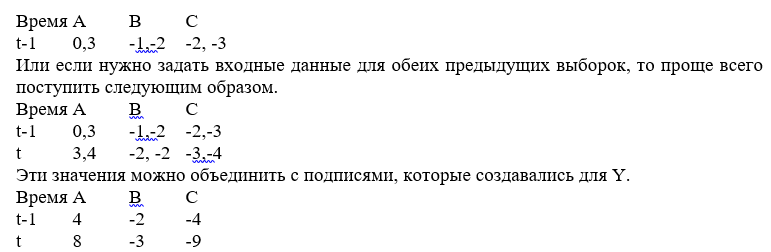

Ни одно из приведенных выше NTC-представлений не точнее других, но все они обладают важной особенностью, которая выражается в явной направленности значений вдоль временной оси.
Причина, по которой используются сразу оба формата входных данных, заключается в том, что каждый из них лучше подходит для своего типа модели.
Формат NTC будет применяться для передачи данных в сверточные и рекуррентные нейронные сети, которые мы подробно обсудим несколько позже.
## NTC или TNC
Есть несколько особенностей, которые стоит отметить в только что описанном формате хранения данных NTC. Во-первых, он избыточный. Это ограничение можно обойти, если порядок данных не важен, используя формат TNC вместо NTC. В формате TNC можно задействовать свою “пакетную” ось для параллельного обхода различных частей данных. Так, например, в приведенной ниже последовательности чисел одновременно обучается три пакета.
56 29 56 94 10 92 52 32 19 59 88 94 6 57 73 59 95 79 97 38 65 51 27
18 77 39 4 19 60 38 73 51 65 4 96 96 6 12 62 59 21 49 65 37 64 69
36 32 48 97 33 44 63 99 10 56 75 20 61 53 71 48 41 2 58 18 4 10 17
66 64 53 24 36 23 33 38 1 17 59 11 36 43 61 96 55 21 45 44 53 26 55
99 22 10 26 25 82 54 82
Если подготовить их в формате NTC с одним каналом, то данные будут выглядеть так.
Время А
t 	56, 29, 56, 94
t-1 	29,56,94,10
t-2	 56,94,10,92
Здесь много повторений, но хорошая новость заключается в том, что алгоритм будет обучаться в реальном хронологическом порядке следования данных, так как все пакеты тесно связаны во времени. Напротив, если выбрать формат TNC (N — это число выборок на пакет) и предположить, что размер пакета равен 4 (меньше некуда), то наши данные могут выглядеть следующим образом.
Время Элемент пакета 1 Элемент пакета 2 Элемент пакета 3 Элемент пакета 4
t 		29 		77 			32 			64
t+1 		56 		39 			48 			53
t+2 		94 		4 			97 			24
Очевидно, что в данном случае повторений данных нет. Нужно ли проводить обучение
на данных, упорядоченных в хронологическом порядке, зависит от набора данных. Те из вас, кому доводилось использовать методы глубокого обучения для обработки текстов на естественных языках (NLP), посчитают этот формат удобным для многих задач NLP, но он не всегда будет столь же эффективен в задачах анализа числовых значений временных рядов.
Построение итераторов. В целом, чтобы передать данные в процедуру обучения, понадобятся итераторы. Итераторы не являются чем-то уникальным для глубокого обучения или языка Python, а скорее отражают общую идею объекта, который обходит коллекцию, отслеживая свое положение и сообщая, когда проход по коллекции будет закончен. Построить итератор в случае обучения на данных, передаваемых в виде массива NumPy, не составляет большого труда.
Если X и Y выступают массивами NumPy, то получить итераторы очень просто.



In [10]:
############################
## ПОДГОТОВКА ДАННЫХ ##
############################

def prepare_iters(data_file, win, h, model, batch_n):
    X, Y = prepared_data(data_file, win, h, model)

    n_tr = int(Y.shape[0] * DATA_SEGMENTS['tr'])
    n_va = int(Y.shape[0] * DATA_SEGMENTS['va'])

    X_tr, X_valid, X_test = X[                      : n_tr], \
                               X[n_tr             : n_tr + n_va], \
                               X[n_tr + n_va : ]
    Y_tr, Y_valid, Y_test = Y[                      : n_tr], \
                               Y[n_tr             : n_tr + n_va], \
                               Y[n_tr + n_va : ]

    iter_tr = mx.io.NDArrayIter(data       = X_tr,
                                   label      = Y_tr,
                                   batch_size = batch_n)
    iter_val = mx.io.NDArrayIter(  data       = X_valid,
                                   label      = Y_valid,
                                   batch_size = batch_n)
    iter_test = mx.io.NDArrayIter( data       = X_test,
                                   label      = Y_test,
                                   batch_size = batch_n)

    return (iter_tr, iter_val, iter_test)


В этом коде итераторы для набора данных создаются специальным методом, после чего они проходят по массивам NumPy, полученным с помощью метода prepare_data() (подробнее об этом  далее). Как только массивы с данными становятся доступными, они разбиваются на источники для обучения, проверки и тестирования, причем данные обучения создаются первыми, данные проверки используется для настройки гиперпараметров с обратной связью вне выборки, а данные тестирования сохраняются для полноценного тестирования (Как обсуждалось ранее, золотой стандарт заключается в обучении и продвижении моделей вперед через большое количество временных периодов, но мы будем избегать такого усложнения в нашем коде. В реальных задачах приходится постоянно проверять и тестировать полученные результаты для правильной оптимизации модели и получения полного представления о ее действительной производительности. В приведенной здесь методике вводится дополнительное смещение между данными тестирования и обучения, а это означает, что данные тестирования, используемые для оценки модели, на самом деле отражают всего один период времени из всего временного диапазона).
Обратите внимание, что функция инициализации итератора принимает входные данные (data), целевое значение (label) и параметр batch_size, отражающий количество экземпляров, которые будут использоваться в итерации для вычисления градиентов и обновления весов модели.
## Формирование данных в коде
Познакомившись с двумя форматами данных, которые будут обрабатываться в коде, рассмотрим код подготовки данных.


In [11]:
def prepared_data(data_file, win, h, model_name):
    df = pd.read_csv(data_file, sep=';', header=0, quoting=3, decimal=",")
    # df.rename(columns={'SMPEP2"': 'SMPEP2'}, inplace=True)
    # for el in df.columns:

    df = df.replace('?', np.nan).dropna()
    
    x  = df.iloc[:, :].values
    x = x.astype(float)
    if np.isnan(x).any():
        print("Внимание! В данных присутствуют NaN после dropna(). Возможно, нужно другое решение!")
        return None
    ## Нормализация данных. Она вызывает упреждение, поскольку
    ## основана на значениях, измеренных по всему набору.
    ## Чтобы предотвратить упреждение, в реальных приложениях
    ## следует применять скользящие статистики
    x = (x - np.mean(x, axis = 0)) / (np.std(x, axis = 0))
    
    if model_name == 'fc_model':  ## формат данных NC
        ## Возврат на один и два шага назад во входных данных
        X = np.hstack([x[1:-h], x[0:-(h+1)]])
        Y = x[(h+1):]
        return (X, Y)
    else: ## Формат данных TNC
        # Предварительное размещение X и Y в памяти
        # X = количество экземпляров * временное окно *
        # * количество каналов (NTC)
        X = np.zeros((x.shape[0] - win - h, win, x.shape[1]))
        Y = np.zeros((x.shape[0] - win - h, x.shape[1]))

        for i in range(win, x.shape[0] - h):
            ## Целевое значение/подпись рассчитывается через
            ## h шагов вперед
            y_i = x[i + h - 1     , :]
            x_i = x[(i - win) : i , :]

            X[i-win] = x_i
            Y[i-win] = y_i

        return (X, Y)

После считывания данных из текстового файла проводится стандартизация каждого столбца. Обратите внимание, что столбцы стандартизируются раздельно, а не однородно по всему набору данных. А все потому, что даже в нашем простом исследовании ясно видно, что данные для электростанций сильно разнятся

# Определим модели

In [12]:
################
## MODELS ##
################

def fc_model(iter_train, input_feature_shape, X, Y,
             win, sz_filt, n_filter, drop, seasonal_period):
    output = mx.sym.FullyConnected(data=X, num_hidden=20)
    output = mx.sym.Activation(output, act_type = 'relu')
    output = mx.sym.FullyConnected(data=output, num_hidden=10)
    output = mx.sym.Activation(output, act_type = 'relu')
    output = mx.sym.FullyConnected(data=output, num_hidden=321)

    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])

def cnn_model(iter_train, input_feature_shape, X, Y,
              win, sz_filt, n_filter, drop, seasonal_period):
    conv_input = mx.sym.reshape(data=X, shape=(0, 1, win, -1))
    ## Convolution expects 4d input (N x channel x height x width)
    ## in our case channel = 1 (similar to a black and white image
    ## height = time and width = channels slash electric locations

    cnn_output = mx.sym.Convolution(data=conv_input,
                                    kernel=(sz_filt,
                                            input_feature_shape[2]),
                                    num_filter=n_filter)
    cnn_output = mx.sym.Activation(data=cnn_output, act_type='relu')
    cnn_output = mx.sym.reshape(mx.sym.transpose(data=cnn_output,
                                                 axes=(0, 2, 1, 3)),
                                shape=(0, 0, 0))
    cnn_output = mx.sym.Dropout(cnn_output, p=drop)

    output = mx.sym.FullyConnected(data=cnn_output,
                                   num_hidden=input_feature_shape[2])
    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])


def rnn_model(iter_train, input_feature_shape, X, Y,
              win, sz_filt, n_filter, drop, seasonal_period):
    rnn_cells = mx.rnn.SequentialRNNCell()
    rnn_cells.add(mx.rnn.GRUCell(num_hidden=RNN_UNITS))
    rnn_cells.add(mx.rnn.DropoutCell(drop))
    outputs, _ = rnn_cells.unroll(length=win, inputs=X, merge_outputs=False)
    rnn_output = outputs[-1] # only take value from final unrolled cell for use later

    output = mx.sym.FullyConnected(data=rnn_output, num_hidden=input_feature_shape[2])
    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])

## simplifications to
## https://github.com/apache/incubator-mxnet/blob/master/example/multivariate_time_series/src/lstnet.py
def simple_lstnet_model(iter_train,  input_feature_shape, X, Y,
                        win, sz_filt, n_filter, drop, seasonal_period):
    ## must be 4d or 5d to use padding functionality
    conv_input = mx.sym.reshape(data=X, shape=(0, 1, win, -1))

    ## convolutional element
    ## we add padding at the end of the time win
    cnn_output = mx.sym.pad(data=conv_input,
                            mode="constant",
                            constant_value=0,
                            pad_width=(0, 0,
                                       0, 0,
                                       0, sz_filt - 1,
                                       0, 0))
    cnn_output = mx.sym.Convolution(data=cnn_output,
                                    kernel=(sz_filt,
                                            input_feature_shape[2]),
                                    num_filter=n_filter)
    cnn_output = mx.sym.Activation(data=cnn_output, act_type='relu')
    cnn_output = mx.sym.reshape(mx.sym.transpose(data=cnn_output,
                                                 axes=(0, 2, 1, 3)),
                                shape=(0, 0, 0))
    cnn_output = mx.sym.Dropout(cnn_output, p=drop)

    ## recurrent element
    stacked_rnn_cells = mx.rnn.SequentialRNNCell()
    stacked_rnn_cells.add(mx.rnn.GRUCell(num_hidden=RNN_UNITS))
    outputs, _ = stacked_rnn_cells.unroll(length=win,
                                          inputs=cnn_output,
                                          merge_outputs=False)
    rnn_output = outputs[-1] # only take value from final unrolled cell for use later
    n_outputs = input_feature_shape[2]
    cnn_rnn_model = mx.sym.FullyConnected(data=rnn_output,
                                          num_hidden=n_outputs)

    ## ar element
    ar_outputs = []
    for i in list(range(input_feature_shape[2])):
        ar_series = mx.sym.slice_axis(data=X,
                                      axis=2,
                                      begin=i,
                                      end=i+1)
        fc_ar = mx.sym.FullyConnected(data=ar_series, num_hidden=1)
        ar_outputs.append(fc_ar)
    ar_model = mx.sym.concat(*ar_outputs, dim=1)

    output = cnn_rnn_model + ar_model
    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])

# Настройка параметров обучения и создание системы учета
Особенности различных моделей мы обсудим в последующих разделах и пока что пропустим ту часть кода, которая отвечает за построение графиков, а перейдем непосредственно к рассмотрению кода обучения и ведения учета.
Ниже приведен код реализации процедуры обучения на доступных для изучения примерах.


In [13]:
## courtesy of https://www.saltycrane.com/blog/2007/11/python-circular-buffer/
class RingBuffer:
    def __init__(self, size):
        self.data = [0 for i in range(size)]

    def append(self, x):
        self.data.pop(0)
        self.data.append(x)

    def get(self):
        return self.data

def train(symbol, iter_train, valid_iter, iter_test,
          data_names, label_names,
          save_dir, gpu):

    if not os.path.exists(SAVE_DIR):
        os.makedirs(SAVE_DIR)
    printFile = open(os.path.join(SAVE_DIR, 'log.txt'), 'w')
    def print_to_file(msg):
        print(msg)
        print(msg, file = printFile, flush = True)
    print_to_file('Epoch     Training Cor     Validation Cor')
    buf     = RingBuffer(THRESHOLD_EPOCHS)
    old_val = None

    devs   = mx.cpu()
    module = mx.mod.Module(symbol,
                           data_names=data_names,
                           label_names=label_names,
                           context=devs)
    module.bind(data_shapes=iter_train.provide_data,
                label_shapes=iter_train.provide_label)
    module.init_params(mx.initializer.Uniform(0.1))
    module.init_optimizer(optimizer='adam',
                          optimizer_params={'learning_rate': LR})

    for epoch in range( N_EPOCHS):
        iter_train.reset()
        iter_val.reset()
        for batch in iter_train:
            module.forward(batch, is_train=True)
            module.backward()
            module.update()

        train_pred  = module.predict(iter_train).asnumpy()
        train_label = iter_train.label[0][1].asnumpy()
        train_perf  = evaluate_and_write(train_pred, train_label,
                                      save_dir, 'train', epoch)

        val_pred  = module.predict(iter_val).asnumpy()
        val_label = iter_val.label[0][1].asnumpy()
        val_perf = evaluate_and_write(val_pred, val_label,
                                   save_dir, 'valid', epoch)

        print_to_file('%d         %f       %f ' % (epoch, train_perf['COR'], val_perf['COR']))

        if epoch > 0:
            buf.append(val_perf['COR'] - old_val)
        if epoch > 2:
            vals = buf.get()
            vals = [v for v in vals if v != 0]
            if sum([v < COR_THRESHOLD for v in vals]) == len(vals):
                print_to_file('EARLY EXIT')
                break
        old_val = val_perf['COR']

    test_pred  = module.predict(iter_test).asnumpy()
    test_label = iter_test.label[0][1].asnumpy()
    test_perf = evaluate_and_write(test_pred, test_label, save_dir, 'tst', epoch)
    print_to_file('\n TESTING PERFORMANCE')
    print_to_file(test_perf)




Зачем нужен кольцевой буфер
Кольцевой буфер — это место для размещения значений, устроенное таким образом, что при их извлечении первый вход будет выступать первым выходом. Он имеет свойство расти только до заданного значения. Хотя производительность и объем памяти здесь не критичны, используя этот класс, можно избежать многих повторений.
В языке Python нет встроенного кольцевого буфера, но вы можете найти простые примеры его реализации в Интернете. Его удобно применять для отслеживания небольшого количества значений в порядке их получения. Предыдущий код выполняет разнообразный набор рутинных задач. Во-первых, в нем устанавливаются значения, по которым отслеживается история показателей точности проверки, позволяющих убедиться в положительном прогрессе обучения. Если модель обучается недостаточно быстро, то не стоит продолжать нагружать графические процессоры, попусту тратя время и электроэнергию.
В шаблоне MXNet задействован программный интерфейс Module (в отличие от Gluon, с которым мы имели дело ранее).


In [14]:

## ЭТО ФРАГМЕНТ КОДА, А НЕ ПОЛНОЦЕННАЯ ЧАСТЬ ПРОГРАММЫ.

## Шаблон mxnet
## Значение по умолчанию - 1 GPU, индекс которого равен 0
## devs = [mx.gpu(0)]
## module = mx.mod.Module(symbol,
##  					data_names=data_names,
##  					label_names=label_names,
##  					context=devs)
## module.bind(data_shapes=iter_train.provide_data,label_shapes=iter_train.provide_label)
## module.init_params(mx.initializer.Uniform(0.1))
## module.init_optimizer(optimizer='adam', optimizer params={'learning_rate' :rgs.lr})


В приведенных выше строках кода выполняются следующее операции.
1. Настройка компонента нейронной сети в виде вычислительного графа.
2. Настройка формы данных так, чтобы позволить сети получить их и оптимизировать.
3. Инициализация всех весов графа случайными значениями (это креативный процесс, а не просто случайный выбор чисел из бесконечного количества возможностей).
4. Инициализация оптимизатора, который может иметь разные представления и для которого в явном виде устанавливается начальная скорость обучения в зависимости от входных параметров.
Теперь воспользуемся итератором обучающих данных для прохода по данным во время обучения.


In [15]:
## ЭТО ФРАГМЕНТ КОДА, А НЕ ПОЛНОЦЕННАЯ ЧАСТЬ ПРОГРАММЫ.

#  for epoch in range (args .n_epochs) :
#  	iter_train.reset()
#  	iter_val.reset()
#  	for batch in iter_train:
#  		module.forward(batch, is_train=True) 	# вычисление прогнозов
#  		module.backward() 				# вычисление градиентов
#  		module.update()				 # обновление параметров
# ## Оценим предсказанные результаты как для обучающего, так и для проверочного набора (в том же внешнем цикле for, что и раньше).
#  ## Результаты обучения
# train_pred = module.predict(iter_train).asnumpy()
# train_label ~ iter_train.label[0][1].asnumpy()
# train_perf = evaluate_and_write(train_pred, train_label,save_dir, 'train', epoch)
#  ##Результаты проверки
# val_pred = module.predict(iter_val).asnumpy()
# val_label = iter_val.label[0][1].asnumpy()
# val_perf = evaluate_and_write(val_pred, val_label,	save_dir, 'valid', epoch)
# ## Следующий цикл проверяет условия досрочного прекращения обучения.
# ## Python
# if epoch > 0:
#   buf .append(val_perf ['COR'] - old_val)
# if epoch > 2:
#   vals = buf. get ()
#   vals = [v for v in vals if v != 0]
#   if sum( [v < COR—THRESHOLD for v in vals]) == len (vals):
#     print_to_file ( ' EARLY EXIT' )
#     break
# old_val = val_perf ['COR' ]


Этот громоздкий код позволяет вести учет выполненных действий и проверять условия, записывая каждое последующее значение корреляции между прогнозируемыми и фактическими значениями. Если поэтапная корреляция не демонстрирует улучшений (или даже показывает ухудшение) для заданного количества повторений, то обучение прекращается.

# Оценка производительности
Функция evaluate_and_write() фиксирует корреляцию, необработанные и оценочные значения на каждом вычислительном этапе. Она понадобится нам для тестирования в конце всего обучения


In [16]:
def evaluate_and_write (pred, label, save_dir, mode, epoch):
	if not os.path.exists(save_dir):
		os .makedirs (save_dir)
	pred_df = pd. DataFrame (pred)
	label_df = pd.DataFrame(label)
	pred_df. to_csv ( os .path.join (save_dir, ' %s_pred%d. csv'
					% (mode, epoch) ) )
	label_df. to_csv (os .path.join (save_dir, ' %s_label%d. csv'
					% (mode, epoch) ) )
	return { 'COR': COR (label, pred) }
## В ней, в свою очередь, применяется корреляционная функция, определенная следующим образом.
def COR (label, pred) :
	label_demeaned = label - label .mean (0)
	label_sumsquares = np.sum(np.square(label_demeaned), 0)
	pred_demeaned = pred - pred.mean(0)
	pred_sumsquares = np.sum(np.square(pred_demeaned), 0)
	cor_coef = np.diagonal(np.dot(label_demeaned.T, pred_demeaned)) / np.sqrt(label_sumsquares * pred_sumsquares)
	return np.nanmean(cor_coef)


Иногда в этом наборе данных встречаются случаи нулевой дисперсии, которые могут привести к получению значений NAN в столбце, что обусловливает выбор функции np. nanmean() вместо np.mean().
Обратите внимание, что одна из основных возможностей, которые здесь исключаются, — сохранение весов модели в контрольных точках на протяжении всего процесса обучения. При подготовке к производству нам нужно было иметь возможность перезагрузить модель и развернуть ее, для чего используются функции Module.save_checkpoint (сохранение весов) и Module.load (загрузка модели обратно в память для продолжения обучения или разворачивания производства). Существует много вариантов обучения принципам настройки правильного конвейера глубокого обучения, здесь мы рассматриваем только основные моменты.


# Сборка
Объединим компоненты конвейера в теле метода__ main__ ().


In [17]:
# create data iterators
iter_train, iter_val, iter_test = prepare_iters(DATA_FILE, WIN, H, MODEL, BATCH_N)

## prepare symbols
input_feature_shape = iter_train.provide_data[0][1]
X                   = mx.sym.Variable(iter_train.provide_data[0].name)
Y                   = mx.sym.Variable(iter_train.provide_label[0].name)

# set up model
model_dict = {
    'fc_model'            : fc_model,
    'rnn_model'           : rnn_model,
    'cnn_model'           : cnn_model,
    'simple_lstnet_model' : simple_lstnet_model
    }

model = model_dict[MODEL]

symbol, data_names, label_names = model(iter_train,
                                        input_feature_shape, X, Y,
                                        WIN, SZ_FILT,
                                        N_FILT, DROP, SEASONAL_PERIOD)

## train
train(symbol, iter_train, iter_val, iter_test, data_names, label_names, SAVE_DIR, GPU)

Epoch     Training Cor     Validation Cor


[19:08:47] ../src/executor/graph_executor.cc:1991: Subgraph backend MKLDNN is activated.


0         0.060147       0.139809 
1         0.095585       0.175107 
2         0.131378       0.210429 
3         0.167520       0.245417 
4         0.204126       0.279821 
5         0.241381       0.313463 
6         0.279137       0.345980 
7         0.316618       0.376754 
8         0.352547       0.405097 
9         0.385529       0.430380 
10         0.414606       0.452276 
11         0.439521       0.470786 
12         0.460513       0.486163 
13         0.478121       0.498788 
14         0.492918       0.509100 
15         0.505438       0.517523 
16         0.516098       0.524420 
17         0.525325       0.530158 
18         0.533388       0.534972 
19         0.540565       0.539100 
EARLY EXIT

 TESTING PERFORMANCE
{'COR': 0.44477123}


Здесь использована инфраструктура, созданная выше. Сначала анализируются аргументы командной строки. После этого создаются итераторы с настраиваемыми входными данными, включая горизонт прогнозирования, окно обратного просмотра, размер пакета и имя создаваемой модели. Далее создаются символы MXNet, а также записывается форма входных данных, востребованная при создании модели. Наконец, информация о модели вместе с итераторами и каталогом сохранения передается в функцию обучения, которая выполняет наиболее интересную часть: обучает модель и выводит показатели производительности.
Таким образом, мы можем наблюдать минимальный, но полностью функциональный конвейер обучения, включающий прием и изменение данных, построение и обучение модели, а также запись важных показателей для правильной ее оценки. Кстати, метод print_to_f ile () — это всего лишь удобная оболочка для функции print().


In [18]:
## ЭТО ФРАГМЕНТ КОДА, А НЕ ПОЛНОЦЕННАЯ ЧАСТЬ ПРОГРАММЫ.
# def print_to_file (msg):
#   print (msg, file = printFile, flush = True)
# print_to_file(args)


Вам может понадобиться сохранить процесс обучения модели. Вполне возможно, что подобранные веса модели окажутся не теми, на которых завершился сеанс обучения, а получены несколько ранее. Наличие записи о ходе обучения поможет точнее настроить гиперпараметры, относящиеся как к структуре модели, так и к процессу обучения, начиная с их количества (во избежание недо-или переобучения) и заканчивая скоростью обучения (для предотвращения слишком сильных или слабых корректировок).
На данный момент мы располагаем полным, хотя и минимальным, жизнеспособным конвейером, но нам все еще не хватает моделей для обучения. Далее мы перейдем к рассмотрению основных типов моделей, применимых в анализе временных рядов, и обучим каждую из них, чтобы оценить относительную производительность.
# Сети прямого распространения
В этом разделе предпринят довольно необычный прием, который заключается в использовании сетей прямого распространения для анализа временных рядов. Большинство современных задач обработки данных временных рядов основано на рекуррентных или, несколько реже, сверточных нейронных сетях. Однако мы начнем наш экскурс с нейронной сети прямого распространения, так как она имеет самую простую структуру. Существует несколько причин, по которым дальнейший материал целесообразно начинать рассматривать именно с нейронных сетей прямого распространения.
• Сети прямого распространения допускают очень простое распараллеливание, а значит, обладают высокой производительностью. Получив в свое распоряжение достаточно хорошую модель прямого распространения, вы сможете вычислить ее очень быстро.
• Сети прямого распространения прекрасно подходят для оценки сложности динамических процессов в анализируемой временной последовательности. Не все временные ряды действительно являются временными в том понимании, что не во всех них динамические изменения демонстрируют временную направленность — более ранние значения имеют определенную связь с более поздними значениями. Нейронную сеть прямого распространения желательно использовать в качестве одной из базовых моделей наряду с простой линейной моделью.
• Компоненты сетей прямого распространения часто интегрируются в более крупные и сложные архитектуры глубокого обучения временных рядов. Поэтому крайне важно понять, как они работают, даже если они не образуют целостную модель для вашего проекта.


# Простой пример
Сеть прямого распространения — это простейший тип нейронной сети, и мы начнем ее изучение с примера использования архитектуры прямого распространения к некому временному ряду. В структуре стандартной нейронной сети прямого распространения нет ничего, указывающего на временные отношения, но идея заключается в том, чтобы позволить алгоритму понять, как по прошлым входным данным предсказать будущие данные. Пример сети прямого распространения приведен на рис. 9.1. Сеть прямого распространения представляет собой ряд полносвязных слоев, т.е. входные данные каждого слоя подключаются к каждому узлу графа.
Начнем изучение с простого примера с уже известным способом форматирования данных. Иначе говоря, наши входные данные X будут представлены двумерными значениями N х С (т.е. выборки х каналы), где временные компоненты упорядочены в каналах. Это соответствует следующему формату данных.
A,t-2 	A,t-3 	В,t-2 	B,t-3 	С,t-2 	C,t-3
J 	0	-2	-1	-3	-2
Напомним код, который представляет эту ветвь данных.


In [19]:
## ЭТО ФРАГМЕНТ КОДА, А НЕ ПОЛНОЦЕННАЯ ЧАСТЬ ПРОГРАММЫ.

# if model_name == 'fc_model':
# ## Первый и второй обратные шаги в исходных данных
#   X = np.hstack([х[1:-1], х[:—2] ])
#   Y = х[2: ]
#   return (X, Y)


Создадим полносвязную модель с помощью программного интерфейса Module пакета MXNet.

In [20]:
def fc_model(iter_train, input_feature_shape, X, Y,
             win, sz_filt, n_filter, drop, seasonal_period):
    output = mx.sym.FullyConnected(data=X, num_hidden=20)
    output = mx.sym.Activation(output, act_type = 'relu')
    output = mx.sym.FullyConnected(data=output, num_hidden=10)
    output = mx.sym.Activation(output, act_type = 'relu')
    output = mx.sym.FullyConnected(data=output, num_hidden=321)

    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])

Мы строим трехслойную полносвязную сеть. Первый слой имеет 20 скрытых элементов, а второй слой  10. После первых двух слоев добавлен слой активации. Именно он делает модель нелинейной. Без него она представляет последовательность произведений матриц и сводится к линейной модели. Полносвязный слой имеет вид Y = XWT + b, где W  это набор весов, соответствующих таковому в произведении матриц с исправленными размерностями, результатом которого будет вектор, учитывающий скрытые значения. Затем к нему добавляется сдвиг. Веса W и сдвиг b уточняются в ходе обучения. Заметьте, что обучение одного такого набора весов или даже серии таких весов не представляет большого интереса  это просто другой способ вычисления линейной регрессии. Однако активация, включаемая в модель после матричных операций, предопределяет разнообразие. Слой активации основан на различных нелинейных функциях, таких как tanh и ReLU, графики которых изображены на рис. 9.5 и 9.6 соответственно. В предыдущем коде в качестве функции активации использована функция ReLU. В общем случае имеет смысл тестировать различные функции активации (ReLU, tanh, сигмоида) на ранних стадиях построения модели и настройки гиперпараметра

Теперь давайте обучим нашу модель и посмотрим, как она работает. Это хорошая точность? Трудно сказать, не зная контекста задачи. Работая с моделью глубокого обучения, вы должны запустить ее в производство, только если она значительно превосходит более простые модели, рассматриваемые в предыдущих разделах. Модель глубокого обучения требует больше времени для расчета и, как правило, выдвигает более высокие требования к вычислительным ресурсам, поэтому ее следует использовать только при полной оправданности производственных затрат. По этой же причине, выполняя задачи анализа временных рядов с помощью инструментов глубокого обучения, сначала попробуйте обратиться к более простым моделям, которые послужат объективным стандартом в достижении цели.
В любом случае нам удалось показать, что даже модель без явно выраженной временной направленности способна обучаться и составлять прогнозы, которые правдоподобно коррелируют с измеренными значениями.
# Внимание как фактор улучшения сетей прямого распространения
Хотя сети прямого распространения не показывают хороших результатов в решении задач анализа временных рядов, исследователями ведутся работы по разработке архитектур с повышенной точностью обработки последовательных данных. Одна из рассматриваемых ими концепций основана на понятии внимания, которое обозначает механизмы нейронной сети, позволяющие определить ту часть последовательности, которая требует наибольшего сосредоточения и вносит наибольший вклад в получение желаемого результата.
Понятие внимания предполагает, что архитектура нейронной сети должна снабжать модель механизмами определения наиболее важной информации на каждом временном этапе. Это достигается с помощью весов внимания, которые настраиваются отдельно для каждого временного шага, позволяя модели комбинировать информацию с разных временных шагов. Такие веса внимания умножаются на то, что в противном случае считается выходным, либо скрытым, состоянием модели, преобразуя это скрытое состояние в вектор контекста, название которого указывает на то, что скрытое состояние теперь лучше учитывает весь временной контекст информации, содержащейся во временных рядах и подлежащей описанию с помощью неких временных зависимостей.
Функция Softmax()
Возможно, вы уже знакомы с функцией

которая служит двум целям.
• Сделать сумму выходов равной единице, чтобы представить полный набор вероятностей. Часто результат работы функции softmax() интерпретируется именно так.
• Принимая во внимание общую форму экспоненциальной функции, сделать большие входные данные (у.) еще большими, а меньшие входные данные еще больше уменьшить. Такой подход позволяет подчеркнуть сильные активации/веса и погасить слабые сигналы.
Функция softmax() также известна как нормализованная экспоненциальная функция  такое название предопределяется формой ее математической записи, приведенной выше.
Исходно концепция внимания стала использоваться в рекуррентных нейронных сетях (подробнее об этом  далее), но понять ее назначение и принципы реализации проще всего на примере архитектуры прямого распространения, приведенном в исследовательской работе https: //arxiv.org/pdf/1512.08756.pdf. В этом документе рассматривается такой способ применения нейронных сетей прямого распространения к последовательным данным, в котором реакция сети на каждый шаг последовательности передается на вход и таким образом влияет на получаемый результат. Такой подход позволяет обрабатывать последовательности переменной длины, ведь временные ряды переменной длины являются типичными для практических задач.
На рис. 9.7 представлен пример того, как нейронная сеть прямого распространения может использоваться для решения задачи обработки последовательных данных.
Сеть прямого распространения применяется к входам на каждом временном шаге отдельно, генерируя “скрытое состояние” для каждого временного шага  . В результате формируется ряд скрытых состояний. Показанная в углу вторая нейронная сеть, разработанная для обучения  , представляет механизм внимания. Он позволяет узнать, какой вес приписать каждому входу, причем на вход передается состояние, взятое для другого момента времени. Это позволяет механизму определить веса для каждого временного шага в окончательной сумме входных данных.
Впоследствии скрытые состояния разных временных этапов объединяются с соответствующими коэффициентами внимания перед окончательной обработкой, чтобы определить целевое значение/подпись. Разработчики такой сети обнаружили, что она отлично справляется с различными задачами, которые до этого решались исключительно с помощью рекуррентных нейронных сетей, в полной мере удовлетворяющих требованиям к запоминанию более ранних входных данных и объединения их с более поздними данными.
Этот пример наглядно показывает, что модели глубокого обучения не имеют простых архитектур ввиду большого количества возможностей по адаптации даже базовой модели к целевым задачам анализа временных рядов.
Как уже отмечалось, нейронные сети прямого распространения не являются основными инструментами решения задач, связанных с обработкой данных временных рядов. Тем не менее они послужат хорошей отправной точкой на пути к оценке точности простых моделей. Интересно, что если не добавлять функцию активации, то можно использовать их для реализации моделей AR и VAR с помощью фреймворка MXNet. Иногда они, правда, применяются в чистом виде. Что более важно, существуют архитектурные решения полносвязных моделей, которые оказываются необычайно точными для определенных наборов временных рядов.


# Сверточные нейронные сети
Если вы знакомы с глубоким обучением, то, скорее всего, имеете представление о сверточных нейронных сетях (Convolutional Neural Networks — CNN). Большая часть выдающихся, сравнимых с возможностями человеческого мозга, достижений, которые приписываются компьютерам, за последние годы, получены благодаря чрезвычайно запутанной и сложной сверточной архитектуре.
Несмотря на все это, принципы построения свертки довольно просты и были разработаны задолго до появления глубокого обучения. Свертки давно применяются в более простых, управляемых человеком, системах обработки и распознавания изображений, например? в таких простых фильтрах, как гауссово размытие. Все, кто не знакомы с устройством ядер обработки изображений и не представляют, как они пишутся, могут найти хорошее описание принципов их построения на сайте Stack Overflow (https: //perma.cc/8U8Y-RBYW)  как с помощью высокоуровневого программного интерфейса, так и вручную с использованием инструментов библиотеки NumPy.
Свертка означает такое применение ядра (матрицы) к более крупной матрице, в котором она как бы “скользит” по большей матрице, образуя новую. Каждый элемент новой матрицы представляет собой сумму поэлементного произведения ядра и фрагмента большей матрицы. Такое ядро применяется неоднократно в процессе “скольжения” по матрице/изображению. Это делается для заранее оговоренного количества ядер для проявления различных признаков.

Простая сверточная модель
Сверточную модель можно применить к имеющимся данным вместо описанной выше полносвязной модели. В этом и остальных примерах мы будем работать с данными в формате NTC, которые выглядят следующим образом.
Время 	А 		В 		С
t-1		0,3		-1,-2		-2,-3
t		3,4		-2,-2		-3,-4
Как видите, данные представляются в виде N х Т х С. Однако сверточный слой предполагает получение данных в формате batch_size, channel,height х width.


In [21]:
def cnn_model(iter_train, input_feature_shape, X, Y,
              win, sz_filt, n_filter, drop, seasonal_period):
    conv_input = mx.sym.reshape(data=X, shape=(0, 1, win, -1))
    ## Сверточная сеть работает с четырехмерными входными данными
	## (N х количествово каналов х высота х ширина)
	## в нашем случае канал один (как на черно-белом изображении,
	## где высота = время, ширина = расположение электростанций
    cnn_output = mx.sym.Convolution(data=conv_input,
                                    kernel=(sz_filt,
                                            input_feature_shape[2]),
                                    num_filter=n_filter)
    cnn_output = mx.sym.Activation(data=cnn_output, act_type='relu')
    cnn_output = mx.sym.reshape(mx.sym.transpose(data=cnn_output,
                                                 axes=(0, 2, 1, 3)),
                                shape=(0, 0, 0))
    cnn_output = mx.sym.Dropout(cnn_output, p=drop)

    output = mx.sym.FullyConnected(data=cnn_output,
                                   num_hidden=input_feature_shape[2])
    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])

Снова-таки, представленная модель все еще не имеет явно заданной временной направленности. При этом время все же откладывается вдоль одной из осей, что делает модель более упорядоченной.

Зачастую очень трудно разобраться, почему одна модель лучше, другая  хуже. На самом деле даже сами разработчики моделей нередко ошибаются, определяя причины хороших результатов модели. Существует очень мало аналитических средств, позволяющих выяснить это предельно точно, а с учетом порой запутанной структуры входного набора данных — почти невозможно. Но разве отсутствие явных преимуществ модели CNN не указывает на то, что большая часть важной информации сосредоточена в ближайшие моменты времени? Или это отражается в количестве параметров? И как сказывается на точности модели количество используемых гиперпараметров? В реальных задачах критически важно понимать, какой уровень точности можно считать достаточным для заданных структуры модели, структуры данных и общего количества рассматриваемых параметров.
Мы наблюдаем ошибку в коде, обусловленную избранной логикой ранней остановки. Похоже, она была слишком мягкой. В данном случае задача была пересмотрена, и мне удалось заметить, что в течение ряда этапов могут наблюдаться следующие �7.000000,5929.000000,1411.000000�яции.
[-0,023024142, 0,03423196, -0,008353353, 0,009730637, -0,029091835]
Такой результат означает, что изменение в корреляции может быть очень сильным — даже отрицательным — и многократно наблюдаемым, и тем не менее точность модели понемногу улучшается. Такая мягкость оказывается не самым хорошим решением, поэтому неплохо вернуться к конвейеру и задать более жесткие условия ранней остановки. Это только один из примеров компромисса, которые вы будете постоянно искать при использовании моделей глубокого обучения. Чтобы его достичь, вам придется выполнять много пробных прогонов для построения работоспособного конвейера. Таким образом можно получить представление о параметрах, приемлемых для целевого набора данных, и о представляющих интерес моделях, учитывая, что они существенно различаются от одного набора данных к другому.
## Альтернативные сверточные модели
Простая сверточная модель, с которой вы познакомились выше, работала на удивление хорошо, хотя и не содержала никаких специальных модификаций, учитывающих временную направленность данных. Далее мы обсудим два подхода к использованию сверточных архитектур для анализа временных рядов: принятые в исследовательской и производственной средах.
Почему сверточные сети столь привлекательны? На то есть множество причин. Во-первых, сверточные архитектуры — это проверенные, эффективные методы, которые хорошо изучены специалистам отрасли. Кроме того, у сверточных моделей мало параметров, так как одни и те же фильтры повторяются снова и снова, а это означает, что для обучения не требуется слишком много весов.
И наконец, большие фрагменты сверточных моделей можно вычислить параллельно, т.е. они могут быть очень быстродействующими инструментами построения логических выводов.


# Рекуррентные нейронные сети
Рекуррентные нейронные сети (Recurrent Neural Networks — RNN) представляют собой широкий класс сетей, в которых одни и те же параметры применяются повторно даже при изменении входных данных с течением времени. Они очень похожи на нейронные сети прямого распространения, описанные выше, но, как бы там ни было, на RNN основаны — полностью или частично — многие из наиболее успешных моделей, применяемых для решения научных и производственных задач, связанных с анализом последовательностей данных, обработкой языковых структур, а также с прогнозированием и классификацией временных рядов. Укажем на важные отличия RNN и сетей прямого распространения.
• RNN рассматривает временные шаги по порядку.
• RNN включает состояние, которое сохраняется неизменным от одного временного шага к другому, и именно это состояние, а также его статические параметры, определяют ответные обновления для каждой новой порции информации, получаемой на каждом шаге.
• RNN включает параметры, которые позволяют пошагово обновлять свое состояние, включая скрытое состояние.
Часто RNN описываются через парадигму развертывания, согласно которой рекуррентная архитектура основана на узлах.
Однако самый простой способ понять, как работает RNN, — это изучить простой пример. Моя самая любимая реализация RNN — управляемый рекуррентный блок (Gated Recurrent Unit — GRU). Его математическое описание выглядит сложнее, чем код реализации, поэтому ниже рассматривается вариант написания GRU на языке Python с помощью библиотеки NumPy. Как видите, в коде используются две функции активации: сигмоида и гиперболический тангенс. Кроме того, все, что делает код, — перемножает и суммирует матрицы, а также выполняет поэлементное умножение матриц (произведение Адамара).

In [22]:
## Используем веса, заимствованные из TensorFlow
## https://www.tensorflow.org/api_docs/python/tf/contrib/cudnn_rnn/CudnnGRU
## Его можно настроить на использование любых других весов
def calc_gru(X, weights, num_inputs, num_features) :
	Us = weights[:(3*num_features*num_inputs)]
	Us = np.reshape (Us, [3, num_features, num_inputs])
	Ws = weights[(3*num_features*num_inputs):(3*num_features*num_features +
3*num_features*num_inputs)]
	Ws = np.reshape (Ws, [3, num_features, num_features])
	Bs = weights [(-6 * num_features) :]
	Bs = np.reshape (Bs, [6, num_features])
	s = np. zeros ([129, num_features] )
	h = np. zeros ([129, num_features])
	for t in range (X. shape [0]) :
		z = sigmoid (np.matmul (Us [0, :, :], X[t, :]) +
np.matmul (Ws [0, :, :], s[t, :]) + Bs[0, :] + Bs[3, :])
		r = sigmoid (np.matmul (Us [1, :, :], X[t, :]) +
np.matmul (Ws [1, :, :], s[t, :]) + Bs[l, :] + Bs[4, :])
		h[t+l, :] = np. tanh (np.matmul (Us [2, :, :], X[t, :]) +
Bs[2, :] +
r* (np.matmul (Ws [2, :, :], s[t, :]) + Bs[5, :]))
		s[t+l, :] = (1 - z)*h[t + 1, :] + z*s[t, :]
	return h, s


Механизм GRU в настоящее время является одним из наиболее широко используемых решений RNN. Это простейшая версия архитектуры с долгой кратковременной памятью (LSTM — Long Short-Time Memory), которая работает аналогичным образом. Различия между ячейками GRU и LSTM заключаются в следующем.
• У GRU есть два шлюза, а у LSTM — три. Эти шлюзы используются для определения объема разрешенной новой информации, сохраняемой старой информации и т.д. У LSTM больше шлюзов, а потому больше и параметров.
• LSTM, как правило, обладает лучшей производительностью, но GRU быстрее обучается (из-за меньшего количества параметров). Тем не менее есть свидетельства, когда GRU превосходит LSTM по производительности. Скорее всего, GRU оказываются лучше LSTM при решении неязыковых задач.
Как видите, разница в большей степени зависит от сложности соответствующей модели и производительности вычислительной системы, на которых выполняется обучение, а также от предмета прогнозирования. Важно разобраться в принципах матричной реализации механизмов GRU и LSTM, чтобы понимать, как они работают. Познакомившись с ними, вы научитесь определять, в каких ситуациях модели не обучаются на определенных наборах данных и почему. Зачастую в динамике проявляются неучтенные в рамках выбранного формата факторы.
Обратите внимание, что как GRU, так и LSTM помогают решить проблему, которая впервые возникла при использовании RNN, а именно — взрывающиеся и исчезающие градиенты. Из-за повторяющегося применения одних и тех же параметров часто случалось, что градиенты быстро устремлялись к нулю (что плохо) или к бесконечности (что также плохо). Это означает, что обратное распространение было трудным или даже невозможным при развертывании рекуррентной сети. Эта проблема была успешно разрешена с помощью архитектур GRU и LSTM, поскольку они, как правило, поддерживают входы и выходы узлов в диапазонах допустимых значений. Это связано как с особой формой функции активации, которая в них используется, так и со способностью шлюза обновлений к передаче (или блокированию) проходящей через него информации, что позволяет градиенту с большей вероятностью принимать правдоподобные значения, чем это происходит в обычной RNN, лишенной шлюзов.
Хотя GRU и LSTM достаточно легко написать самому, как показано выше, делать это совсем необязательно. Наиболее важная причина обратиться к готовым решениям заключается в их лучшей оптимизации за счет объединения операций матричного умножения. Наиболее эффективная и доступная сторонняя реализация, стоящая нашего внимания, представлена в библиотеке cuDNN, разработанной компанией NVIDIA, в которой операции умножения матриц выполняются одновременно, что крайне важно для GRU и LSTM. Использование программного интерфейса cuDNN позволило добиться существенного прироста производительности по сравнению с другими решениями, что было признано основным фактором повышения скорости обучения на конкурсе Kaggle. Все основные фреймворки глубокого обучения обеспечивают доступ к этой реализации, хотя в некоторых случаях (например, при работе с tf.contrib.cudnn_rnn в библиотеке TensorFlow) для ее подключения необходимо использовать специальный программный интерфейс. В других случаях, таких как MXNet, вы будете применять cuDNN по умолчанию, если не сделаете что-то необычное с развернутыми узлами.


## Продолжение примера по прогнозированию объемов потребления электроэнергии
Теперь давайте перейдем к решению задачи по прогнозированию потребления электроэнергии с помощью RNN. Как и ранее, входные данные будут представлены в формате TNC. Это вполне ожидаемый для RNN формат, и нам не придется его изменять.


In [23]:
def rnn_model(iter_train, input_feature_shape, X, Y,
              win, sz_filt, n_filter, drop, seasonal_period):
    rnn_cells = mx.rnn.SequentialRNNCell()
    rnn_cells.add(mx.rnn.GRUCell(num_hidden=RNN_UNITS))
    rnn_cells.add(mx.rnn.DropoutCell(drop))
    outputs, _ = rnn_cells.unroll(length=win, inputs=X, merge_outputs=False)
    rnn_output = outputs[-1]

    output = mx.sym.FullyConnected(data=rnn_output, num_hidden=input_feature_shape[2])
    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])


Производительность модели разочаровывает, учитывая, что она исходно предназначена для обработки временных данных.
Здесь важно разобраться, почему модель не демонстрирует хорошую производительность. Разве мы не предоставили достаточно параметров для RNN? Можно ли улучшить результат за счет добавления в модель некоторых архитектурных решений, которые обычно применяются в подобных случаях, например, учесть фактор внимания? (Относится как к RNN, так и к сетям прямого распространения, рассматриваемым ранее.)
Модель достигла своих пиковых показателей в процессе обучения немного раньше, чем модели прямого распространения или сверточные модели. Это может быть вызвано как нехваткой параметров для описания набора данных, так и тем, что RNN специально приспособлена для обработки таких данных, или чем-то еще. Чтобы понять истинную причину, вам придется провести дополнительное тестирование с подбором настроек.


## Комбинированные архитектуры
Очень часто успешные промышленные и конкурсные приложения глубокого обучения, предназначенные для прогнозирования временных рядов, используют обновленную архитектуру, заключающуюся в новых способах применения традиционных механизмов LSTM или комбинировании некоторых других компонентов. Одним из примеров такого решения выступает нейронная сеть 2018 года, предложенная исследователями Университета Карнеги-Меллона. Разработчики стремились максимально задействовать сильные стороны как сверточных, так и рекуррентных архитектур, а также некоторых других инноваций. Они создали рекуррентную модель с пропуском слоя, которая настроена так, чтобы учитывать периодичность данных (годовую, еженедельную, ежедневную  в зависимости от характера набора данных), которую также можно задать с помощью гиперпараметра.
Оказалось, что во многих временных рядах есть тренды, которые плохо моделируются нелинейными моделями глубокого обучения. Это означает, что одна только модель глубокого обучения не способна охватить существенные временные масштабы, наблюдаемые в некоторых временных рядах. Исследователи адаптировали архитектуру для решения подобных проблем с помощью традиционной линейной модели, а именно  модели авторегрессии, рассматриваемой в разделе 5.
Итоговая модель, модифицированная LSTNet, комбинировала выходы модели AR и модели с традиционным рекуррентным слоем и параллельным пропуском рекуррентного слоя.
Архитектура нейронной сети содержит компонент свертки и рекуррентный элемент в последовательном порядке, причем оба компонента используют одни и те же входные данные
Обнаружено, что для трех из четырех исследуемых наборов данных, охватывающих широкий спектр тематических областей, были получены результаты, которые намного превзошли все опубликованные до этого. Неудача наблюдалась только в случае данных о курсах валют, которые, как известно, очень сложно предсказать из-за высокого соотношения “шум/сигнал” и существования высокоэффективного рынка, обеспечивающего быстрое рассеивание любого сигнала, что обусловлено стремлением инвесторов к нахождению граничного значения.
Источником вдохновения для следующей разработки послужила научная статья. Мы будем работать с модифицированным кодом (https://perma.сс/3W4Y-E8E2) (Этот код можно найти в персональном репозитории Оливера Прингла (Oliver Pringle) на GitHub), заимствованным из каталога примеров для пакета MXNet, подробно описанного разработчиком Оливером Принглом в посте, опубликованном в его блоге (https://perma.cc/9KM2-RNPK).
Здесь, как отмечалось ранее, применяется упрощенный код, подготовленный для репозитория MXNet, из которого удалены сезонные компоненты и пропуски соединений, а также используется сверточный фильтр только одного размера. Сверточный слой задается так же, как в примере cnn_model ранее.


In [24]:
# ЭТО ФРАГМЕНТ КОДА, А НЕ ПОЛНОЦЕННАЯ ЧАСТЬ ПРОГРАММЫ.

# ## Для обработки данные должны быть четырех- или пятимерными
# conv_input = mx.sym.reshape (data=X, shape=(0, 1, win, -1))

# ## Сверточный компонент
# ## Дополнение данных до конца временного окна
# cnn_output = mx.sym.pad(data=conv_input,
# mode= "constant",
# constant_value=0,
# pad_width=(0, 0,
#         0, 0,
#         0, sz_filt - 1,
#         0, 0))
# cnn_output = mx.sym.Convolution(data=cnn_output,
# kernel=(sz_filt,
# input_feature_shape[2]),
# num_filter=n_filter)
# cnn_output = mx.sym.Activation(data=cnn_output, act_type='relu')
# cnn_output = mx.sym.reshape(mx.sym.transpose(data=cnn_output, axes= (0, 2, 1, 3)),shape=(0, 0, 0))
# cnn_output = mx.sym.Dropout(cnn_output, p=drop)
# ## RNN применяется не к исходным данным, а к результатам работы сверточного компонента.

# ## Рекуррентный компонент
# stacked_rnn_cells = mx.rnn.SequentialRNNCell()
# stacked_rnn_cells.add(mx.rnn.GRUCell(num_hidden=args.rnn_units))
# outputs, _ = stacked_rnn_cells.unroll(length=win,
# 						inputs=cnn_output,
# 						merge_outputs=False)
# rnn_output = outputs [-1]
# n_outputs = input_feature_shape [2]
# cnn_rnn_model = mx.sym.FullyConnected(data=rnn_outputz,
# 						num_hidden=n_outputs)


Наконец, как показано далее, параллельно с CNN/RNN обучаются AR-модели (всего  321 AR-модель, по одной на столбец/переменную/электростанцию). Совершается проход по станциям так, что в отдельный момент времени в модели настраивается по одной станции.

In [25]:
def simple_lstnet_model(iter_train,  input_feature_shape, X, Y,
                        win, sz_filt, n_filter, drop, seasonal_period):
    ## must be 4d or 5d to use padding functionality
    conv_input = mx.sym.reshape(data=X, shape=(0, 1, win, -1))

    ## convolutional element
    ## we add padding at the end of the time win
    cnn_output = mx.sym.pad(data=conv_input,
                            mode="constant",
                            constant_value=0,
                            pad_width=(0, 0,
                                       0, 0,
                                       0, sz_filt - 1,
                                       0, 0))
    cnn_output = mx.sym.Convolution(data=cnn_output,
                                    kernel=(sz_filt,
                                            input_feature_shape[2]),
                                    num_filter=n_filter)
    cnn_output = mx.sym.Activation(data=cnn_output, act_type='relu')
    cnn_output = mx.sym.reshape(mx.sym.transpose(data=cnn_output,
                                                 axes=(0, 2, 1, 3)),
                                shape=(0, 0, 0))
    cnn_output = mx.sym.Dropout(cnn_output, p=drop)

    ## recurrent element
    stacked_rnn_cells = mx.rnn.SequentialRNNCell()
    stacked_rnn_cells.add(mx.rnn.GRUCell(num_hidden=RNN_UNITS))
    outputs, _ = stacked_rnn_cells.unroll(length=win,
                                          inputs=cnn_output,
                                          merge_outputs=False)
    rnn_output = outputs[-1] # only take value from final unrolled cell for use later
    n_outputs = input_feature_shape[2]
    cnn_rnn_model = mx.sym.FullyConnected(data=rnn_output,
                                          num_hidden=n_outputs)

    ## ar element
    ar_outputs = []
    for i in list(range(input_feature_shape[2])):
        ar_series = mx.sym.slice_axis(data=X,
                                      axis=2,
                                      begin=i,
                                      end=i+1)
        fc_ar = mx.sym.FullyConnected(data=ar_series, num_hidden=1)
        ar_outputs.append(fc_ar)
    ar_model = mx.sym.concat(*ar_outputs, dim=1)

    output = cnn_rnn_model + ar_model
    loss_grad = mx.sym.LinearRegressionOutput(data=output, label=Y)
    return (loss_grad,
            [v.name for v in iter_train.provide_data],
            [v.name for v in iter_train.provide_label])


Обратите внимание, что эта модель показывает намного лучшую производительность, чем любые другие.

Очевидно, модель работает намного производительнее, чем другие рассматриваемые нами модели, а значит, в предложенной архитектуре есть что-то, что позволяет эффективно использовать сверточные изображения для представления последовательных данных, на которых обучается рекуррентный слой. Традиционный инструмент статистического анализа — AR-модель — также вносит немалый вклад в общее повышение производительности (Если сомневаетесь, то попробуйте провести обучение модели без AR-компонента. Его код удалить совершенно нетрудно). Эта модель, безусловно, лучшая из предложенных, и она оказывается в большом отрыве от остальных решений, по крайней мере для того небольшого объема данных, который подвергался анализу. Вы, конечно же, вправе использовать и другие модели, но вам не придется долго раздумывать, чтобы определить явного лидера.

# Резюме
Одно из интереснейших наблюдений, сделанных по результатам обучения, проводимого в этом разделе, заключается в том, что характеристики моделей оказались далеко не такими, как ожидалось. Простая сеть прямого распространения существенно превзошла некоторые другие модели, которые концептуально имеют более сложную организацию. Однако это ни в коей мере не значит, что одни модели лучше или хуже других для предложенного набора данных по целому ряду причин.
• В каждой модели используется свое, отличное от других, количество параметров. Возможно, что разные типы моделей будут характеризоваться сильно различающейся производительностью для разного количества параметров. Также можно “поиграть” со сложностью модели, например, задавая разное количество сверточных/рекуррентных слоев или фильтров/скрытых элементов.
• Гиперпараметры моделей не настраивались. Иногда правильное задание гиперпараметров оказывает наибольшее влияние на производительность модели.
• Данные изучены недостаточно, чтобы получить хотя бы предварительное представление о том, какая модель лучше или хуже, учитывая временные корреляции и корреляции между различными столбцами/электростанциями.

## Об улучшении навыков
Просматривая публикации в научных журналах, материалах конференций и статьях на arXiv в поисках источников сведений о технологиях глубокого обучения для временных рядов, вы будет сильно разочарованы.
• Многие исследователи временных рядов в первую очередь считают себя экспертами в предметной области и лишь во вторую — специалистами по анализу временных рядов. Это означает, что вам придется разбираться в смежных областях, таких как экономика, здравоохранение и исследование климатических изменений.
• Специалисты по глубокому обучению часто считают глубокое обучение или нейронные сети технологиями, основанными на свертках. Поэтому, попытавшись разобраться в “рекуррентных нейронных сетях”, обязательно проводите поиск по указанным названиям. В большинстве работ, в названиях которых не встречается аббревиатура RNN (или схожая с ней), вы не найдете описания рекуррентных нейронных сетей.
• К сожалению, еще никто не написал модель глубокого обучения, способную выполнить поиск документов по глубокому обучению, хотя это, несомненно, был бы достойный проект.
